# Цели исследования:
1. Изучить рынок российского кинопроката и выявить текущие тренды
2. Проанализировать, насколько востребованы фильмы, получившие гос.поддержку

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
import os

%matplotlib inline
# по умолчанию отображать 2 знака после запятой
pd.options.display.float_format = '{:.2f}'.format 

# по умолчанию отображать до 50 колонок
pd.options.display.max_columns = 50  

# увеличиваем максимальную ширину столбца, чтобы видеть больше данных
pd.set_option('display.max_colwidth', 130) 

# Отключаем уведомления о том, что в будущих версиях библиотеки будут отключены
# warnings.filterwarnings('ignore', category=FutureWarning) 

import warnings
warnings.filterwarnings("ignore")

# Объединим данные в единый датафрейм

In [2]:
# прочитаем файл mkrf_movies c данными о прокатных удостоверениях

pth1 = 'mkrf_movies.csv'
pth2 = '/datasets/mkrf_movies.csv'

if os.path.exists(pth1):
    try: 
        df_1 = pd.read_csv(pth1)
        print(f'Файл {pth1} успешно загружен')
    except:
        pass
elif os.path.exists(pth2):
    try: 
        df_1 = pd.read_csv(pth2)
        print(f'Файл {pth2} успешно загружен')
    except:
        pass
else:
    print('Что-то пошло не так. Проверьте код')

Файл /datasets/mkrf_movies.csv успешно загружен


In [3]:
# прочитаем файл mkrf_shows данными о прокате в российских кинотеатрах

pth1 = 'mkrf_shows.csv'
pth2 = '/datasets/mkrf_shows.csv'

if os.path.exists(pth1):
    try: 
        df_2 = pd.read_csv(pth1)
        print(f'Файл {pth1} успешно загружен')
    except:
        pass
elif os.path.exists(pth2):
    try: 
        df_2 = pd.read_csv(pth2)
        print(f'Файл {pth2} успешно загружен')
    except:
        pass
else:
    print('Что-то пошло не так. Проверьте код')

Файл /datasets/mkrf_shows.csv успешно загружен


In [4]:
# проверим корректность загрузки
df_1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Ка...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Ка...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Ка...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
# проверим корректность загрузки
df_2.head(3)

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
# переименуем колонку puNumber в df_1
df_1.rename(columns={'puNumber': 'pu_number'}, inplace=True)
df_1.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

In [9]:
# переименуем колонку puNumber в df_2
df_2.rename(columns={'puNumber': 'pu_number'}, inplace=True)
df_2.columns

Index(['pu_number', 'box_office'], dtype='object')

In [10]:
# Сделаем одинаковый тип данных в столбце pu_number 
df_2['pu_number'] = df_2['pu_number'].astype('str')

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pu_number   3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [12]:
# проанализируем, есть ли пересекающиеся значения в ключе для объединения таблиц
len(df_2[df_2['pu_number'].isin(df_1['pu_number'])])

3158

In [13]:
# объединим таблицы для последующего анализа
df = df_1.merge(df_2, on ='pu_number', how='left')

#проверим, что все строки из первой таблицы попали в общую
len(df)

7486

In [14]:
#проверим корректность объединения
df.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4063,Ловец ветра,111009310,2010-10-21T12:00:00.000Z,Художественный,"ГУП РБ Киностудия ""Башкортостан""",Россия,А.Юмагулов,А.Юнусов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"драма,комедия",100.00
2765,Паранормальное явление 5: Призраки в 3 D,221015216,2016-02-19T12:00:00.000Z,Художественный,"Парамаунт Пикчерз, Блумхаус Продакшнз",США,Грегори Плоткин,"Джейсон Блум, Орен Пели",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.7,"ужасы,детектив",NaN
5200,Линкольн для адвоката /По произведению Майкл Коннелли/,121005311,2011-04-11T12:00:00.000Z,Художественный,"Лайонс Гейт, Лэйкшор Интертейнмент, Сидни Киммел Интертейнмент, Стоун Виладж Пикчерз",США,Брэд Фурман,"Сидни Киммел, Гари Лучези, Ричард С.Райт, Том Розенберг, Скотт Штейндорфф",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"триллер,драма,криминал",56850.00
919,Девушка и смерть,121010113,2013-04-10T12:00:00.000Z,Художественный,"Йос Стеллинг Филмс Би Ви, Ма Жа Дэ Фикшн ГмбХ, Авангард Медиа",Нидерланды - Россия - Германия,Йос Стеллинг,"Евгений Гиндилис, Хайно Декерт, Йос Стеллинг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"триллер,драма",4400.00
7100,Мобильный воин Гандам: Нарратив,124005319,2019-08-15T12:00:00.000Z,Анимационный,Санрайс,Япония,Сюнъити Ёсидзава,"Наохиро Огата, Кэйити Томура, Томоко Ямада",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"аниме,мультфильм,боевик",1280497.50


In [15]:
# Проверим что все объекты из  mkrf_movies вошли в получившийся датафрейм
print('Количество строк в исходном датафрейме mkrf_movies:', len(df_1))
print('Количество строк после объединения датафреймов:', len(df))

Количество строк в исходном датафрейме mkrf_movies: 7486
Количество строк после объединения датафреймов: 7486


**Итог:**
- для анализа будут использованы 2 датасета: 'mkrf_shows' и 'mkrf_movies'
- оба датасета объединены в один - df
- датасет mkrf_movies является основным, все строки из него сохранены в датафрейме df

# Выполним предобработку данных

## Проанализируем корректность типов данных в толбцах

In [16]:
# проанализируем корректность типов данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
df.sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4249,Аватар. Специальная версия,121014010,2010-08-23T12:00:00.000Z,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос, Инжениус Филм Партнерс, Лайтсторм Интертейнмент",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,Реальные кабаны.,211028610,2010-06-24T12:00:00.000Z,Художественный,"ООО ""ПРО-СИНЕМА продакшн""",Россия,"Р.Кубаева, С.Щугарев, Я.Мочалов","А.Смирнов, Ю.Сапронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"боевик,комедия,приключения",NaN
4891,Мистер Бин на отдыхе,221033511,2011-03-05T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Студио Канал, Тайгер Аспект Продакшнз, Уоркинг Тайтл",США,Стив Бенделэк,"Питер Беннет-Джонс, Тим Биван, Эрик Фелнер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,"комедия,семейный",NaN


В следующих столбцах необходимо поменять тип данных на корректный:
1. show_start_date - в формат datetime
2. ratings - c object на float

**1. Поменяем тип данных в столбце show_start_date на формат datetime**

In [18]:
# Поменяем тип данных в столбце show_start_date на формат datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['show_start_date'].dtype

dtype('<M8[ns]')

**2. Скорректируем тип данных в столбце ratings**

In [19]:
# проанализируем корректность значений в столбце
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [20]:
# унифицируем формат оценки фильма, поменяем тип данных на корректный
df['ratings'] = df['ratings'].str.replace('%', '').astype(float) 

In [21]:
# # проверим успешность преобразования
# df['ratings'].unique()

## Обработаем пропуски

In [22]:
# Комментарий ревьюера
temp = df.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [23]:
#найдем процент пропусков к общему объему данных, чтобы лучше понимать как насколько критично количество пропусков для результатов исследования
df.isna().mean()

title                   0.00
pu_number               0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.08
age_restriction         0.00
refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
ratings                 0.13
genres                  0.13
box_office              0.58
dtype: float64

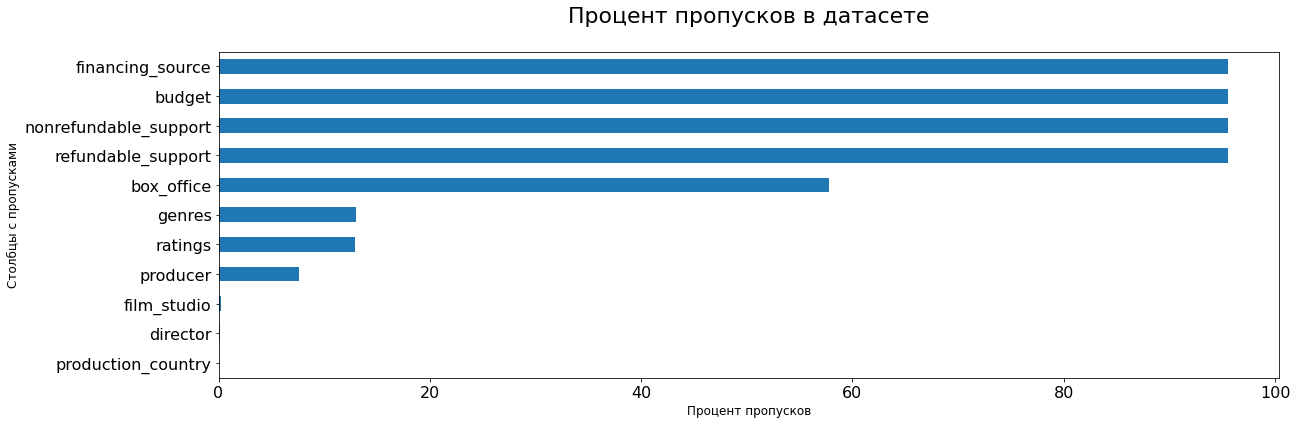

In [24]:
# представим количество пропусков в данных графически

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропусков в датасете' + "\n", fontsize = 22, color = 'black'),  
            plt.xlabel('Процент пропусков', fontsize= 12),
            plt.ylabel('Столбцы с пропусками', fontsize= 12)
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

pass_value_barh(df)

### Пропуски в refundable_support, nonrefundable_support, budget, financing_source
(возвратные инвестиции, невозвратные инвестиции, бюджет, источник финансирования)

**refundable_support**

In [25]:
df['refundable_support'].isna().sum()

7154

In [26]:
# проанализируем, какие значения принимают заполненные ячейки 
df[df['refundable_support'].notna()].sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3042,Крякнутые каникулы,114003615,2015-12-22 12:00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,40000000.00,0.00,399075326.00,Фонд кино,5.40,"мультфильм,комедия,приключения",69693747.93
6313,Крымский мост. Сделано с любовью,111020018,2018-10-29 12:00:00,Художественный,"ООО ""Студия ""8 рядов""",Россия,Т.Кеосаян,Д.Кеосаян,«12+» - для детей старше 12 лет,0.00,100000000.00,154245687.00,Фонд кино,2.50,"комедия,мелодрама",70798668.90
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00


- Заполнять пропуски в параметре 'возвратные инвестиции' синтетическими данными нецелесообразно, т.к. нет данных, какие фильмы с незаполненными значениями получили гос. поддержку и в каком размере.
- Вероятнее всего фильмы, для которых не заполнен парметр refundable_support не получили государственной поддержки.
- Так как заполнинить пропуски реальными  или качественными синтетическими данными в столбце refundable_support нет возможности, поставим "заглушки" на месте прропусков. При необходимости проанализируем эту категорию фильмов отдельно.

Аналогично обработаем пропуски в столбцах nonrefundable_support, budget, financing_source.d


In [27]:
# заполним пропущенные значения в refundable_support "заглушками"  - отрицательным числом
df['refundable_support'] = df['refundable_support'].fillna(-999)

In [28]:
# проверим корректность заполнения пропусков
df['refundable_support'].isna().sum()

0

**nonrefundable_support**

In [29]:
# заполним пропущенные значения в nonrefundable_support "заглушками"  - отрицательным числом
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(-999)

In [30]:
# проверим корректность заполнения пропусков
df['refundable_support'].isna().sum()

0

**budget**

In [31]:
# заполним пропущенные значения в nonrefundable_support "заглушками"  - отрицательным числом
df['budget'] = df['budget'].fillna(-999)

In [32]:
# проверим корректность заполнения пропусков
df['budget'].isna().sum()

0

**financing_source**

Пропуски в параметре источник финансирования заполним заглушкой, чтобы не искажать данные

In [33]:
# заполним пропуски в financing_source заглушкой "unknown"
df['financing_source'] = df['financing_source'].fillna('unknown')

In [34]:
# проверим корректность заполнения пропусков
df['financing_source'].isna().sum()

0

In [35]:
# проверим корректность заполнения пропусков в выбранных столбцах 
df[['refundable_support', 'nonrefundable_support', 'budget', 'financing_source']].sample(5)

,refundable_support,nonrefundable_support,budget,financing_source
6878,-999.00,-999.00,-999.00,unknown
2105,-999.00,-999.00,-999.00,unknown
1068,-999.00,-999.00,-999.00,unknown
5551,-999.00,-999.00,-999.00,unknown
3369,-999.00,-999.00,-999.00,unknown


In [36]:
# проверим корректность заполнения пропусков в выбранных столбцах 
df[['refundable_support', 'nonrefundable_support', 'budget', 'financing_source']].tail(10)

,refundable_support,nonrefundable_support,budget,financing_source
7476,0.00,30000000.00,46154000.00,Министерство культуры
7477,-999.00,-999.00,-999.00,unknown
7478,40000000.00,60000000.00,150147502.00,Фонд кино
7479,-999.00,-999.00,-999.00,unknown
7480,-999.00,-999.00,-999.00,unknown
7481,-999.00,-999.00,-999.00,unknown
7482,-999.00,-999.00,-999.00,unknown
7483,-999.00,-999.00,-999.00,unknown
7484,-999.00,-999.00,-999.00,unknown
7485,-999.00,-999.00,-999.00,unknown


Пропущенные значения корректно замененены заглушками. Ячейки с реальными данными остались без изменений.

### Пропуски в ratings, genres  (рейтинг, жанр)

Столбцы имеют практически одинаковое количество пропусков. Возможно данные были собраны из нескольких источников,  в части из которых эти данные не собирались.

Заполним пропуски  **genres** "заглушкой", т.к:
- мы не можем получить корректные данные и автоматически заполнить столбец актуальными значениями
- оъем данных большой, его удаление существенно отразится на результатах

В столбце ratings оставим пропущенные значения, т.к. при неаккуратной фильтрации данных отрицательные числа в качестве "заглушек" могут исказить результаты анализа

In [37]:
df['ratings'].isna().sum()

967

In [38]:
df['genres'].isna().sum()

976

**genres**

In [39]:
# заполним пропуски в financing_source заглушкой "unknown"
df['genres'] = df['genres'].fillna('unknown')

In [40]:
# проверим корректность заполнения пропусков
df['genres'].isna().sum()

0

### Пропуски в box_office (сборы в рублях)

In [41]:
df['box_office'].isna().sum()

4328

In [42]:
# заполним пропущенные значения в box_office "заглушками"  - отрицательным числом
df['box_office'] = df['box_office'].fillna(-999)

In [43]:
# проверим корректность заполнения пропусков
df[['box_office']].sample(5)

,box_office
1191,-999.00
188,-999.00
7125,-999.00
3575,331247719.00
806,-999.00


### Пропуски в film_studio, production_country, director, producer
 студия-производитель, страна-производитель, режиссёр, продюсер

**film_studio**

In [44]:
#количество пропусков в столбце в абсолютных цифрах
df['film_studio'].isna().sum()

18

In [45]:
# заполним пропущенные значения в film_studio "заглушками" 
df['film_studio'] = df['film_studio'].fillna('unknown')

In [46]:
df['film_studio'].isna().sum()

0

**production_country**

In [47]:
#количество пропусков в столбце в абсолютных цифрах
df['production_country'].isna().sum()

2

Количество строк с пропусками небольшое. Заполним их вручную. Согласно данным из сети мультики созданы в России

In [48]:
#### заполним пропуски
df['production_country'] = df['production_country'].fillna('Россия')

In [49]:
#### проверим успешность замены
df['production_country'].isna().sum()

0

**director**

In [50]:
#количество пропусков в столбце в абсолютных цифрах
df['director'].isna().sum()

9

In [51]:
# заполним пропущенные значения в production_country "заглушками" 
df['director'] = df['director'].fillna('unknown')

In [52]:
# проверим успешность замены
df['director'].isna().sum()

0

**producer**

In [53]:
#количество пропусков в столбце в абсолютных цифрах
df['producer'].isna().sum()

568

In [54]:
# заполним пропущенные значения в production_country "заглушками" 
df['producer'] = df['producer'].fillna('unknown')

In [55]:
df['producer'].isna().sum()

0

## Проверим датасет на наличие дубликатов

Для начала унифицируем форму записи данных в ячейках:
- приведем данные к нижнему регистру
- удалим лишние пробелы

In [56]:
# Преобразуем строковые значения к нижнему регистру и удаленим лишние пробелы
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# проверим успешность преобразования
df.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,-999.00,-999.00,-999.00,unknown,7.20,"боевик,драма,мелодрама",-999.00
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,«6+» - для детей старше 6 лет,-999.00,-999.00,-999.00,unknown,6.60,"драма,военный",-999.00
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ ка...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,-999.00,-999.00,-999.00,unknown,6.80,"фантастика,боевик,триллер",-999.00


In [57]:
df[df.duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Явных дубликатов в датасете не обнаружено. Проверим корректность выводов.

In [58]:
# сгруппируем фильмы по названию
df_grouped  = df.groupby('title')['genres'].count().to_frame().reset_index()
df_grouped = df_grouped.loc[df_grouped['genres']>1]
df_grouped.head(3)


,title,genres
35,100 миллионов евро,2
45,127 часов,2
49,13 часов: тайные солдаты бенгази,2


In [59]:
# рассмотрим подробнее строки с повторяющимся названием фильмов
df_duplicate = df.loc[df['title'].isin(df_grouped['title'])].sort_values('title')
df_duplicate.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25 12:00:00,художественный,"патэ, эсквуд, серенити фильм, тф1 фильм продюксьон, канал +, синесинема, галфин",франция,оливер барру,ричард грандпьерр,«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,6.10,комедия,-999.00
455,100 миллионов евро,121013712,2012-06-06 12:00:00,художественный,"патэ, эсквуд, серенити фильм, тф1 фильм продюксьон, канал +, синесинема, галфин",франция,оливер барру,ричард грандпьерр,«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,6.10,комедия,-999.00
5058,127 часов,221069011,2011-05-18 12:00:00,художественный,"фокс серчлайт пикчерз, клод эйт филмз, филм фо, эверест интертейнмент, дарлоу смитсон продакшнз, данэ интертейнмент, хайдмед ф...",сша - великобритания,дэнни бойл,"бернард беллью, тесса росс, гаррет смит",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,7.70,"триллер,биография,драма",-999.00
4852,127 часов,121000811,2011-01-27 12:00:00,художественный,"фокс серчлайт пикчерз, клод эйт филмз, филм фо, эверест интертейнмент, дарлоу смитсон продакшнз, данэ интертейнмент, хайдмед ф...",сша - великобритания,дэнни бойл,"бернард беллью, тесса росс, гаррет смит",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,7.70,"триллер,биография,драма",-999.00
3130,13 часов: тайные солдаты бенгази,121001016,2016-01-15 12:00:00,художественный,"парамаунт, дан филмз, латина пикчарз,3 арт интертейнмент",сша,майкл бэй,"майкл бэй, эрвин стофф",«18+» - запрещено для детей,-999.00,-999.00,-999.00,unknown,6.70,"боевик,триллер,драма",18439240.55
3129,13 часов: тайные солдаты бенгази,221019616,2016-04-19 12:00:00,художественный,"парамаунт, дан филмз, латина пикчарз,3 арт интертейнмент",сша,майкл бэй,"майкл бэй, эрвин стофф",«18+» - запрещено для детей,-999.00,-999.00,-999.00,unknown,6.70,"боевик,триллер,драма",-999.00
1493,13-й район: кирпичные особняки,221033314,2014-08-20 12:00:00,художественный,"брик мэншэнс продакшнз,синэ+ канал+, д8, европа корп.",франция-канада,камиль деламарр,"люк бессон, клод леже, джонатан вэнджер",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,5.50,"боевик,криминал",-999.00
1494,13-й район: кирпичные особняки,121008314,2014-04-25 12:00:00,художественный,"брик мэншэнс продакшнз,синэ+ канал+, д8, европа корп.",франция-канада,камиль деламарр,"люк бессон, клод леже, джонатан вэнджер",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,5.50,"боевик,криминал",750.00
4307,13.,121018110,2010-09-30 12:00:00,художественный,"барбариан филмз, магнет медиа групп, морабито пикчер компани, намбер 13, океана медиа файненс, овернайт филмз, ред драгон прод...",сша,гела баблуани,unknown,«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,6.80,"триллер,драма,криминал",-999.00
4107,13.,221123710,2010-10-25 12:00:00,художественный,"барбариан филмз, магнет медиа групп, морабито пикчер компани, намбер 13, океана медиа файненс, овернайт филмз, ред драгон прод...",сша,гела баблуани,unknown,«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,6.80,"триллер,драма,криминал",-999.00


In [60]:
print('Строк с дублирующимися названиями фильмов, включая дубли:', len(df_duplicate))

Строк с дублирующимися названиями фильмов, включая дубли: 1288


Фильмы с дубирующимися названиями - одни и теже фильмы, которые отличаются:
- номером прокатного удостоверения
- датой премьеры фильма
- сумма box_office -  в одной из дублирующихся строк имеется сумма кассовых сборов фильма.

Первые два пункта несущественны для целей исследования, т.к. прокатное удостоверение выдается на определенный срок и продлевается при необходимости - в результате фильм может иметь несколько прокатных удостоверений.
Так как в дублирующихся строках указан один и тот же фильм, нам нужно объединить строки и проставить в ячейку реальное значение кассовых сборов (box_office).

In [61]:
# сгруппируем данные в датафрейме по названию, чтобы объединить каждую группу дубликатов в одну строку
# при наличии отличий - после объединения по умолчанию будет отображаться значение первой строки
# в столбце рейтинг - будет проставлено среднее значение по дублирующимся строкам
# в столбце Сборы в рублях, бюджет, возраные/невозратные инвестиции - возьмем максимальное значение среди дублирующихся строк


df = df.groupby('title').agg({
    'pu_number': 'first',
    'show_start_date': 'first',
    'type': 'first',
    'film_studio': 'first',
    'production_country': 'first',
    'director': 'first',
    'producer': 'first',
    'age_restriction': 'first',
    'refundable_support': 'max',
    'nonrefundable_support': 'max',
    'budget': 'max',
    'financing_source': 'first',
    'ratings': 'mean',
    'genres': 'first',
    'box_office': 'max'
}).reset_index()

df.sample(10)


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5087,репортаж с линии огня,111008617,2017-11-22 12:00:00,художественный,"киностудия ""мосфильм""",ссср,л.сааков,unknown,«6+» - для детей старше 6 лет,-999.00,-999.00,-999.00,unknown,6.00,военный,-999.00
3177,матрица: революция,221137910,2010-12-01 12:00:00,художественный,"уорнер бразерс, эн пи ви интертейнмент, сильвер пикчерз, виллидж роудшоу пикчерз",сша-австралия,"ларри вачовски, энди вачовски","брюс берман, джоел сильвер, грант хилл",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,7.60,"фантастика,боевик",-999.00
6525,шальные деньги. стокгольмский нуар,121022013,2013-08-07 12:00:00,художественный,"тре веннер продюксьон, фильм и васт",швеция,бабак наджафи,"джессика аск, клаус бассинер, фредерик викстрем",«18+» - запрещено для детей,-999.00,-999.00,-999.00,unknown,6.60,"боевик,триллер,драма",-999.00
2278,импульс (2016),121024116,2016-08-29 12:00:00,художественный,"блэкмаркт инкорпорэйтед, европикчерз, гринлайт интернэшнл, скалптор медиа",сша,аарон кауфман,"йорам барзилай, эрик голд, аарон кауфман",«18+» - запрещено для детей,-999.00,-999.00,-999.00,unknown,4.30,триллер,1929078.80
5820,тайная жизнь насекомых,124004517,2018-01-07 12:00:00,анимационный,"бидибул продюксьон, оникс филмз",франция - люксембург,"арно бурон, антун крингс",эммануэль жакоме,«6+» - для детей старше 6 лет,-999.00,-999.00,-999.00,unknown,5.30,"мультфильм,комедия,приключения",6607377.87
4436,пина: танец страсти в 3d,126001911,2011-07-04 12:00:00,прочие,"арте, евроуайд филм продакшн, вендерс имеджес",германия-франция-великобритания,вим вендерс,вим вендерс,«0+» - для любой зрительской аудитории,-999.00,-999.00,-999.00,unknown,7.40,"документальный,мюзикл",-999.00
5563,солнечный удар .,111010214,2014-09-25 12:00:00,художественный,"ано ""золотой орёл"", ооо ""студия ""тритэ"" никиты михалкова""",россия,н.михалков,"н.михалков, л.верещагин",«12+» - для детей старше 12 лет,-999.00,-999.00,-999.00,unknown,5.80,драма,335041.00
455,аэросмит. рок для восходящего солнца,126004113,2013-11-11 12:00:00,прочие,"игл рок интертейнмент, спектикаст",сша,кейси патрик тебо,"майк гарден, джефф кемпин, терр шэнд",«0+» - для любой зрительской аудитории,-999.00,-999.00,-999.00,unknown,7.20,"музыка,концерт",-999.00
5511,"сначала любовь, потом свадьба",121000912,2012-01-18 12:00:00,художественный,фест вединг продакшн,сша,дермот малруни,"мишель чиджик, джефф абберли, натали марисано",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,5.40,"мелодрама,комедия",-999.00
2543,"книга крови /по мотивам рассказов клайва баркера ""книга крови"" и ""на улице иерусалима""/. фильм ужасов",121008710,2010-05-12 12:00:00,художественный,"матадор пикчерз, миднайт пикче шоу, плам филмз, интертейнмент моушн пикчерз, скотиш скрин, синема он, моушн инвестмен групп, р...",великобритания,джон харрисон,"лаури апелиан, клайв баркер, питер грэнджер-беван",«18+» - запрещено для детей,-999.00,-999.00,-999.00,unknown,5.30,"ужасы,триллер,детектив",930.00


In [62]:
len(df)

6762

## Проанализируем значения в столбцах 

**Столбцы с категориальными значениями:**
1. 'pu_number' - номер прокатного удостоверения
2. 'type'  — тип фильма
3. 'genres'	 - — жанр фильма
4. 'production_country'  — страна-производитель
5. 'age_restriction'   — возрастная категория
6. 'financing_source'  — источник государственного финансирования

Столбцы, с категориальными значениями имеют общую проблему - значения в столбцах не приведены к общему формату записи, что затрудняет фильтрацию и сортировку данных.Проанализируем значения в каждом столбце.

**pu_number** - номер прокатного удостоверения

In [64]:
# проверим столбец на наличие дубликатов
print()
print('Количество дубликатов в столбце pu_number:',
      df[df.duplicated(['pu_number'])]['pu_number'].count())
print()


Количество дубликатов в столбце pu_number: 0



**type** — тип фильма

In [65]:
df['type'].unique()

array(['художественный', 'анимационный', 'документальный',
       'научно-популярный', 'прочие', 'музыкально-развлекательный'],
      dtype=object)

**genres**	 - — жанр фильма

In [66]:
# преобразуем строковые значения в ячейках в списки
df['genres'] = df['genres'].str.split(',')

In [67]:
df.sample(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5041,расплата._,221044114,2014-10-01 12:00:00,художественный,"гомон, тф1, канал+, лджим продакшн",франция,фред кавайе,"сирил кольбо-жюстин, сидони дюма",«12+» - для детей старше 12 лет,-999.00,-999.00,-999.00,unknown,7.40,"[боевик, триллер, драма]",-999.00
4841,"программа короткометражного кино ""best sci-fi""",121023918,2018-10-25 12:00:00,художественный,"айсикл студиос, скайлэнд филмс, виртуала студиа, томас граскур, бэк ин таун, бамф продукционес, мордиско филмс",великобритания - испания - италия - латвия - франция - эстония,"томас граскур, адина истрате, пако каверо, александр ланка, норман тамкиви","алессандро вингфилд, томас граскур, ал диас, стефани дронне, айра коорт, алекс самаранч, изабель сеговия, вероника сильвестр",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,NaN,[unknown],387247.00


**production_country**  — страна-производитель

In [68]:
# преобразуем строковые значения в ячейках в списки
# df['production_country'] = df['production_country'].str.split(r'[,|-]')
df['production_country'] = df['production_country'].str.split(r'[,|-]').apply(lambda x: [item.strip() for item in x])

In [69]:
df.sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1728,дом для русалок,121020516,2016-06-30 12:00:00,художественный,"корела фильм, всемирные русские студии","[эстония, россия]",ёлкин туйчиев,"артур веэбер, наталья лазарева, лутфулла назиров",«16+» - для детей старше 16 лет,-999.00,-999.00,-999.00,unknown,5.10,[драма],58733.50
3812,необычайное лето с тесс,121010319,2019-04-26 12:00:00,художественный,"бэ и эн дэ, остлихт фильмпродукцион, вризинниг протестантсе радио омреп",[нидерланды],стивен вутерлуд,"йорам виллинг, марсель ленц, пит-харм стерк, гвидо шваб",«12+» - для детей старше 12 лет,-999.00,-999.00,-999.00,unknown,7.50,"[аниме, мультфильм, короткометражка]",-999.00
2756,крик тишины,111025918,2019-01-28 12:00:00,художественный,"ооо ""продюсерская компания александра литвинова""",[россия],"в.потапов, а.карелин",а.литвинов,«6+» - для детей старше 6 лет,0.00,40000000.00,60000000.00,министерство культуры,7.00,"[драма, история, военный]",1042023.00


**age_restriction**   — возрастная категория

In [70]:
df['age_restriction'].unique()

array(['«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«6+» - для детей старше 6 лет',
       '«0+» - для любой зрительской аудитории',
       '«18+» - запрещено для детей'], dtype=object)

In [72]:
# Упростим обозначение категорий, чтобы снизить вероятность ошибок
dic_replace = ({
       '«12+» - для детей старше 12 лет' : '12+',
       '«16+» - для детей старше 16 лет': '16+',
       '«6+» - для детей старше 6 лет': '6+',
       '«0+» - для любой зрительской аудитории': '0+',
       '«18+» - запрещено для детей': '18+'
             })

def replace_values(value):
    for key, val in dic_replace.items():
        if value == key:
            return val
    return value


df['age_restriction'] = df['age_restriction'].map(replace_values)

df.age_restriction.unique()

array(['12+', '16+', '6+', '0+', '18+'], dtype=object)

In [73]:
# Комментарий ревьюера
tmp_df = df.copy()
def replace_values(value):
    for key, val in dic_replace.items():
        if value == key:
            return val
    return value

display(tmp_df.age_restriction.unique())

tmp_df['age_restriction'] = tmp_df['age_restriction'].map(replace_values)

tmp_df.age_restriction.unique()

array(['12+', '16+', '6+', '0+', '18+'], dtype=object)

array(['12+', '16+', '6+', '0+', '18+'], dtype=object)

In [74]:
df.sample(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5135,родина трип,113000919,2019-06-14 12:00:00,научно-популярный,вологдин дмитрий николаевич,[россия],д.вологдин,"и.дружинин, д.вологдин",12+,-999.00,-999.00,-999.00,unknown,7.00,[документальный],-999.00
4673,последняя игра в куклы,111007910,2010-08-30 12:00:00,художественный,"зао ""кинокомпания ""снега""",[россия],г.негашев,"и.снежинская, г.негашев",12+,-999.00,-999.00,-999.00,unknown,5.90,"[драма, семейный]",3878.00


**financing_source**  — источник государственного финансирования

In [75]:
df['financing_source'].unique()

array(['unknown', 'фонд кино', 'министерство культуры, фонд кино',
       'министерство культуры'], dtype=object)

**Итог:**

В исходном датасете запись данных была не стандартизирована - в качестве разделителей использовались запятые, тире, имелись лишние пробелы.
Кроме того, использовались символы верхнего и нижнего регистра, кавычки.
Все это может привести к некорректной фильтрации данных и искажениям в результатах анализа.


В результате проведенной предобработки данных в столбцах с категориальными значениями все записи стандартизированы:
- значения приведены к нижнему регистру
- удалены лишние пробелы, кавычки, тире

**Проанализируем столбцы, с количественными значениями**

1. 'refundable_support' — объём возвратных средств государственной поддержки;
2. 'nonrefundable_support' -— объём невозвратных средств государственной поддержки;
3. 'ratings' — рейтинг фильма на КиноПоиске;
4. 'box_office' — сборы в рублях
5. 'budget' общий бюджет фильма. 

**refundable_support** — объём возвратных средств государственной поддержки

In [76]:
#проанализируем количество заполненных значений в столбце
rs_fill = df[(df['refundable_support'] != -999) & (df['refundable_support'] > 0)]
rs_fill['refundable_support'].describe()

count         111.00
mean     35486486.49
std      31972875.36
min       3500000.00
25%      15000000.00
50%      25000000.00
75%      50000000.00
max     180000000.00
Name: refundable_support, dtype: float64

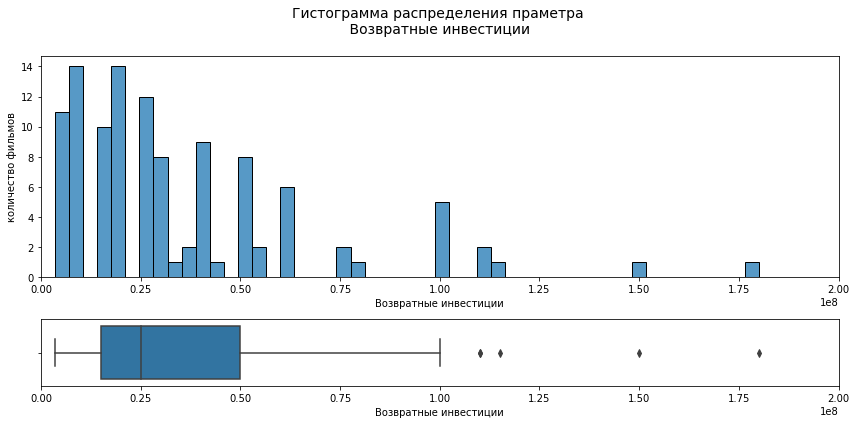

In [77]:
# построим диаграмму распределения rs_fill['refundable_support'] в данных

# Создание сетки для подграфиков
# Общий размер фигуры
fig = plt.figure(figsize=(12, 6))

# Задаем пропорции высоты для подграфиков
gs = GridSpec(2, 1, height_ratios=[10, 3]) 

# Гистограмма для rs_fill
ax1 = fig.add_subplot(gs[0])
sns.histplot(rs_fill['refundable_support'], bins=50, ax=ax1)
ax1.set_title('Гистограмма распределения праметра \n Возвратные инвестиции \n', fontsize=14)
ax1.set_ylabel('количество фильмов') 
ax1.set_xlabel('возвратные инвестиции')

ax1.set_xlim(0,2e8)
ax1.set_xlabel('Возвратные инвестиции')

# Ящичная диаграмма для rs_fill
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x=rs_fill['refundable_support'], ax=ax2)
ax2.set_xlabel('Возвратные инвестиции')
ax2.set_xlim(0,2e8)

# Отображение графика
plt.tight_layout()
plt.show()

- Государственную поддержку в форме возвратных инвестиций получили 109 фильмов.
- Большинство проектов получили сумму от 1,5 до 5 млн.руб
- Также мы видим единичные случаи выделения крупных сумм: 150 -175 млн. руб.. Скорее всего это связано с масштабностью проектов и инвестиционной привлекательностью фильмов.
Исключать такие нетипичные данные из выборки нецелесообразно. Т.к. одной из целей иссследования является анализ востребованности проектов с гос.участием. Проекты с большими бюджетами могут оказаться наиболее успешными - их исключение из выборки исказит результаты исследования.

**nonrefundable_support** -— объём невозвратных средств государственной поддержки

In [78]:
#проанализируем количество заполненных значений в столбце
nrs_fill = df[(df['nonrefundable_support'] != -999) & (df['nonrefundable_support'] > 0)]
nrs_fill['nonrefundable_support'].describe()

count         323.00
mean     50345784.25
std      60243206.31
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      45000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

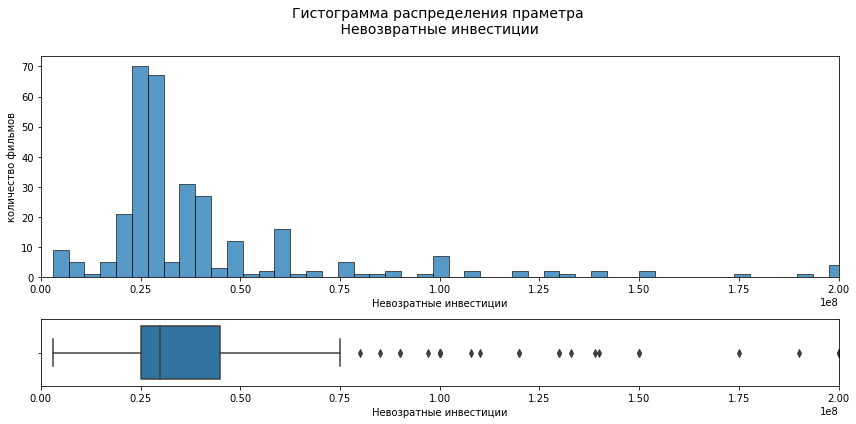

In [79]:
# построим диаграмму распределения nrs_fill['refundable_support'] в данных

# Создание сетки для подграфиков
# Общий размер фигуры
fig = plt.figure(figsize=(12, 6))

# Задаем пропорции высоты для подграфиков
gs = GridSpec(2, 1, height_ratios=[10, 3]) 

# Гистограмма для nrs_fill
ax1 = fig.add_subplot(gs[0])
sns.histplot(nrs_fill['nonrefundable_support'], bins=100, ax=ax1)
ax1.set_title('Гистограмма распределения праметра \n Невозвратные инвестиции \n', fontsize=14)
ax1.set_ylabel('количество фильмов') 
ax1.set_xlabel('невозратные инвестиции')

ax1.set_xlabel('Невозратные инвестиции')
ax1.set_xlim(0,2e8)

# Ящичная диаграмма для rs_fill
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x=nrs_fill['nonrefundable_support'], ax=ax2)
ax2.set_xlabel('Невозратные инвестиции')
ax2.set_xlim(0,2e8)

# Отображение графика
plt.tight_layout()
plt.show()

- Государственную поддержку в форме невозвратных инвестиций получили 320 фильмов.
- Большинство проектов получили сумму от 25 до 30 млн.руб
- Максимальный объем невозвратных инвестиций достигает 400 млн руб. Оставим нетипичные данные в датасете для анализа успешности проектов с гос.поддержкой

Поддержку в форме невозвратныx инвестиций получает болшее количество фильмов чем проекты, которые должны будут вернуть вложенные деньги. Также объем невозратный инвестиций в среднем выше, чем объем возвратных инвестиций.

**budget** общий бюджет фильма

Указанный бджет включает полную сумму господдержки. Проверим датасет на наличие аномалий, где общая сумма гос. поддержки больше бюджета фильма.

In [80]:
# выведем количество строк, где общая сумма гос. поддержки больше бюджета фильма
len(df.query('budget < (refundable_support + nonrefundable_support)'))

17

Количество строк с аномальными данными пренебрежимо мало. Удалим их из выборки

In [81]:
print('Количество строк до удаления:',len(df))

Количество строк до удаления: 6762


In [82]:
df = df.query('~(budget < (refundable_support + nonrefundable_support))')

In [83]:
print('Количество строк после удаления:',len(df))

Количество строк после удаления: 6745


In [84]:
#проанализируем количество заполненных значений в столбце
b_fill = df[(df['budget'] != -999) & (df['budget'] > 0)]
b_fill['budget'].describe()

count          315.00
mean     134096082.35
std      191226039.63
min       14462464.00
25%       46153866.50
50%       73379554.00
75%      150004286.50
max     2305074303.00
Name: budget, dtype: float64

In [85]:
#Выведем верхние значения выборки
b_fill.sort_values('budget').tail(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1363,грех,111014419,2019-08-31 12:00:00,художественный,"но фонд андрея кончаловского по поддержке кино и сценических искусств, ооо ""жан виго италия"" (jean vigo italia s.r.l.)","[россия, италия]",а.михалков (псевдоним а.кончаловский),но фонд андрея кончаловского по поддержке кино и сценических искусств,16+,0.00,60000000.00,779941965.00,министерство культуры,6.90,"[драма, биография, история]",54243202.71
1132,вторжение,124002417,2017-08-01 12:00:00,анимационный,баобаб студиос,[сша],эрик дарнелл,unknown,6+,100000000.00,400000000.00,944000000.00,unknown,5.70,"[фантастика, боевик]",-999.00
5591,союз спасения,111022019,2019-12-26 12:00:00,художественный,"зао ""дирекция кино""",[россия],а.кравчук,"а.максимов, к.эрнст",12+,100000000.00,400000000.00,980000000.00,фонд кино,6.00,"[история, биография, драма]",717703185.53
3173,матильда,111005717,2017-08-17 12:00:00,художественный,"ооо ""тпо ""рок"", ооо ""матильда""",[россия],а.учитель,"а.учитель, а.достман, в.винокур",16+,110000000.00,190000000.00,1032905957.00,фонд кино,7.70,"[фэнтези, комедия, семейный]",511775548.00
5809,тайна печати дракона,111012819,2019-09-12 12:00:00,художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""рфг""; ао ""маринс групп интертеймент""; ооо ""фетисов иллюзион""; ип петрухин; чайна...","[россия, китай]",о.степченко,"с.сельянов, а.петрухин",6+,180000000.00,90000000.00,2305074303.00,фонд кино,5.80,"[приключения, фэнтези]",333597059.59


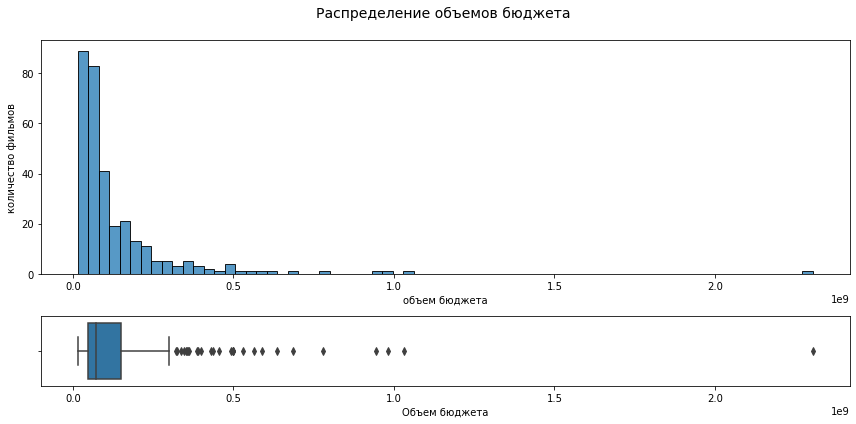

In [86]:
# построим диаграмму распределения nrs_fill['refundable_support'] в данных

# Создание сетки для подграфиков
# Общий размер фигуры
fig = plt.figure(figsize=(12, 6))

# Задаем пропорции высоты для подграфиков
gs = GridSpec(2, 1, height_ratios=[10, 3]) 

# Гистограмма для nrs_fill
ax1 = fig.add_subplot(gs[0])
sns.histplot(b_fill['budget'], bins=70, ax=ax1)
ax1.set_title('Распределение объемов бюджета \n', fontsize=14)
ax1.set_ylabel('количество фильмов') 
ax1.set_xlabel('объем бюджета')
#ax1.set_xlim(0,2e8)

# Ящичная диаграмма для rs_fill
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x = b_fill['budget'], ax=ax2)
ax2.set_xlabel('Объем бюджета')
#ax2.set_xlim(0,2e8)

# Отображение графика
plt.tight_layout()
plt.show()

- Основная часть фильмов имеет бюджет  от 46 до 73  млн руб.
- Максимальный объем бюджета  в выборке составляет 2 млрд 305  млн.руб., что подтверждается данными из открытых источников. 

**box_office** — сборы в рублях

Значения в столбце box_offiece имеют разный формат записи:
- часть ячеек содержит сумму кассовых сборов в рублях
- другая - в тысячах рублей

In [87]:
# сделаем срез по данным с заполненными значениями  box_offiece
df_box_offiece = df.loc[df['box_office'] != -999]
print('Общее количество строк:', len(df))
print('Количество пропусков в кассовых сборах:', len(df) - len(df_box_offiece))

Общее количество строк: 6745
Количество пропусков в кассовых сборах: 3636


In [88]:
df_box_offiece['box_office'].describe()

count         3109.00
mean      76791431.80
std      241359630.04
min              0.00
25%          98083.00
50%        2390372.00
75%       23969331.00
max     3073568690.79
Name: box_office, dtype: float64

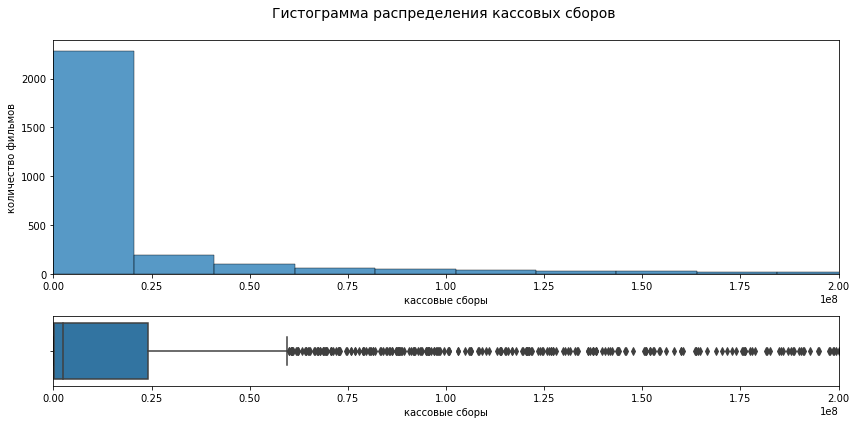

In [89]:
# построим диаграмму распределения df_box_offiece['box_office'] в данных
# Заменяем inf на NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Создание сетки для подграфиков
# Общий размер фигуры
fig = plt.figure(figsize=(12, 6))

# Задаем пропорции высоты для подграфиков
gs = GridSpec(2, 1, height_ratios=[10, 3]) 

# Гистограмма для df_box_offiece
ax1 = fig.add_subplot(gs[0])
sns.histplot(df_box_offiece['box_office'], bins=150, ax=ax1)
ax1.set_title('Гистограмма распределения кассовых сборов \n', fontsize=14)
ax1.set_ylabel('количество фильмов') 
ax1.set_xlabel('кассовые сборы')
ax1.set_xlim(0,2e8)

# Ящичная диаграмма для df_box_offiece
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x=df_box_offiece['box_office'], ax=ax2)
ax2.set_xlabel('кассовые сборы')
ax2.set_xlim(0,2e8)

# Отображение графика
plt.tight_layout()
plt.show()

Мы видим, что часть значений в столбце имеет ошибку ввода:
- вместо суммы в рублях, указана сумма в тысячах рублей.

Проанализируем, какие значения принимает большая часть выборки

In [90]:
# Проанализируем значения межквартильного размаха
# Вычислим Q1 и Q3
Q1 = df_box_offiece['box_office'].quantile(0.25)
Q3 = df_box_offiece['box_office'].quantile(0.75)

# Найдем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определим нижнюю и верхнюю границы межквартильного размаха
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Отфильтруем значения внутри межквартильного интервала
# Сохраним значения межквартильного интервала в переменной t
t = df_box_offiece[(df_box_offiece['box_office'] >= lower_bound) & (df_box_offiece['box_office'] <= upper_bound)]
t.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,2571.00,2571.00,2571.00,2345.00,2571.00
mean,355360.70,2588552.61,6212998.62,6.71,6589594.11
std,3191838.27,11519730.68,30261547.75,6.10,11894865.39
min,-999.00,-999.00,-999.00,1.00,0.00
25%,-999.00,-999.00,-999.00,5.60,31990.00
50%,-999.00,-999.00,-999.00,6.40,1191851.00
75%,-999.00,-999.00,-999.00,7.10,6148450.50
max,60000000.00,300000000.00,779941965.00,99.00,59524891.30


- Основная часть заполненных значений по кассовым сборам распределена от 0 руб до 25 млн. 
- Нулевые значения могутговорить о том, что фильмы не транслировались в кинотетрах, и были доступны зрителям по подписке в онлайн кинотеатрах.

Выведем фильмы с ненулевыми кассовыми сборами. 

In [91]:
# Отберем фильмы с ненулевыми кассовыми сборами, проанализируем значения в столбце 'box_office'
# Сохраним ненулевые значения в переменную tt  
tt = t[t['box_office']> 0].sort_values('box_office')

#посмотрим сэмпл данных по фильмам с ненулевыми кассовыми сборами
# проанализируем значения в столбце 'box_office'
tt[['title', 'box_office']].sample(3)

,title,box_office
6194,феи: легенда о чудовище,16429913.00
441,атлантика,874498.00
6057,тэд-путешественник и тайна царя мидаса,43823795.00


In [92]:
# Выведем наибольшие значения 'box_office'
tt[['title', 'box_office']].tail(3)

,title,box_office
848,вдовы,59242029.38
392,апгрейд,59431246.03
5734,суперкоманда,59524891.30


In [93]:
# Выведем наименьшие значения 'box_office'
tt[['title', 'box_office']].head(3)

,title,box_office
1910,жестокий романс,40.00
2424,каменный цветок.,50.00
70,22 пули: бессмертный,75.00


Мы видим, что столбец box_office содержит явные ошибки ввода:
- часть значений указана в рублях
- часть  - в тысячах
- часть - миллионах рублей

Обработать данные, так чтобы отразить корректные суммы кассовых сборов невозможно.
О проблеме со сбором данных необходимо сообщить заказчику, чтобы была возможность корректные данные для последующего анализа.

**Подведем итог**

In [94]:
print()
print('Кассовые сборы:')
print('Всего строк в датасете:', len(df))
print('Пропущенные значения в box_office:', len(df) - len(df_box_offiece))
print('Нулевые значения в box_office:', len(t) - len(tt))
print()


Кассовые сборы:
Всего строк в датасете: 6745
Пропущенные значения в box_office: 3636
Нулевые значения в box_office: 24



Таким образом, количество строк с заполненными ненулевыми кассовыми сборами - 3102, что составляет менее половины от всей выборки. Значения в ячейках записаны в разных форматах. Обработать данные, так чтобы отразить корректные суммы кассовых сборов невозможно.

Таким образом данные о кассовых сборах малоинформативны. При интерпритации результатов исследования необходимо учитывать, что анализ проводился на данных, имеющих некорректные значения. Такое качество данных не позволяет сделать однозначных выводов, которые можно экстраполировать на всю выборку.

**ratings** — рейтинг фильма на КиноПоиске;

Максимальная оценка на кинопоиске 10 Посмотрим, все ли значения в столбце соответствуют допустимому интервалу

In [95]:
# выведем фильмы с оценкой выше 10
df[df['ratings'] > 10].sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3718,наурыз,131000217,2017-03-09 12:00:00,художественный,эс джи,[республика казахстан],аскар бисембин,"олег головашкин, алмас султангазин",12+,-999.00,-999.00,-999.00,unknown,19.00,[комедия],37960.00
375,анна каренина. интимный дневник,111013919,2019-10-23 12:00:00,художественный,"ооо ""ртв""",[россия],ю.грымов,ю.грымов,16+,-999.00,-999.00,-999.00,unknown,79.00,[драма],182882.50
917,вечный холод,111006417,2017-08-28 12:00:00,художественный,"зао ""производственный комплекс ""главкино"", ооо ""лунапарк продакшн""",[россия],а.мигачев,и.бачурин,18+,-999.00,-999.00,-999.00,unknown,83.00,"[фэнтези, боевик, триллер]",-999.00
2576,колесо времени,111003219,2019-03-01 12:00:00,художественный,"ооо ""бестмедиа""",[россия],б.куломзин,б.куломзин,6+,-999.00,-999.00,-999.00,unknown,98.00,"[фэнтези, приключения]",34992.00
1921,животные рядом со святыми,112003719,2019-05-03 12:00:00,документальный,"ооо ""кинопрограмма ""xxi век""",[россия],т.мирошник,"в.есинов, е.калинина",0+,-999.00,-999.00,-999.00,unknown,99.00,"[криминал, драма]",-999.00


Мы видим, что присутствуют очевидные ошибки ввода. Например, вместо оценки 8.3 введено значение 83.00.
Преобразуем неккорректные значения

In [96]:
# приведем неккоректные значения рейтинга к корректному виду
df.loc[df['ratings'] > 10.00, 'ratings'] = df['ratings'] / 10

#проверим успешность преобразования
df[df['ratings'] > 10]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Потенциальной ошибкой ввода могут быть данные о рейтинге фильмов  0 < raiting < 1 - в реальности такие оценки крайне редки. 

Проверим присутствуют ли такие значения в датасете.

In [97]:
# выведем фильмы с оценкой выше 10
df[(df['ratings'] < 1) & (df['ratings'] != -999)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Потенциально ошибочных значений в диапазоне 0 < raiting < 1 не найдено.
Построим гистограмму распределения значений по параметру 'ratings'

In [98]:
#Создадаим переменную с ненулевыми значениями параметра
r_fill = df[df['ratings'] != -999]
r_fill['ratings'].describe()

count   5788.00
mean       6.46
std        1.13
min        1.00
25%        5.80
50%        6.60
75%        7.20
max        9.90
Name: ratings, dtype: float64

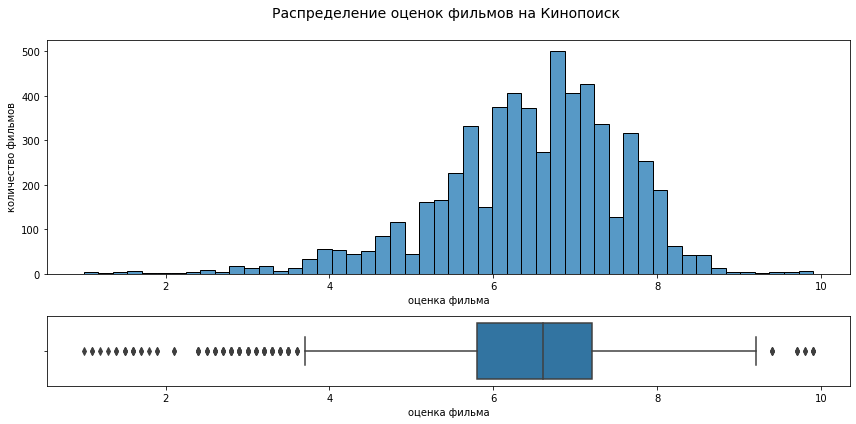

In [99]:
# построим диаграмму распределения ненулевых значений рейтинга - r_fill['ratings']

# Создание сетки для подграфиков
# Общий размер фигуры
fig = plt.figure(figsize=(12, 6))

# Задаем пропорции высоты для подграфиков
gs = GridSpec(2, 1, height_ratios=[10, 3]) 

# Гистограмма для r_fill
ax1 = fig.add_subplot(gs[0])
sns.histplot(r_fill['ratings'], bins=50, ax=ax1)
ax1.set_title('Распределение оценок фильмов на Кинопоиск \n ', fontsize = 14)
ax1.set_xlabel('оценка фильма')
ax1.set_ylabel('количество фильмов')
#ax1.set_xlim(0,2e8)

# Ящичная диаграмма для r_fill
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x = r_fill['ratings'], ax=ax2)
ax2.set_xlabel('оценка фильма')
#ax2.set_xlim(0,2e8)

# Отображение графика
plt.tight_layout()
plt.show()

- Устранены ошибки вводы, данные об оценке фильмов приведены к стандартному виду
- Распределение параметра 'raiting' близко к нормальному
- Средняя оценка по выборке - 6.43  балла на кинопоиске

## Добавим в датасет новые столбцы
- **release_year** - год выхода фильма
- **main director** - главный режисёр
- **main genre** - основной жанр
- **state_invest** - доля гос.поддержки в общем бюджете

**release_year** - год выхода фильма

In [100]:
#Создадим колонку с годом выхода фильма
df['release_year'] = df['show_start_date'].dt.year
df.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year
0,"""sos"" над тайгой",111021114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм""",[ссср],"в.перов, а.кольцатый",unknown,12+,-999.00,-999.00,-999.00,unknown,6.70,"[драма, криминал, приключения]",-999.00,2014
1,"""v"" значит вендетта",221167310,2010-12-25 12:00:00,художественный,"уорнер бразерс, сильвер пикчерз, анархоз продакшнз, ди си комикс, фюнфте бабелсберг филм, медиенбоард берлин-бранденбург, вирт...","[сша, германия, великобритания]",джеймс мактэйг,"ларри вачовски, энди вачовски, джоэл сильвер, грант хилл",16+,-999.00,-999.00,-999.00,unknown,7.80,"[фантастика, боевик, триллер]",-999.00,2010
2,"""артишок"" анимационный альманах авторских фильмов",114001719,2019-03-07 12:00:00,анимационный,"ооо ""студия ""пчела""",[россия],"д.великовская, н.лопато (псевдоним нилова)","в.гассиев, ф.пролиг",12+,-999.00,-999.00,-999.00,unknown,NaN,[unknown],-999.00,2019


**main director** - главный режисёр

In [101]:
# Преобразуем строковые значение в списки
df['director'] = df['director'].str.split(',')

In [102]:
df.head(1)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year
0,"""sos"" над тайгой",111021114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм""",[ссср],"[в.перов, а.кольцатый]",unknown,12+,-999.00,-999.00,-999.00,unknown,6.70,"[драма, криминал, приключения]",-999.00,2014


In [103]:
# Создаем новый столбец 'main_director', используя первый элемент списка в 'director'
df['main_director'] = df['director'].apply(lambda x: x[0])

In [104]:
# проверим, добавился ли новый столбец
df.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director
0,"""sos"" над тайгой",111021114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм""",[ссср],"[в.перов, а.кольцатый]",unknown,12+,-999.00,-999.00,-999.00,unknown,6.70,"[драма, криминал, приключения]",-999.00,2014,в.перов
1,"""v"" значит вендетта",221167310,2010-12-25 12:00:00,художественный,"уорнер бразерс, сильвер пикчерз, анархоз продакшнз, ди си комикс, фюнфте бабелсберг филм, медиенбоард берлин-бранденбург, вирт...","[сша, германия, великобритания]",[джеймс мактэйг],"ларри вачовски, энди вачовски, джоэл сильвер, грант хилл",16+,-999.00,-999.00,-999.00,unknown,7.80,"[фантастика, боевик, триллер]",-999.00,2010,джеймс мактэйг


**main genre** - основной жанр

In [105]:
# Создаем новый столбец 'main_genre', используя первый элемент списка в 'genres'
df['main_genre'] = df['genres'].apply(lambda x: x[0])

In [106]:
#проверим успешность создания столбца
df.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre
0,"""sos"" над тайгой",111021114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм""",[ссср],"[в.перов, а.кольцатый]",unknown,12+,-999.00,-999.00,-999.00,unknown,6.70,"[драма, криминал, приключения]",-999.00,2014,в.перов,драма
1,"""v"" значит вендетта",221167310,2010-12-25 12:00:00,художественный,"уорнер бразерс, сильвер пикчерз, анархоз продакшнз, ди си комикс, фюнфте бабелсберг филм, медиенбоард берлин-бранденбург, вирт...","[сша, германия, великобритания]",[джеймс мактэйг],"ларри вачовски, энди вачовски, джоэл сильвер, грант хилл",16+,-999.00,-999.00,-999.00,unknown,7.80,"[фантастика, боевик, триллер]",-999.00,2010,джеймс мактэйг,фантастика


**gov_part** - доля гос.поддержки в общем бюджете

Проверим есть ли в датасете проекты получившие финасировие в формате возратных и невозратных инвестиций

In [107]:
# проверим есть строки с пропущенными значениями в одном столбце с гос.инвестициями и заполнеными в другом
df.loc[((df['refundable_support'] == -999) & (df['nonrefundable_support'] != -999)) |
       ((df['refundable_support']!= -999) & (df['nonrefundable_support'] == -999))
      ]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre


In [108]:
# создадим переменную с заполненными значениями в столбце бюджет
temp_df_valid = df.loc[df['budget']>0]

# посчитаем долю гос.поддержки в бюджете проектов 
temp_df_valid['gov_part'] = (temp_df_valid['refundable_support'] + df['nonrefundable_support'])/temp_df_valid['budget']
temp_df_valid.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part
18,(не)идеальный мужчина,111023119,2019-12-24 12:00:00,художественный,"ооо ""нон-стоп продакшн""",[россия],[м.бальчюнас (псевдоним м.вайсберг)],"с.мелькумов, а.роднянский, м.вайсберг, р.минасбекян",12+,40000000.00,60000000.00,150147502.00,фонд кино,4.50,"[комедия, фантастика, мелодрама]",-999.00,2019,м.бальчюнас (псевдоним м.вайсберг),комедия,0.67
43,12 месяцев. новая сказка,111014414,2014-10-16 12:00:00,художественный,"ооо ""киностудия ""никола-фильм"", ооо ""инвестмент бизнес консалтинг"", ооо ""пролайн-медиа""",[россия],[д.елеонский],и.каленов,0+,15000000.00,5000000.00,90120000.00,фонд кино,3.80,"[семейный, фэнтези]",32244810.00,2014,д.елеонский,семейный,0.22
74,28 панфиловцев,111000916,2016-01-27 12:00:00,художественный,индивидуальный предприниматель шальопа а.г.,[россия],"[к.дружинин, а.шальопа]",а.шальопа,12+,0.00,30000000.00,85384000.00,министерство культуры,7.50,"[военный, драма, история]",363622804.90,2016,к.дружинин,военный,0.35


In [109]:
# опредлим строки с незаполненными значениями в столбце 'budget', сохраним их в отдельную переменную
temp_df_invalid = df.loc[~(df['budget']>0)]

# определим значение столбца 'gov_part' для выбранных строк
temp_df_invalid['gov_part'] = -999
temp_df_invalid.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part
0,"""sos"" над тайгой",111021114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм""",[ссср],"[в.перов, а.кольцатый]",unknown,12+,-999.00,-999.00,-999.00,unknown,6.70,"[драма, криминал, приключения]",-999.00,2014,в.перов,драма,-999
1,"""v"" значит вендетта",221167310,2010-12-25 12:00:00,художественный,"уорнер бразерс, сильвер пикчерз, анархоз продакшнз, ди си комикс, фюнфте бабелсберг филм, медиенбоард берлин-бранденбург, вирт...","[сша, германия, великобритания]",[джеймс мактэйг],"ларри вачовски, энди вачовски, джоэл сильвер, грант хилл",16+,-999.00,-999.00,-999.00,unknown,7.80,"[фантастика, боевик, триллер]",-999.00,2010,джеймс мактэйг,фантастика,-999
2,"""артишок"" анимационный альманах авторских фильмов",114001719,2019-03-07 12:00:00,анимационный,"ооо ""студия ""пчела""",[россия],"[д.великовская, н.лопато (псевдоним нилова)]","в.гассиев, ф.пролиг",12+,-999.00,-999.00,-999.00,unknown,NaN,[unknown],-999.00,2019,д.великовская,unknown,-999
3,"""бежин луг"" сергея эйзенштейна",112000115,2015-04-23 12:00:00,документальный,"киностудия ""мосфильм""",[ссср],[с.эйзенштейна],unknown,12+,-999.00,-999.00,-999.00,unknown,NaN,[unknown],-999.00,2015,с.эйзенштейна,unknown,-999
4,"""державная"" размышления 100 лет спустя",112000518,2018-06-07 12:00:00,документальный,"ао ""амальгама студия""",[россия],[д.алейников],"с.новиков, а.феофанов",12+,-999.00,-999.00,-999.00,unknown,NaN,[unknown],-999.00,2018,д.алейников,unknown,-999


In [110]:
# Объединим таблицы и сохраним их в исходный датафрейм
df = pd.concat([temp_df_valid, temp_df_invalid]).reset_index(drop=True)
df.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part
0,(не)идеальный мужчина,111023119,2019-12-24 12:00:00,художественный,"ооо ""нон-стоп продакшн""",[россия],[м.бальчюнас (псевдоним м.вайсберг)],"с.мелькумов, а.роднянский, м.вайсберг, р.минасбекян",12+,40000000.00,60000000.00,150147502.00,фонд кино,4.50,"[комедия, фантастика, мелодрама]",-999.00,2019,м.бальчюнас (псевдоним м.вайсберг),комедия,0.67
1,12 месяцев. новая сказка,111014414,2014-10-16 12:00:00,художественный,"ооо ""киностудия ""никола-фильм"", ооо ""инвестмент бизнес консалтинг"", ооо ""пролайн-медиа""",[россия],[д.елеонский],и.каленов,0+,15000000.00,5000000.00,90120000.00,фонд кино,3.80,"[семейный, фэнтези]",32244810.00,2014,д.елеонский,семейный,0.22


**gov_invest** - наличие/отсутствие средств гос.поддержки в бюджете фильма

In [111]:
#добавим столбец, показывающий наличие/отсутствие гос.поддержки в общем бюджете фильма
# 0 -гос.поддержки нет
# 1 - в бюджете есть гос. средства

# Функция для определения значений столбца gov_invest
def calculate_gov_invest(gov_part):
    if gov_part == -999 or gov_part == 0:
        return 0
    elif gov_part > 0:
        return 1

# Применение функции к столбцу gov_part
df['gov_invest'] = df['gov_part'].apply(calculate_gov_invest)

In [112]:
df.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest
0,(не)идеальный мужчина,111023119,2019-12-24 12:00:00,художественный,"ооо ""нон-стоп продакшн""",[россия],[м.бальчюнас (псевдоним м.вайсберг)],"с.мелькумов, а.роднянский, м.вайсберг, р.минасбекян",12+,40000000.00,60000000.00,150147502.00,фонд кино,4.50,"[комедия, фантастика, мелодрама]",-999.00,2019,м.бальчюнас (псевдоним м.вайсберг),комедия,0.67,1
1,12 месяцев. новая сказка,111014414,2014-10-16 12:00:00,художественный,"ооо ""киностудия ""никола-фильм"", ооо ""инвестмент бизнес консалтинг"", ооо ""пролайн-медиа""",[россия],[д.елеонский],и.каленов,0+,15000000.00,5000000.00,90120000.00,фонд кино,3.80,"[семейный, фэнтези]",32244810.00,2014,д.елеонский,семейный,0.22,1


**Итоги:**

**На этапе предобработки данных:**
- Данные были получены из двух датасетов: mkrf_movies и mkrf_shows, которые были объединены в 1 по номеру прокатного удостовения.
- Обработаны пропуски в данных.
- Количественные параметры оставлены с пропусками или заполнены заглушками. Заполнение пропусков синтетическими данными не применялось, т.к. это привело бы к существенному искажению результатов исследования.
- Стандартизированы значения в категориальных ячейках (записи приведены к нижнему регистру, удалены лишние пробелы и запятые)
- Одним из наиболее важных параметров в разрезе цели осследования является парметр кассовых сборов (box_office). При этом, данные имеются только для половины датасета. В части строк, где данные заполнены наблюдаются некооректные значения, связанные с ошибками ввода.
Таким образом, все выводы, касающиеся кассовых сборов фильмов нельзя считать абсолютно достоверными и экстраполировать их на весь кинорынок.

# Исследовательский анализ данных

**Проанализируем сколько фильмов выходит в прокат в кинотеатрах каждый год**

In [113]:
df_copy2 = df.copy()

**Доля фильмов в выборке с указаной информацией о прокате**

In [114]:
# проанализируем для какой части датасета имеются ненулевые данные о сумме кассовых сборов.
a = df.loc[df['box_office']>0].count() / df['box_office'].count()*100
print()
print('Данные о сумме кассовых сборов заполнены для', round(a['title']), '% данных')
print()


Данные о сумме кассовых сборов заполнены для 46 % данных



Добавим столбец  **film_rent** - был/не был фильм в прокате

In [115]:
# примем, что проекты, по которым нет данных о кассовых сборах не прокатывались в кинотеатрах
df.loc[df['box_office'] <= 0, 'box_office'] = 0

In [116]:
#сохраним все строки с ненулевыми кассовыми сборами в отдельную переменную
fl_rent = df.loc[df['box_office'] > 0]
fl_rent['film_rent'] = 1
fl_rent.sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
5886,танцуй отсюда!,121005814,2014-03-28 12:00:00,художественный,биг талк продакшнз,[великобритания],[джеймс гриффитс],"джеймс биддл, дженни боргарс, найра парк",16+,-999.00,-999.00,-999.00,unknown,6.60,"[мелодрама, комедия, спорт]",400.00,2014,джеймс гриффитс,мелодрама,-999.00,0,1
5885,танцовщица (2016),121028616,2016-10-21 12:00:00,художественный,"ле продюксьон дю трезор, уалд банч, оранж студио, ле фильм дю флев, радио телевизион бельж франкофон, сирена филм, канал +, си...","[франция, бельгия, чехия]",[стефани ди джусто],аллен атталь,18+,-999.00,-999.00,-999.00,unknown,6.70,"[драма, биография, история]",6003344.53,2016,стефани ди джусто,драма,-999.00,0,1
5375,светская жизнь,121020416,2016-07-11 12:00:00,художественный,"блэкберд, колд айрон пикчерз, тадмор, гравьер продакшнз, пердидо продакшнз",[сша],[вуди аллен],"летти аронсон, стивен тененбаум, эдвард уолсон",18+,-999.00,-999.00,-999.00,unknown,6.90,"[драма, мелодрама, комедия]",113009869.40,2016,вуди аллен,драма,-999.00,0,1


In [117]:
#сохраним все строки с ненулевыми кассовыми сборами в отдельную переменную
fl_nonrent = df.loc[df['box_office'] == 0]
fl_nonrent['film_rent'] = 0
fl_nonrent.sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
818,без истерики!,121021011,2011-11-07 12:00:00,художественный,"информант медиа, бишфронт филмз, форткаминг филмз, химера филмз, делюкс продюксьон, лэнкн медиа, артэ, франс синема","[великобритания, франция, германия]",[таня уэкслер],"трэйси бекер, джуди каиро, сара кертис",16+,-999.00,-999.00,-999.00,unknown,6.90,"[драма, мелодрама, комедия]",0.00,2011,таня уэкслер,драма,-999.00,0,0
3345,"матрос с ""кометы""",111017414,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм""",[ссср],[и.анненский],unknown,6+,-999.00,-999.00,-999.00,unknown,6.20,"[мюзикл, мелодрама]",0.00,2014,и.анненский,мюзикл,-999.00,0,0
4638,повелители салема,121010713,2013-04-17 12:00:00,художественный,"альянс филмз, айтоматик интертейнмент, блюмхаус продакшнз, хантед мувиз, ай эм глобал","[сша, великобритания, канада]",[роб зомби],"джейсон блум, энди гулд, орен пели",18+,-999.00,-999.00,-999.00,unknown,4.40,"[ужасы, триллер]",0.00,2013,роб зомби,ужасы,-999.00,0,0


In [118]:
# объединим получившиеся срезы в один датафрейм
fill_rent = pd.concat([fl_rent, fl_nonrent]).reset_index(drop=True)

In [119]:
fill_rent.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
0,12 месяцев. новая сказка,111014414,2014-10-16 12:00:00,художественный,"ооо ""киностудия ""никола-фильм"", ооо ""инвестмент бизнес консалтинг"", ооо ""пролайн-медиа""",[россия],[д.елеонский],и.каленов,0+,15000000.00,5000000.00,90120000.00,фонд кино,3.80,"[семейный, фэнтези]",32244810.00,2014,д.елеонский,семейный,0.22,1,1
1,28 панфиловцев,111000916,2016-01-27 12:00:00,художественный,индивидуальный предприниматель шальопа а.г.,[россия],"[к.дружинин, а.шальопа]",а.шальопа,12+,0.00,30000000.00,85384000.00,министерство культуры,7.50,"[военный, драма, история]",363622804.90,2016,к.дружинин,военный,0.35,1,1


In [120]:
fill_rent.tail(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
6743,япония многоликая,113000918,2018-10-20 12:00:00,научно-популярный,представительство мфш в рф,[россия],[м.киреева],о.монахова,6+,-999.00,-999.00,-999.00,unknown,NaN,[unknown],0.00,2018,м.киреева,unknown,-999.00,0,0
6744,японский бог,111021319,2019-12-12 12:00:00,художественный,ип басов александр владимирович,[россия],[а.басов],а.басов,16+,-999.00,-999.00,-999.00,unknown,NaN,[unknown],0.00,2019,а.басов,unknown,-999.00,0,0


In [121]:
# Проверим, что все строки сохранены
print('Длина исходного датафрейма df:', len(df))
print('Длина созданного датафрейма fill_rent:', len(fill_rent))

Длина исходного датафрейма df: 6745
Длина созданного датафрейма fill_rent: 6745


In [122]:
# Перезапишем данные в основной датафрейм
df = fill_rent

**Количество фильмов, вышедших в прокат за год**

In [123]:
rent_grouped = df.loc[df['box_office'] > 0 ].groupby('release_year')['film_rent'].count().to_frame().reset_index()
rent_grouped

,release_year,film_rent
0,2010,95
1,2011,102
2,2012,116
3,2013,177
4,2014,262
5,2015,443
6,2016,548
7,2017,354
8,2018,467
9,2019,521


In [124]:
# посчитаем общее количество фильмов выпущенное за каждый год
tot_grouped = (
    df.groupby('release_year')['title']
    .count()
    .to_frame()
    .reset_index()
    .rename(columns={'title': 'total'})
)
tot_grouped

,release_year,total
0,2010,760
1,2011,474
2,2012,517
3,2013,590
4,2014,729
5,2015,655
6,2016,768
7,2017,496
8,2018,867
9,2019,889


In [125]:
# объединим результаты в одном датафрейме
film_by_year = tot_grouped.merge(rent_grouped, on = 'release_year' )
film_by_year['pers_rent'] = film_by_year['film_rent'] / film_by_year['total'] * 100
film_by_year

,release_year,total,film_rent,pers_rent
0,2010,760,95,12.50
1,2011,474,102,21.52
2,2012,517,116,22.44
3,2013,590,177,30.00
4,2014,729,262,35.94
5,2015,655,443,67.63
6,2016,768,548,71.35
7,2017,496,354,71.37
8,2018,867,467,53.86
9,2019,889,521,58.61


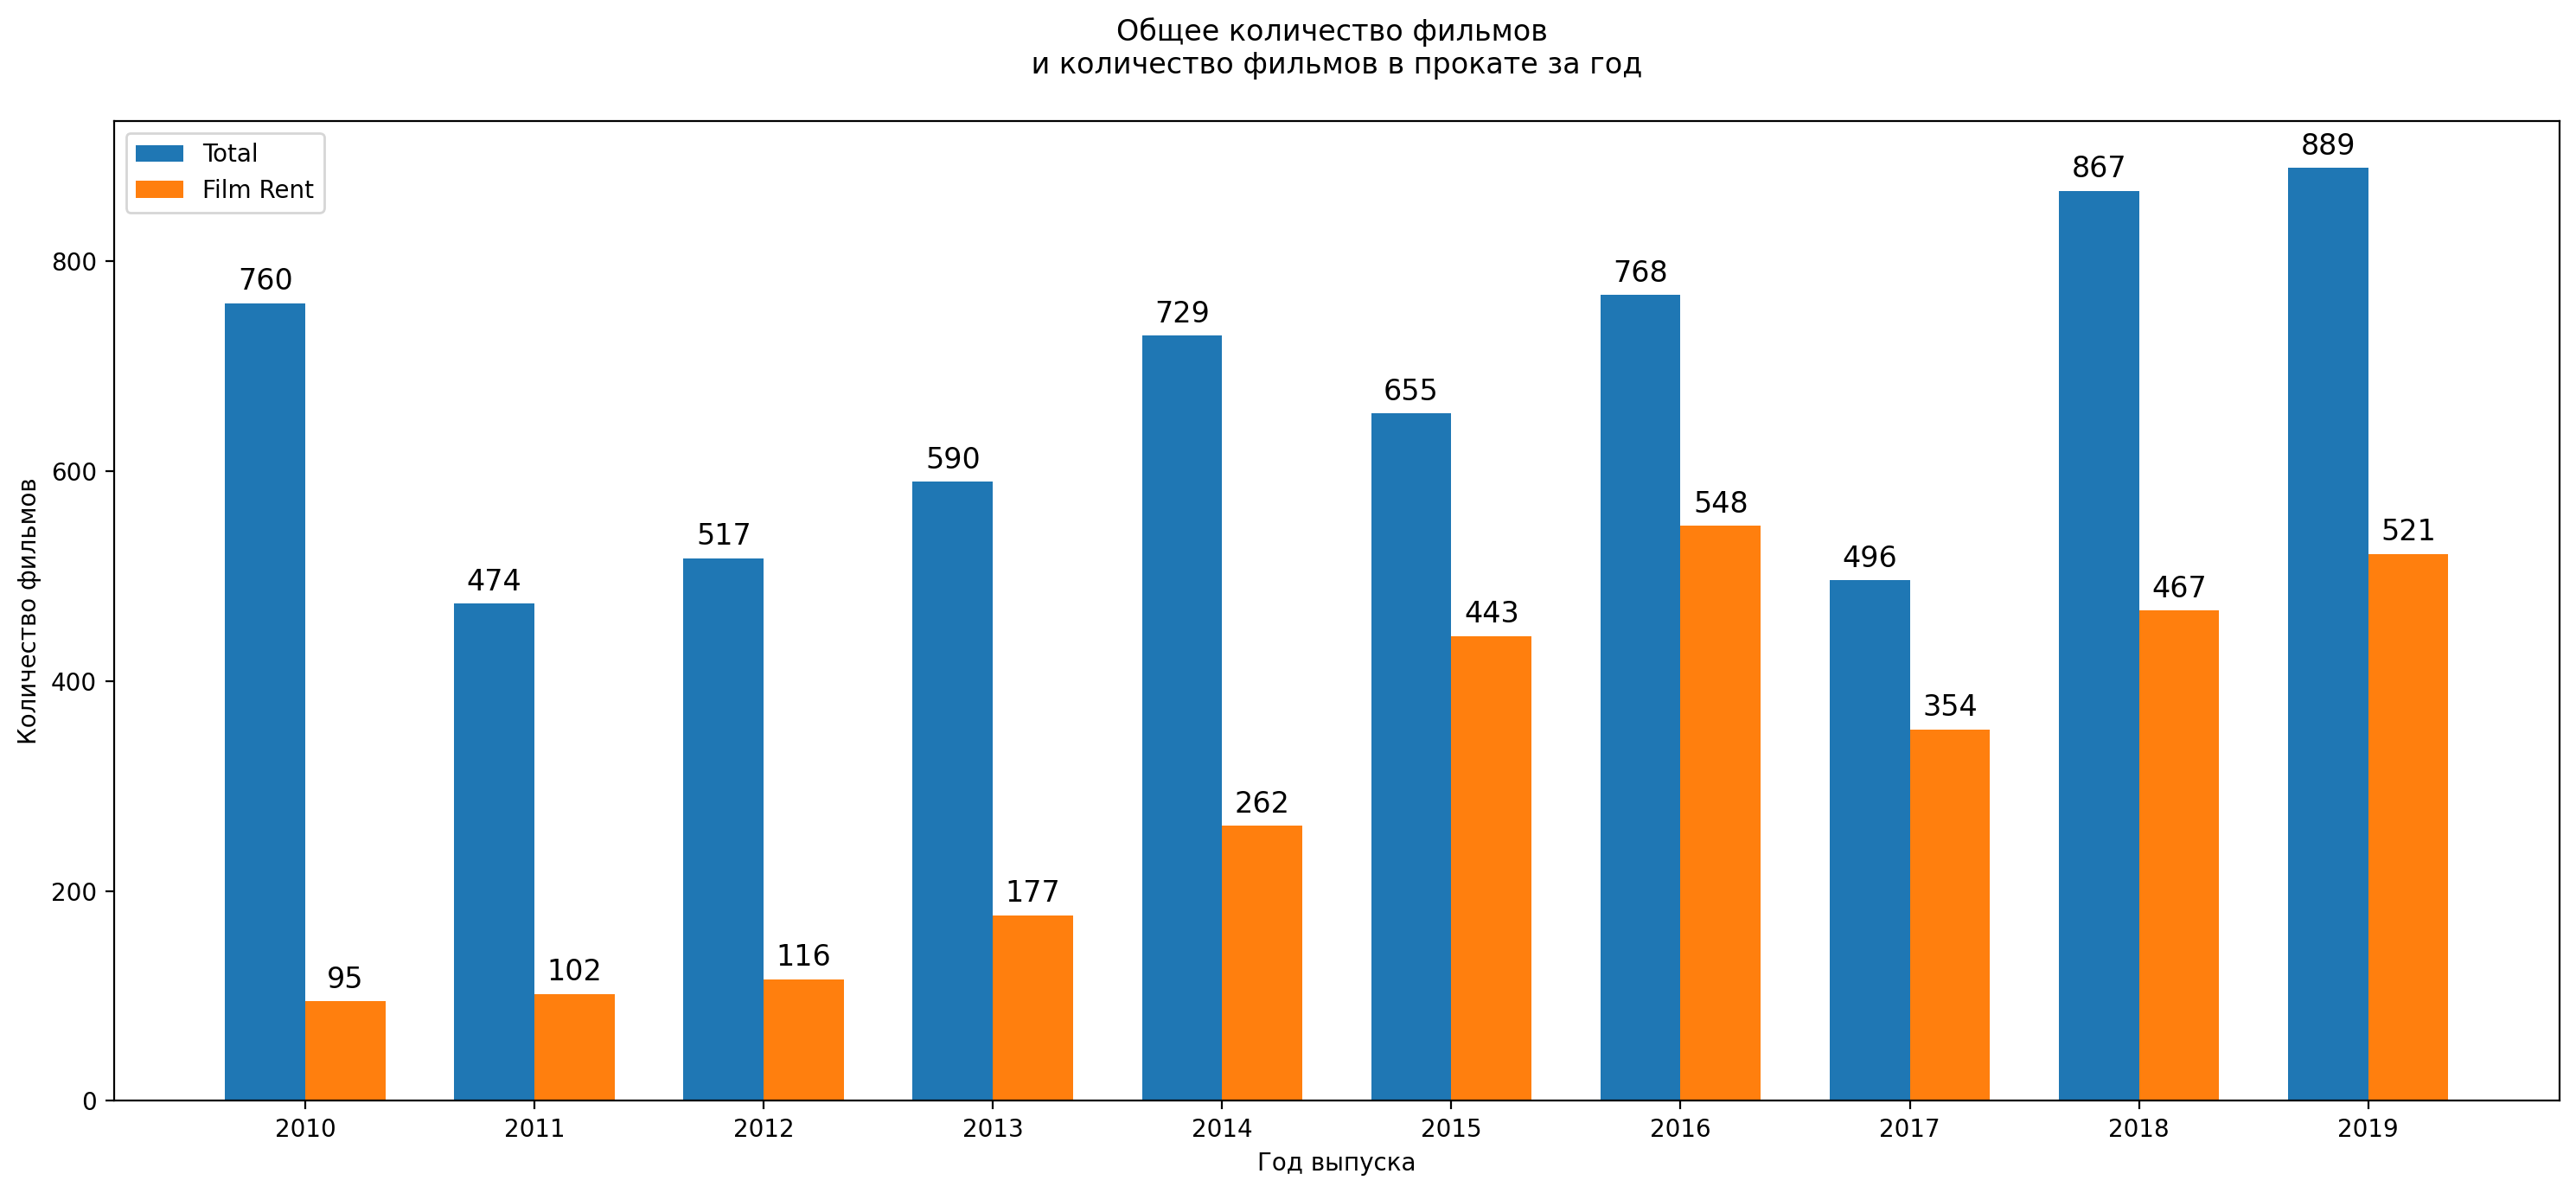

In [126]:
# Визуализируем данные о вышедших фильмах за каждый год
# Данные для первой диаграммы
years = film_by_year['release_year']
total = film_by_year['total']

# Данные для второй диаграммы
film_rent = film_by_year['film_rent']

x = np.arange(len(years))  # расположение меток на оси x
width = 0.35  # ширина столбцов

fig, ax = plt.subplots(figsize=(15, 7), dpi=200)

# Первая диаграмма
rects1 = ax.bar(x - width/2, total, width, label='Total')

# Вторая диаграмма
rects2 = ax.bar(x + width/2, film_rent, width, label='Film Rent')

# Добавление подписей и легенды
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество фильмов')
ax.set_title('Общее количество фильмов \n и количество фильмов в прокате за год \n')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Добавление подписей к столбцам
def autolabel(rects):
    """Добавление подписей к столбцам."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # отступ
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12
                   )

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

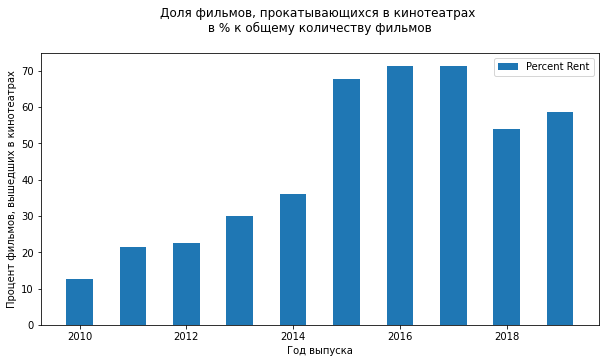

In [127]:
# визуализируем как менялся процент фильмов, вышедших в кинотеатре по отношению к общему количеству фильмов
years = film_by_year['release_year']
pers_rent = film_by_year['pers_rent']

fig, ax = plt.subplots(figsize=(10, 5))

# построим гистограмму
ax.bar(years, pers_rent, width=0.5, label='Percent Rent')

# Добавим подписи и легенду
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Процент фильмов, вышедших в кинотеатрах')
ax.set_title('Доля фильмов, прокатывающихся в кинотеатрах \n в % к общему количеству фильмов \n')
ax.legend()

plt.show()

**Вывод:**
1. Мы видим что в целом имеется тренд на возрастание количества выпускаемых фильмов, несмотря на значительные колебания от года к году. 
2. Аномально низкое количество фильмов было выпущено в 2017 году. Подобные колебания могут быть обусловлены экономической ситуацией, занятостью компаний крупными проектами а также носить ситуативный характер - фильмы имеют длинный и сложный производственный цикл, премьеры довольно часто переносятся.
3. Доля фильмов, транслирующихся в кинотеатре росла начиная с 2010г. по 2016 г.: с 12% до 74% к общему количеству фильмов.
В 2017 г. наблюдается замедление темпов роста - 79%.
В 2018-2019 г. наблюдается снижение доли филимов транслирующихся в кинотеатрах до 54-58%.
Вероятно, такая динамика связана с развитием онлайн-кинотеатров и возможности смотреть фильмы "по подписке".
   


## Российский кинобизнес
Т.к. главной целью исследования является изучение российского кинобизнеса, проанализируем фильмы российского производства отдельно.
Отберем в отдельную переменную проекты которые создавались в России, СССР или при участии нашей страны.

**Фильмы созданные при участии России**

In [128]:
# Список стран для фильтрации
countries_list = ['россия', 'ссср']

# Отфильтруем строки, содержащие 'россия' или 'ссср', сохраним их в переменную rus
rus = df[df['production_country'].apply(lambda x: any(country in x for country in countries_list))]
rus.sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
5855,режиссёр мозга,111013115,2015-08-12 12:00:00,художественный,гарифуллин рамиль рамзиевич,[россия],[р.гарифуллин],р.гарифуллин,16+,-999.00,-999.00,-999.00,unknown,8.70,"[боевик, триллер, драма]",0.00,2015,р.гарифуллин,боевик,-999.00,0,0
4682,лечение печали,111007918,2018-06-17 12:00:00,художественный,ип воробьева мария владимировна,[россия],[м.воробьева],м.воробьева,16+,-999.00,-999.00,-999.00,unknown,NaN,[unknown],0.00,2018,м.воробьева,unknown,-999.00,0,0
203,рай (2016),111015716,2016-09-20 12:00:00,художественный,"ооо ""продюсерский центр а.с.кончаловского"", drife filmproduktion gmbh & co.kg","[россия, германия]",[а.кончаловский],"а.кончаловский, ф.дайле",16+,0.00,35000000.00,287802711.00,министерство культуры,6.80,"[военный, драма, история]",51704986.00,2016,а.кончаловский,военный,0.12,1,1


**Зарубежные фильмы**

In [129]:
# сохраним в переменную non_rus проекты, созданные без российского участия
non_rus = df[~df['production_country'].apply(lambda x: any(country in x for country in countries_list))]
non_rus.sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
3799,гольциус и пеликанья компания,121009213,2013-04-04 12:00:00,художественный,"касандер филм компани, филм энд мьюзик интертейнмент, катрин дюссар продюксьон, эм пи филм, нидерландс фонд фор филм, роттерда...","[великобритания, нидерланды, франция, хорватия]",[питер гринуэй],"майк дауни, катрин дюссар, кеес касандер",18+,-999.00,-999.00,-999.00,unknown,6.10,"[комедия, биография, история]",0.00,2013,питер гринуэй,комедия,-999.00,0,0
2245,прекрасная планета 3d,126004516,2016-08-11 12:00:00,документальный,аймакс корпорэйшн,"[сша, канада]",[тони майерс],джуди кэролл,0+,-999.00,-999.00,-999.00,unknown,6.60,"[мультфильм, фантастика, боевик]",6262239.08,2016,тони майерс,мультфильм,-999.00,0,1
1234,инкарнация,121031216,2016-11-23 12:00:00,художественный,"ай эм глобал, блумхауз продакшнз, дип андерграунд филмз",[сша],[брэд пейтон],"джейсон блум, майкл ситцман",16+,-999.00,-999.00,-999.00,unknown,5.40,"[ужасы, триллер]",31130376.01,2016,брэд пейтон,ужасы,-999.00,0,1


**Российские фильмы, вышедшие в кинотеатрах**

In [130]:
rent_rus = rus.loc[rus['box_office'] > 0 ].groupby('release_year')['film_rent'].count().to_frame().reset_index()
rent_rus

,release_year,film_rent
0,2010,45
1,2011,46
2,2012,36
3,2013,77
4,2014,114
5,2015,157
6,2016,146
7,2017,57
8,2018,117
9,2019,113


In [131]:
# посчитаем общее количество фильмов выпущенное за каждый год
t_rus = (
    rus.groupby('release_year')['title']
    .count()
    .to_frame()
    .reset_index()
    .rename(columns={'title': 'total'})
)

In [132]:
# объединим результаты в одном датафрейме
rus_by_year = t_rus.merge(rent_rus, on = 'release_year' )
rus_by_year['pers_rent'] = rus_by_year['film_rent'] / rus_by_year['total'] * 100
rus_by_year

,release_year,total,film_rent,pers_rent
0,2010,207,45,21.74
1,2011,118,46,38.98
2,2012,79,36,45.57
3,2013,146,77,52.74
4,2014,307,114,37.13
5,2015,260,157,60.38
6,2016,239,146,61.09
7,2017,159,57,35.85
8,2018,479,117,24.43
9,2019,342,113,33.04


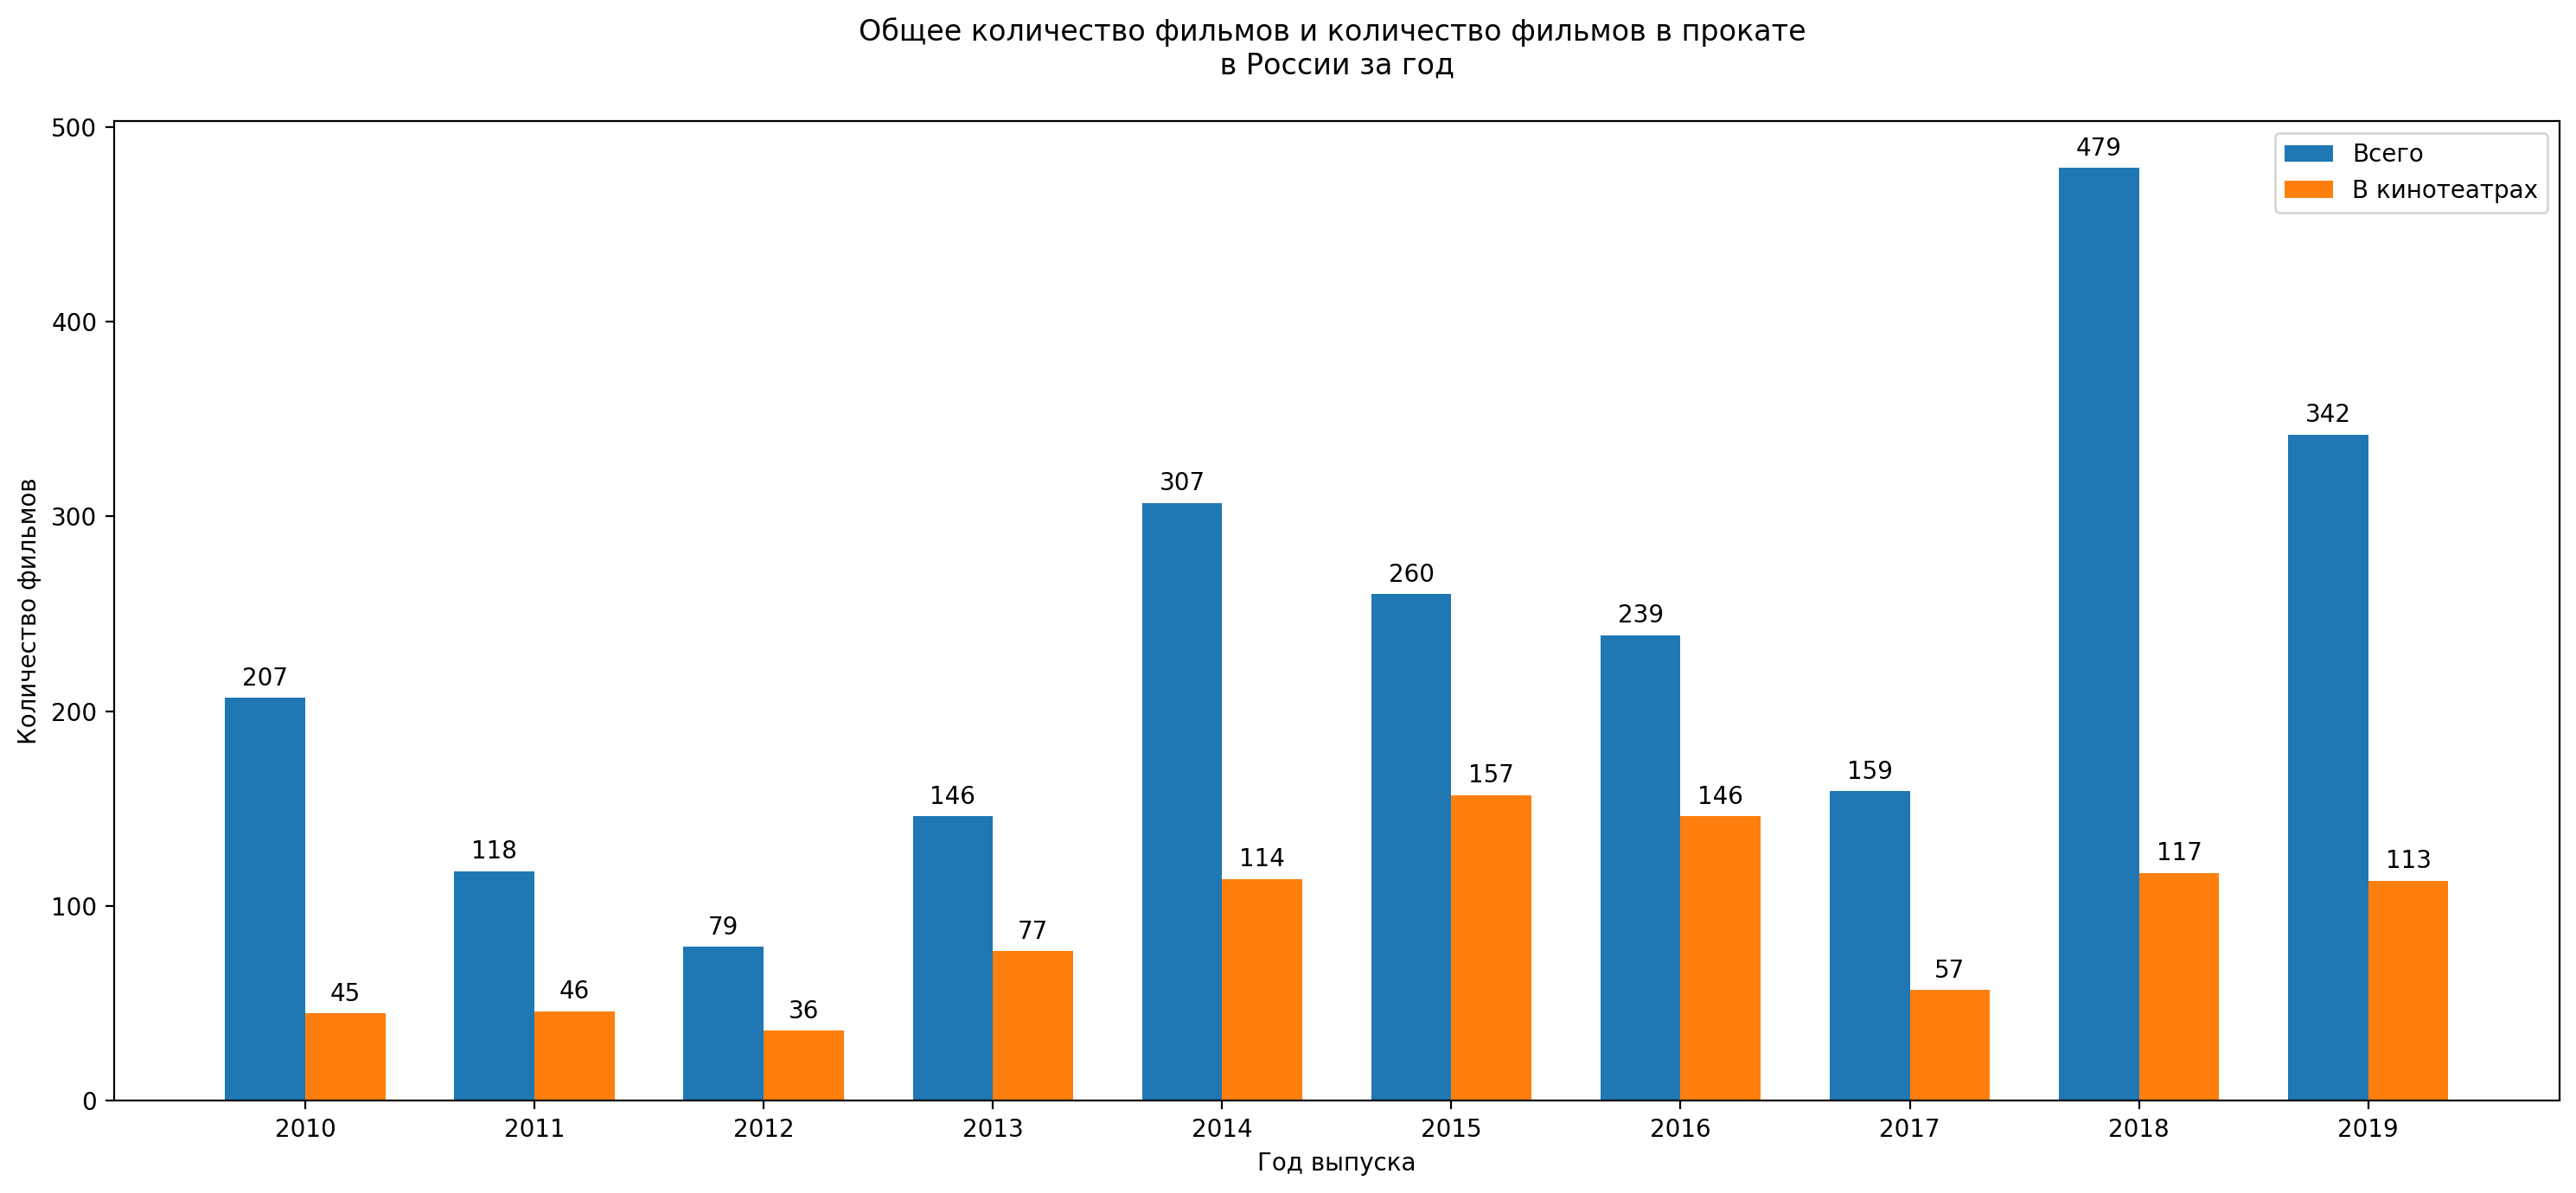

In [133]:
# Данные для первой диаграммы
years = rus_by_year['release_year']
total = rus_by_year['total']

# Данные для второй диаграммы
film_rent = rus_by_year['film_rent']

x = np.arange(len(years))  # расположение меток на оси x
width = 0.35  # ширина столбцов

fig, ax = plt.subplots(figsize=(15, 7), dpi=200)

# Первая диаграмма
rects1 = ax.bar(x - width/2, total, width, label='Всего')

# Вторая диаграмма
rects2 = ax.bar(x + width/2, film_rent, width, label='В кинотеатрах')

# Добавление подписей и легенды
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество фильмов')
ax.set_title('Общее количество фильмов и количество фильмов в прокате \n в России за год \n')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Добавление подписей к столбцам
def autolabel(rects):
    """Добавление подписей к столбцам."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # отступ
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10
                   )

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

**Процент фильмов, вышедших в кинотеатре**

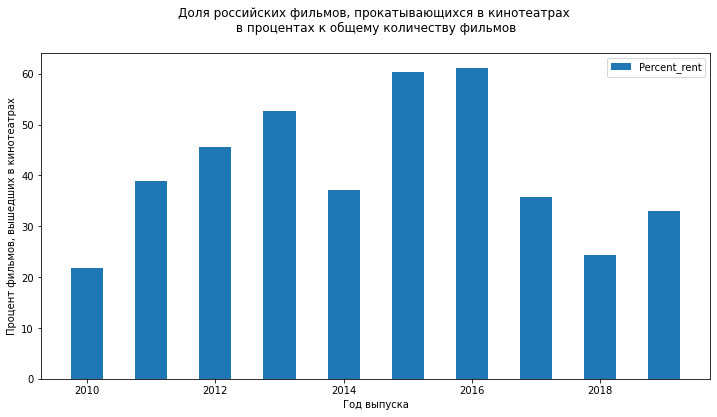

In [134]:
# визуализируем как менялся процент фильмов, вышедших в кинотеатре по отношению к общему количеству фильмов
years = rus_by_year['release_year']
pers_rent = rus_by_year['pers_rent']

fig, ax = plt.subplots(figsize=(12, 6))

# построим гистограмму
ax.bar(years, pers_rent, width=0.5, label='Percent_rent')

# Добавим подписи и легенду
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Процент фильмов, вышедших в кинотеатрах')
ax.set_title('Доля российских фильмов, прокатывающихся в кинотеатрах \n в процентах к общему количеству фильмов \n')
ax.legend()

plt.show()

**Вывод:**

1. В российском сегменте отсутствует ярко выраженный тренд на увеличение количества выпускаемых фильмов. Это может быть связано с тем, что выборка по российским проектам гораздо меньше, чем общая выборка, а значит мы чаще наблюдаем крайние значения.
Тем не менее трен на рост общего количества присутствует, хотя и менее выраженный.

2. В российской киноиндустрии 2017 г также имеет нетипично низкое количество выпущенных фильмов, а в следующем -2018 г. наблюдаем рекордное количество выпущенных фильмо. Вероятно, часть релизов 2017 г. состоялась в 2018 г.. Причины этого нуждаются в дополнительном анализе.
3.  Доля фильмов вышедших в прокат:
- устойчиво росла  с 2010 по 2016 г. (с 20% до 64%). Исключением является 2014 г. - тут мы наблюдаем значительный провал в доле фильмов, показываемых в кинотеатрах (37%). При этом в абсолютных фифрах  2014 - не показывает падения, а низкие значения в %, связано бОльшим количеством выпущенных фильмов.
- с 2017 г мы видим видим существенное снижение доли фильмов, прокатывающихся в кинотеатрах. Причиной является общемировой тренд на развитие онлайн- кинотеатров и стриминнговых сервисов.


**Кассовые сборы по фильмам, произведенным в России**

Прежде чем перейти к анализу зависимости суммы кассовых сборов от различных факторов, напомним, что качество данных о суммах сборов не позволяет делать достоверных и однозначных выводов:
- более чем 50% строк имеют незаполненное значение о сумме сборов
- часть оставшихся строк имеет некорректные значения (ошибки ввода)
Соответственно результаты анализа не могут считаться валидными и носят ознакомительный характер.

**Описание данных по кассовым сборам**

In [135]:
# Выведем показатели по кассовым сборам, минимальных и максимальных значениях по годам
# Для зарубежных фильмов
indicators_foregin = non_rus[non_rus['box_office']>0].groupby('release_year').agg(
min_f = ('box_office', 'min'),
max_f = ('box_office', 'max'),
median_f = ('box_office', 'median'),
mean_f = ('box_office', 'mean')
).style.format("{:,.2f}").data

In [136]:
# Выведем показатели по кассовым сборам, минимальных и максимальных значениях по годам
# Для российских фильмов
indicators_rus = rus[rus['box_office']>0].groupby('release_year').agg(
min_rus = ('box_office', 'min'),
max_rus = ('box_office', 'max'),
median_rus = ('box_office', 'median'),
mean_rus = ('box_office', 'mean')
).style.format("{:,.2f}").data


In [137]:
# объедим все данные в одну таблицу
indicators = indicators_foregin.merge(indicators_rus, on = 'release_year')

# Выведем основные показатели для:
# зарубежных фильмов (min_f, max_f, median_f,mean_f)
# российских фильмов (min_rus, max_rus, median_rus, mean_rus)

indicators

,min_f,max_f,median_f,mean_f,min_rus,max_rus,median_rus,mean_rus
release_year,,,,,,,,
2010,75.00,5054311.03,2210.00,189438.42,100.00,45225.00,1820.00,5886.64
2011,125.00,14054639.01,2952.50,492270.88,200.00,87911.00,3806.50,9626.63
2012,80.00,24872554.03,6692.50,378971.90,200.00,351643.00,10390.00,28907.03
2013,100.00,4321638.00,3225.00,65649.35,40.00,19957031.50,4400.00,301436.65
2014,250.00,1016410635.30,120920.00,37469506.87,50.00,425970499.00,17583.00,16018356.35
2015,100.00,1646580645.70,6512206.50,99888665.39,150.00,704928216.00,2323980.00,38710285.78
2016,100.00,2048126108.00,6055173.13,110345088.76,240.00,1402255390.00,2226340.00,44293125.98
2017,7900.00,2118396119.00,9968340.00,124982590.57,77837.00,2779686144.00,8667192.00,198880086.01
2018,82506.00,1913257923.06,10369954.99,102820338.34,41225.00,2271754004.52,4462845.50,111944567.59


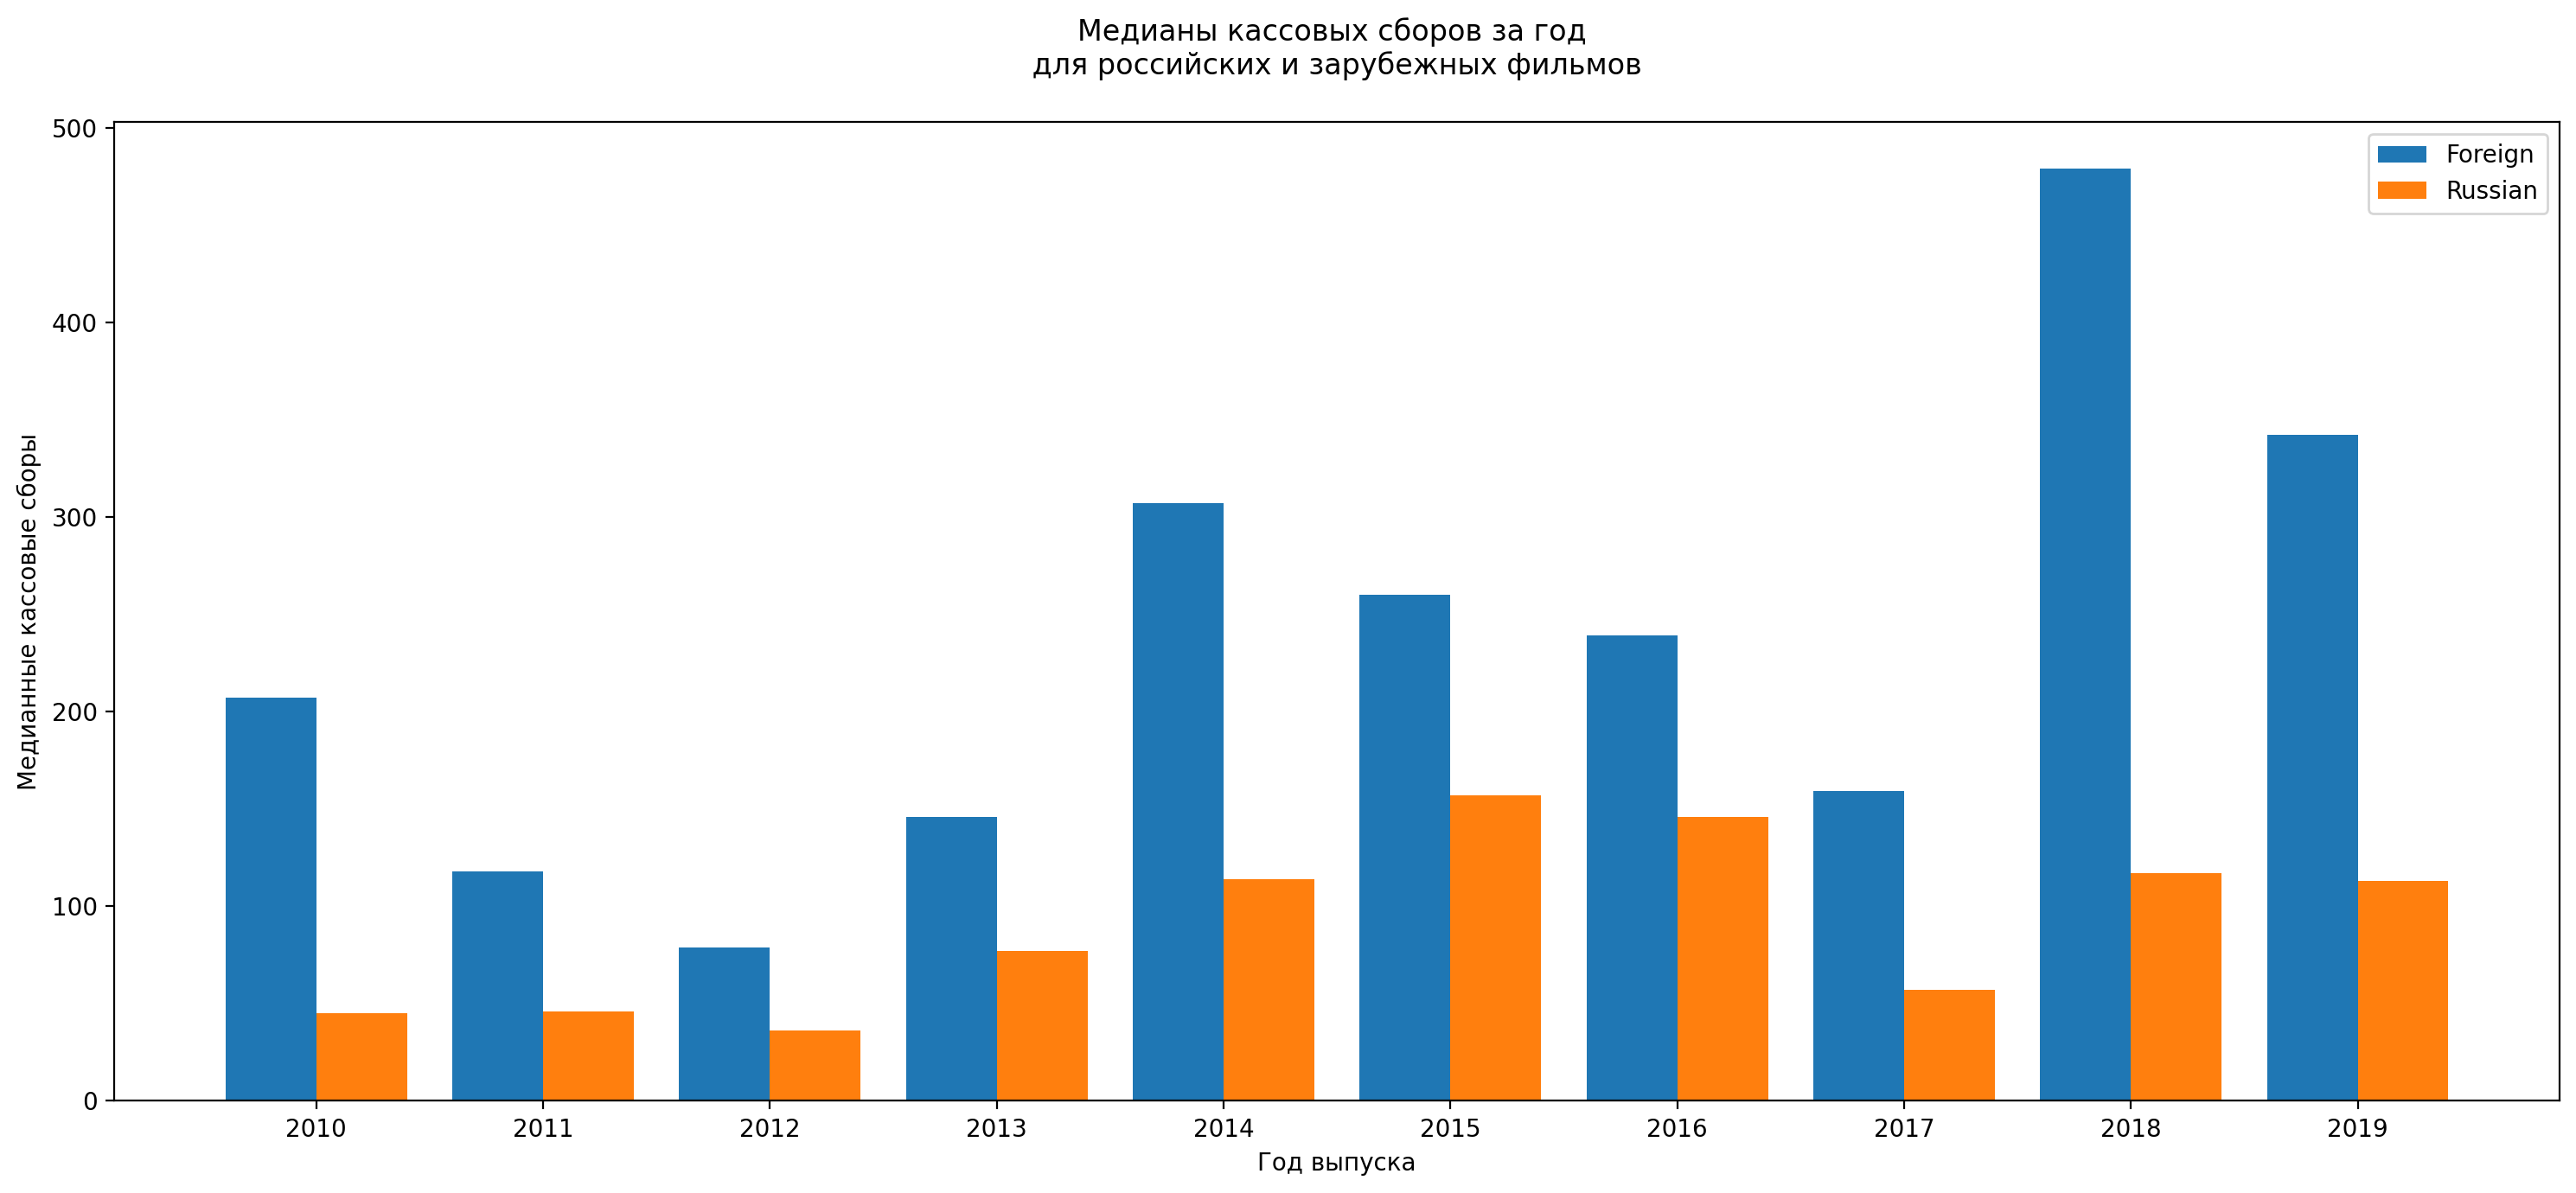

In [138]:
indicators = indicators.reset_index()

# Данные для первой диаграммы
years = indicators['release_year']
median_f = indicators['median_f']

# Данные для второй диаграммы
median_rus = indicators['median_rus']

x = np.arange(len(years))  # расположение меток на оси x
width = 0.40  # ширина столбцов

fig, ax = plt.subplots(figsize=(15, 7), dpi=200)

# Первая диаграмма
rects1 = ax.bar(x - width/2, total, width, label='Foreign')

# Вторая диаграмма
rects2 = ax.bar(x + width/2, film_rent, width, label='Russian')

# Добавление подписей и легенды
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Медианные кассовые сборы')
ax.set_title('Медианы кассовых сборов за год \n для российских и зарубежных фильмов \n')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

fig.tight_layout()
plt.show()

**Выводы**
1. Показатели за 2010 -2013 года имеют нетипичный характер. Это говорит о проблемах с данными: маленькое количество наблюдений, некоррекные данные и проч.. Данные за перечисленные года нуждаются в дополнительном анализе.
2. В минимальных значениях по каждому году заполнены аномальными цифрами - это явные ошибки ввода.
3. Медианные значения по каждому году существенно отличается от средних, что говорит о присутствии в кажой категории выбросов и аномальных значений

**Проанализируем динамику общей суммы сборов за каждый год**

In [139]:
# посчитаем общую сумму сборов по каждому году
box_year_total = df\
            .groupby('release_year')['box_office']\
            .sum()\
            .reset_index()\
            .rename(columns = {'box_office': 'box_total'})
box_year_total

,release_year,box_total
0,2010,9736819.97
1,2011,28009994.01
2,2012,31358405.03
3,2013,29775556.20
4,2014,7371579640.00
5,2015,34645673169.66
6,2016,50825522075.72
7,2017,48455994302.75
8,2018,49084632828.45
9,2019,48262278668.60


In [140]:
# проанализируем сумму сборов по российским фильмам
box_year_rus = rus.groupby('release_year')['box_office'].sum().reset_index().rename(columns = {'box_office':'box_rus' })
box_year_rus

,release_year,box_rus
0,2010,264899.00
1,2011,442825.00
2,2012,1040653.00
3,2013,23210621.70
4,2014,1826092623.90
5,2015,6077514867.58
6,2016,6466796393.12
7,2017,11336164902.68
8,2018,13097514408.01
9,2019,11200047520.12


In [141]:
# объединим данные о общих сборах и сборах российских фильмов в одной таблице
box_year_total= box_year_total.merge(box_year_rus, on= 'release_year')
box_year_total

,release_year,box_total,box_rus
0,2010,9736819.97,264899.00
1,2011,28009994.01,442825.00
2,2012,31358405.03,1040653.00
3,2013,29775556.20,23210621.70
4,2014,7371579640.00,1826092623.90
5,2015,34645673169.66,6077514867.58
6,2016,50825522075.72,6466796393.12
7,2017,48455994302.75,11336164902.68
8,2018,49084632828.45,13097514408.01
9,2019,48262278668.60,11200047520.12


In [142]:
# рассчитаем долю российских фильмов в общей сумме кассовых сборов
box_year_total['rus_%'] = box_year_total['box_rus'] / box_year_total['box_total']*100

box_year_total

,release_year,box_total,box_rus,rus_%
0,2010,9736819.97,264899.00,2.72
1,2011,28009994.01,442825.00,1.58
2,2012,31358405.03,1040653.00,3.32
3,2013,29775556.20,23210621.70,77.95
4,2014,7371579640.00,1826092623.90,24.77
5,2015,34645673169.66,6077514867.58,17.54
6,2016,50825522075.72,6466796393.12,12.72
7,2017,48455994302.75,11336164902.68,23.39
8,2018,49084632828.45,13097514408.01,26.68
9,2019,48262278668.60,11200047520.12,23.21


In [143]:
# рассчитаем общую сумму кассовых сборов для иностранных фильмов
box_year_total['box_foreign'] = box_year_total['box_total'] - box_year_total['box_rus']

In [144]:
# посчитаем количество ненулевых наблюдений по кассовым сборам за каждый год
row_year = df[df['box_office']>0].groupby('release_year')['title'].count().reset_index().rename(columns = {'title':'row_total'})
row_year

,release_year,row_total
0,2010,95
1,2011,102
2,2012,116
3,2013,177
4,2014,262
5,2015,443
6,2016,548
7,2017,354
8,2018,467
9,2019,521


In [145]:
# занесем данные о количестве наблюдений в общую таблицу
box_year_total= box_year_total.merge(row_year, on= 'release_year')
box_year_total

,release_year,box_total,box_rus,rus_%,box_foreign,row_total
0,2010,9736819.97,264899.00,2.72,9471920.97,95
1,2011,28009994.01,442825.00,1.58,27567169.01,102
2,2012,31358405.03,1040653.00,3.32,30317752.03,116
3,2013,29775556.20,23210621.70,77.95,6564934.50,177
4,2014,7371579640.00,1826092623.90,24.77,5545487016.10,262
5,2015,34645673169.66,6077514867.58,17.54,28568158302.08,443
6,2016,50825522075.72,6466796393.12,12.72,44358725682.60,548
7,2017,48455994302.75,11336164902.68,23.39,37119829400.07,354
8,2018,49084632828.45,13097514408.01,26.68,35987118420.44,467
9,2019,48262278668.60,11200047520.12,23.21,37062231148.48,521


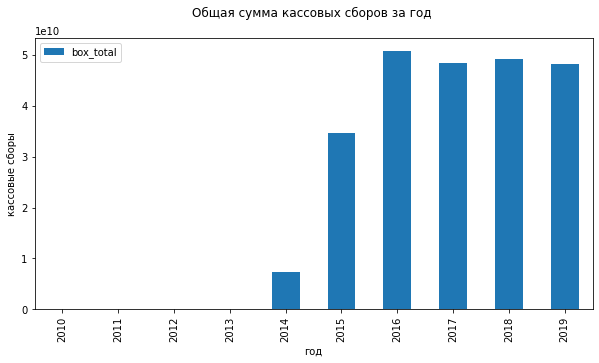

In [146]:
# визуализируем общую сумму кассовых сборов за каждый год
box_year_total.plot(x='release_year', y='box_total', kind='bar', figsize=(10, 5))

plt.xlabel('год')
plt.ylabel('кассовые сборы')
plt.title('Общая сумма кассовых сборов за год \n')
plt.show()

- Значимый объем данных о кассовых сборах мы имеем только с 2014 года. 
- Сумма кассовых сборов за 2014 также выглядит неправдоподобно низкой по отношению к 2015г и последующимкодам.
- Вероятнее всего такие аномалии вызваны неполными и некорректными данными.

Исключим из анализа 2010 - 2014 года, т.к.  по ним недостаточно данных.

In [147]:
# Удалим 2010-2013 гг из выборки
years_to_exclude = [2010, 2011, 2012, 2013, 2014]
box_year_total = box_year_total[~box_year_total['release_year'].isin(years_to_exclude)]

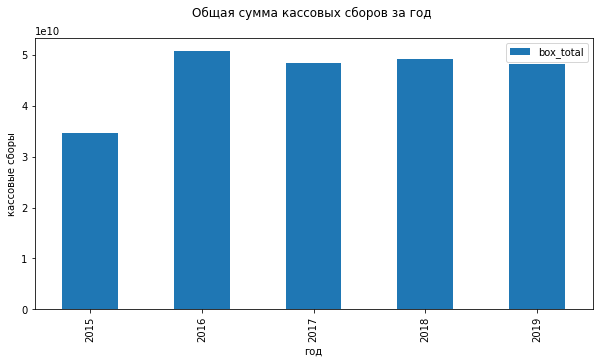

In [148]:
# визуализируем общую сумму кассовых сборов за каждый год
box_year_total.plot(x='release_year', y='box_total', kind='bar', figsize=(10, 5))

plt.xlabel('год')
plt.ylabel('кассовые сборы')
plt.title('Общая сумма кассовых сборов за год \n')
plt.show()

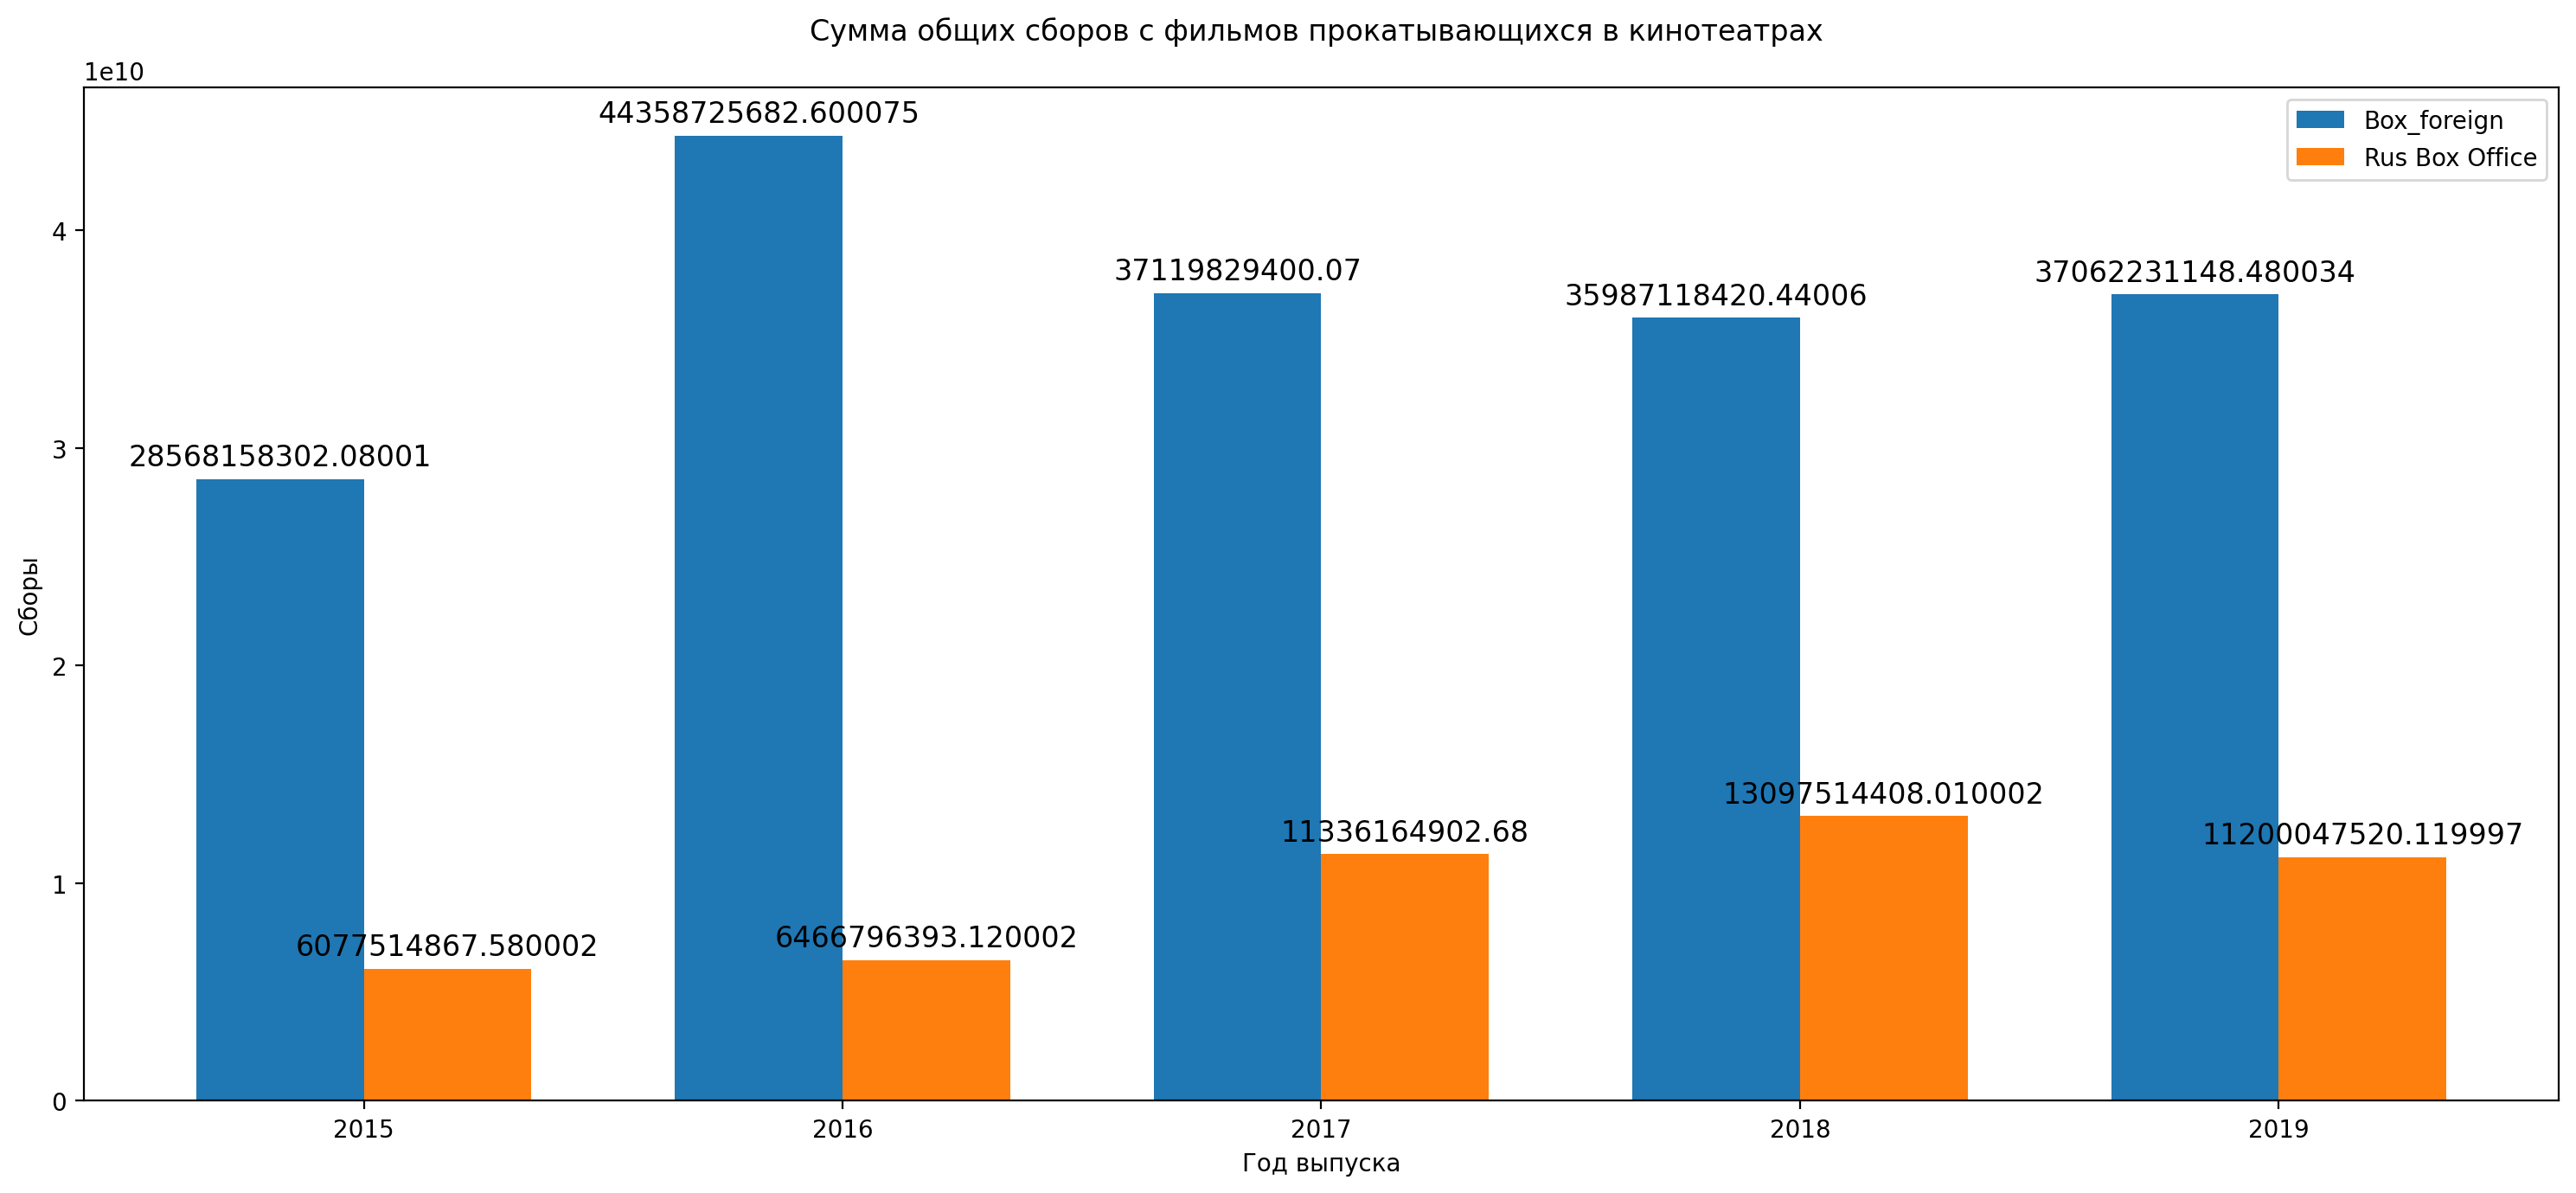

In [149]:
# Данные для первой диаграммы
years1 = box_year_total['release_year']
box_office1 = box_year_total['box_foreign']

# Данные для второй диаграммы
years2 = box_year_total['release_year']
box_office2 = box_year_total['box_rus']

x = np.arange(len(years1))  # расположение меток на оси x
width = 0.35  # ширина столбцов

fig, ax = plt.subplots(figsize=(15, 7), dpi=200)

# Первая диаграмма
rects1 = ax.bar(x - width/2, box_office1, width, label='Box_foreign')

# Вторая диаграмма
rects2 = ax.bar(x + width/2, box_office2, width, label='Rus Box Office')

# Добавление подписей и легенды
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Сборы')
ax.set_title('Сумма общих сборов с фильмов прокатывающихся в кинотеатрах \n')
ax.set_xticks(x)
ax.set_xticklabels(years1)
ax.legend()

# Добавление подписей к столбцам 
def autolabel(rects):
    """Добавление подписей к столбцам."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # отступ
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize= 12)  

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [150]:
box_year_total

,release_year,box_total,box_rus,rus_%,box_foreign,row_total
5,2015,34645673169.66,6077514867.58,17.54,28568158302.08,443
6,2016,50825522075.72,6466796393.12,12.72,44358725682.60,548
7,2017,48455994302.75,11336164902.68,23.39,37119829400.07,354
8,2018,49084632828.45,13097514408.01,26.68,35987118420.44,467
9,2019,48262278668.60,11200047520.12,23.21,37062231148.48,521


**Выводы**
1. Значимый объем данных о кассовых сборах мы имеем только с 2015 года. 2010 -2014  мы исключили изанализа
2. Общая сумма кассовых сборов мало меняется от года к году и находится в раоне 50 млрд. рублей. Т.е., с учетом инфляции, сумма кассовых сборов в реальном выражении снижается ежегодно. 
3. Доля российских фильмов в общей сумме кассовых сборов стабильна (от 15 до 27%) и имеет медленнeнную тенденцию к росту.
4. В 2017 г мы обнаружили резкое снижение общего количества выпущенных фильмов и количества фильмов прокатывающихся в кинотеатре. Вероятно, это связано с тем, что в 2017 состоялся релиз нескольких блокбастеров,которые обеспечили основные сборы

**Средние и медианные значения кассовых сборов по каждому году**

In [151]:
# сгруппируем данные по годам и выведем средние значения

year_mean = df.query('box_office > 0').groupby('release_year'). agg(
    box_median = ('box_office', 'median'),
    box_mean = ('box_office', 'mean'),
    box_total = ('box_office', 'sum'),
    row_count = ('title', 'count')
).reset_index()

year_mean

,release_year,box_median,box_mean,box_total,row_count
0,2010,2050.00,102492.84,9736819.97,95
1,2011,3042.50,274607.78,28009994.01,102
2,2012,6837.50,270331.08,31358405.03,116
3,2013,3580.00,168223.48,29775556.20,177
4,2014,25400.00,28135800.15,7371579640.00,262
5,2015,4394105.00,78206937.18,34645673169.66,443
6,2016,4177689.05,92747303.06,50825522075.72,548
7,2017,9943877.50,136881339.84,48455994302.75,354
8,2018,8708659.30,105106280.15,49084632828.45,467
9,2019,4765559.50,92633932.19,48262278668.60,521


In [152]:
# Комментарий ревьюера 2 
df.box_office

0       32244810.00
1      363622804.90
2       85405423.61
3       10355541.11
4      393344626.30
           ...     
6740           0.00
6741           0.00
6742           0.00
6743           0.00
6744           0.00
Name: box_office, Length: 6745, dtype: float64

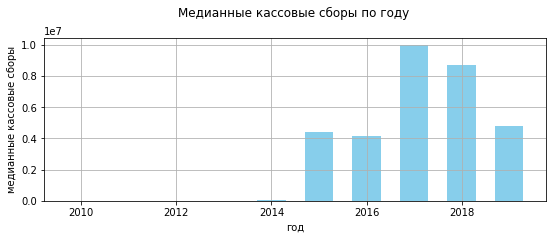

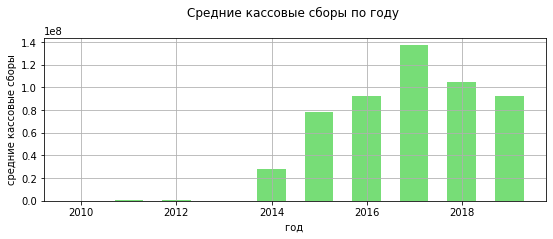

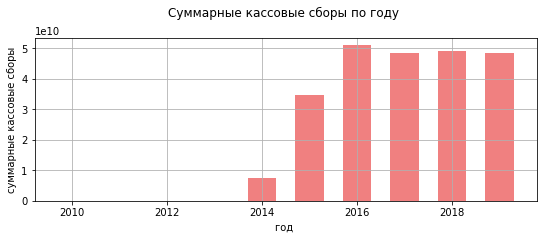

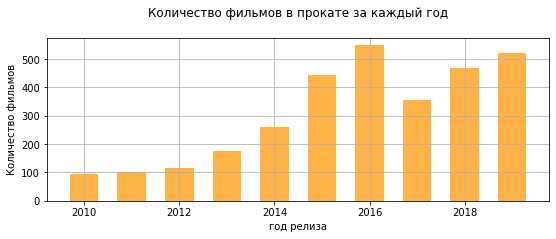

In [153]:
# Медианные кассовые сборы по году
fig, ax1 = plt.subplots(figsize=(9, 3))
ax1.bar(year_mean['release_year'], year_mean['box_median'], color='skyblue', width=0.6)
ax1.set_xlabel('год')
ax1.set_ylabel('медианные кассовые сборы')
ax1.set_title('Медианные кассовые сборы по году \n')
ax1.grid(True)

# Средние кассовые сборы по году
fig, ax2 = plt.subplots(figsize=(9, 3))
ax2.bar(year_mean['release_year'], year_mean['box_mean'], color='#77dd77', width=0.6)
ax2.set_xlabel('год ')
ax2.set_ylabel('средние кассовые сборы')
ax2.set_title('Средние кассовые сборы по году \n')
ax2.grid(True)

# Средние кассовые сборы по году
fig, ax4 = plt.subplots(figsize=(9, 3))
ax4.bar(year_mean['release_year'], year_mean['box_total'], color='lightcoral', width=0.6)
ax4.set_xlabel('год ')
ax4.set_ylabel('суммарные кассовые сборы')
ax4.set_title('Суммарные кассовые сборы по году \n')
ax4.grid(True)

# Количество выпущенных фильмов за каждый
fig, ax3 = plt.subplots(figsize=(9, 3))
ax3.bar(year_mean['release_year'], year_mean['row_count'], color='#ffb347', width=0.6)
ax3.set_xlabel('год релиза')
ax3.set_ylabel('Количество фильмов')
ax3.set_title('Количество фильмов в прокате за каждый год\n')
ax3.grid(True)

# Показать все графики
plt.show()

**Выводы**

1. 2010 -2017 гг.

- С 2010 по 2017 наблюдается устойчивый тренд на увеличение количества выходящих в прокат фильмов
- При этом, показатели медианных и средних кассовых сборов за 2010 - 2014 гг.. нетипично.низкие. Отчасти эта проблема обусловлена  наличием ошибок ввода в этих столбцах - вместо рублей кассовые сборы указаны в тысячах или миллионах рублей. 
- С 2014 по 2017 гг. наблюдается тенденция к росту средних и медианных значений.

Таким образом, с 2010 по 2017 гг. рынок кинопроката устойчиво развивался, наращивая количество выпускаемых фильмов и средние сборы с одного фильма.

2. 2017 г.

- В 2017 г. наблюдаются пиковые значения средних и медианных кассовых сборов. При этом в количестве фильмов наблюдаем заметное падение, но суммарная выручка осталась на уровне 2016.
- Т.е. сокращение количества предложений не привело к снижению спроса и паденю выручки. Пользователи продолжили посещать кинотеатры с той же интенсивностью, выбирая фильмы из меньшего количества вариантов.

Таким образом, уменьшение количества выпускаемых фильмов не приводит к снижению спроса и падению выручки в кинотеатрах в рамках одного года.

3. 2018 -2019 гг.

- мы видим существенное снижение медианных и средних кассовых сборов. Что связано с развитием онлайн-кинотеатров и стриминговых сервисов. 
- При этом представители киноиндустрии, стремясь компенсировать снижение сборов с одного фильма выпускают в прокат большее количество фильмов, поэтому общая сумма сборов сопоставима с 2016 -2017 гг. Однако, с учетом инфляции реальный совокупный доход в реальном выражении снижается.

Таким образом, начиная с 2018 года мы наблюдаем снижение средних и медианных  кассовых сборов с одного фильма, а также уменьшение суммарных доходов с проката в реальном выражении.


**Зависимость кассовых сборов от возрастных ограничений фильма**

**Категории фильмов, собравшие максимальные кассовые сборы в прокате**

In [154]:
ar_sum = df.query('release_year > 2014 & box_office > 0').groupby('age_restriction')\
    .agg(
        total_sum = ('box_office', 'sum'),
        row_count = ('age_restriction', 'count'),
    ).sort_values('total_sum', ascending=False)

ar_sum

,total_sum,row_count
age_restriction,,
16+,75218848330.81,796
12+,59420746998.60,344
6+,55220331927.92,310
18+,40588625618.88,792
0+,825548168.97,91


- Больше всего денег в прокате собрали фильмы с возрастным ограничением 16+, однако количество фильмов 16+ также макимальное.

Проанализируем, какая категория фильмов имеет наибольшее медианное и среднее значение

In [155]:
# выведем среднее и медианное значение кассовых сборов в зависимости от возрастных ограничений
ar_mean = df.query('release_year > 2014 & box_office > 0')\
    .groupby('age_restriction')\
    .agg(
        box_median = ('box_office', 'median'),
        box_mean = ('box_office', 'mean'),
    ).sort_values('box_median')
ar_mean

,box_median,box_mean
age_restriction,,
0+,2955934.60,9071957.90
12+,5065044.25,172734729.65
16+,5548287.76,94496040.62
18+,6110808.37,51248264.67
6+,13656756.09,178130102.99


- В среднем наибольше сборы получают фильмы с маркировкой фильмы с маркировкой 6+.
Наиболее вероятная причина в том, что такие фильмы подходят для семейного досуга - они интересны и взрослым и родителям.

- Наименьшие сборы у фильмов 0+ - у таких проектов ЦА - преимущественно дети. Взрослые на таких еансах скучают, а следовательно менее охотно покупают билеты.

**Динамика кассовых сборов в зависимости от возрастных ограничений по годам**

In [156]:
# сгруппируем датасет по году релиза и возрастному ограничению фильма 
ar = df.loc[df['box_office'] > 0].groupby(['release_year', 'age_restriction']).agg(
     box_total = ('box_office', 'sum'),
     median_box = ('box_office', 'median'),
     mean_box = ('box_office', 'mean'),
     row_cownt = ('title', 'count')
).reset_index()

# Исклбчим из анализа года с недостаточным объемом данных
ar = ar.query('release_year > 2014').reset_index(drop=True)

**Динамика средних и медианных сборов по каждой категории возр.ограничений**

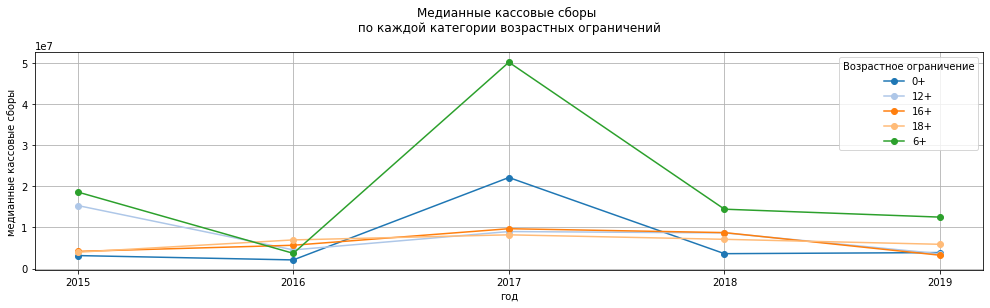

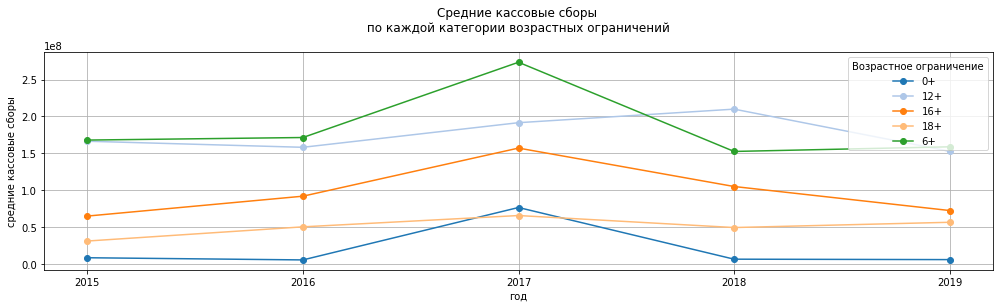

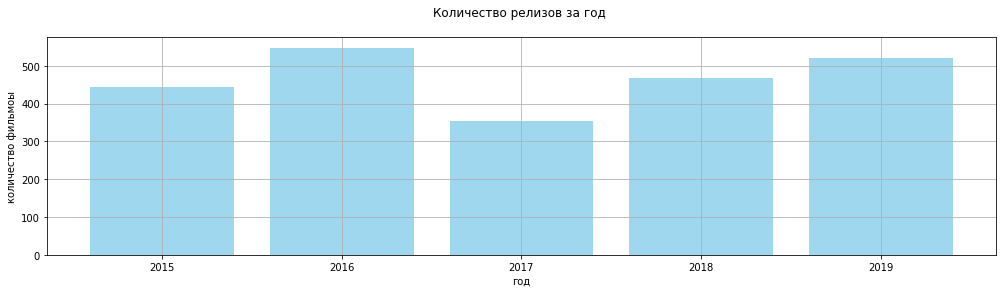

In [157]:
# Построение линейного графика для медианы
fig, ax = plt.subplots(figsize=(17,4))

age_restrictions = ar['age_restriction'].unique()
colors = plt.cm.tab20.colors

for i, age in enumerate(age_restrictions):
    data = ar[ar['age_restriction'] == age]
    ax.plot(data['release_year'], data['median_box'], marker='o', label=age, color=colors[i % len(colors)])

ax.set_xlabel('год')
ax.set_ylabel('медианные кассовые сборы')
ax.set_title('Медианные кассовые сборы \n по каждой категории возрастных ограничений \n')
ax.legend(title='Возрастное ограничение')
plt.xticks(ar['release_year'].unique())
plt.grid(True)
plt.show()


# Построение линейного графика для средних значений
fig, ax = plt.subplots(figsize=(17, 4))

age_restrictions = ar['age_restriction'].unique()
colors = plt.cm.tab20.colors

for i, age in enumerate(age_restrictions):
    data = ar[ar['age_restriction'] == age]
    ax.plot(data['release_year'], data['mean_box'], marker='o', label=age, color=colors[i % len(colors)])

ax.set_xlabel('год')
ax.set_ylabel('средние кассовые сборы')
ax.set_title('Средние кассовые сборы \n по каждой категории возрастных ограничений \n')
ax.legend(title='Возрастное ограничение', loc='upper right')
plt.xticks(ar['release_year'].unique())
plt.grid(True)


# График количества наблюдений за год
year = df.loc[df['box_office'] > 0].groupby('release_year').agg(
    row_count = ('title', 'count')).reset_index()
year = year.query('release_year > 2014')

fig, ax = plt.subplots(figsize=(17, 4))

ax.bar(year['release_year'], year['row_count'], color='skyblue', alpha=0.8)

ax.set_xlabel('год')
ax.set_ylabel('количество фильмоы')
ax.set_title('Количество релизов за год \n')

plt.xticks(year['release_year'])
plt.grid(True)

plt.show()

Т.к. данные о кассовых сборах имеют выбросы и некорректные значенияиспользуем для анализа мединанные значения. Данные о средних используем как дополнительный источник информации.

Анализ медианных и средних значений показал:
- на протяжении 2015 -2019 г. наибольшее количество кассовых сборов получали фильмы с маркировкой 6+.
- стабильные медианные кассовые сборы фильмы с маркировкой 12+ и 16+.
- меньшие, но также стабильные сборы в категории 18+
- фильмы 0+ - категория с самой низкими медианными сборами

Также мы видим, следующую аномалию:
В 2017 вышло наименьшее количество фильмов при этом, категории 0+, 6+ показывают пик медиан именно в этот год. Скорее всего это говорит о том, что в 2017 вышло больше блокбастеров, чем в другие году.  Также, ожидая большие премьеры,  кинокомпании могли отложить выпуск менее ожидаемых фильмов на периоды менее насыщенными предложениями.

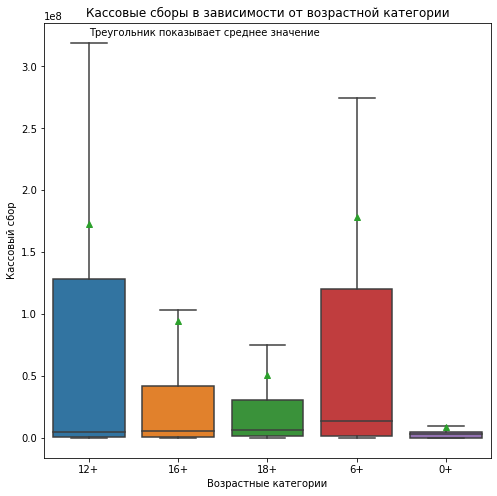

In [158]:
# Комментарий ревьюера 3
import seaborn as sns
temp = df[df.box_office > 0].copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['release_year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.25e8,'Треугольник показывает среднее значение')
plt.show()

**Проверим гипотезу о том, что в 2017 г вышло больше кассовых чем обычно**

In [159]:
# Найдем топ-20 самых кассовых фильмов для каждого года:
def top_n_values(group, n=20):
    return group.nlargest(n, 'box_office')

# Сгруппируем результаты в таблицу
top_20_by_year = df.groupby('release_year').apply(top_n_values).reset_index(drop=True)

In [160]:
# подсчитаем общие сборы 10 самых кассовых фильмов за каждый год
top_20_by_year = df.query('release_year > 2014').groupby('release_year').agg(
    total_sum = ('box_office', 'sum')).reset_index()

top_20_by_year

,release_year,total_sum
0,2015,34645673169.66
1,2016,50825522075.72
2,2017,48455994302.75
3,2018,49084632828.45
4,2019,48262278668.60


Гипотеза о том, что в 2017 году вышло больше кассовых фильмов чем в другие года не подвердилась. 
Мы видим что топ-10 фильмов собрали в прокате суммы сопоставимые с суммами в за 2016 и 2018 г.

Отсюда делаем вывод о том, что в 2017 г.:
1. количество вышедших блокбастеров сопоставимо с их количеством в 2016, 2018, 2019 гг.
2. общая сумма сборов наиболее кассовых фильмов также сопоставима со сборами в 2016, 2018, 2019 гг.
3. вышло меньшее количество фильмов, что сместило среднее и медиану к верхним значениям

 При этом общая сумма кассовых сборов за 2017 г. также находится на уровне 2016, 2018 гг. Это говорит нам о том, что снижение количества выпущенных фильмов не привело к значимому снижению спроса. Потребители продолжили посещать ходить в кино с той же периодичностью, выбирая фильм из меньшего количества предложений.

**Итоги:**

**Какую задачу решали:**
- исследовать основные тренды в киноиндустрии для фильмов российского и иностранного производства

**С какими трудностями столкнулись:**
- главной проблемой в процессе анализа стали некачественные данные о кассовых сборах фильмов. Эти данные заполнены не для всех строк и имеются ошибки ввода. Такие данные не позволяют делать достоверных выводов о финансовых результатах проектов. 

**Выводы**

1. В целом по рынку присутствует тренд на увеличение количества выпускаемых фильмов. Для фильмов российского производства этот тренд выражен менее ярко.

2. Доля фильмов, выходящих в кинотеатрах устойчиво росла до 2016гг. с 2017 наблюдается ее существенное снижение.  Сто связано с развитием онлайн-кинотеатров и стриминговых сервисов. Тенденция актуальна для всего рынка, в частности для российского сегмента.

3. Значимый объем данных о финансовых показателях мы имеем только с 2014 года. 2010 -2013 исключены из анализа кассовых сборов.

4. Общая сумма кассовых сборов мало меняется от года к году и находится в раоне 50 млрд. рублей. Т.е., с учетом инфляции, сумма кассовых сборов в реальном выражении снижается ежегодно.

5. Доля российских фильмов в общей сумме кассовых сборов стабильна (от 15 до 27%) и имеет медленную тенденцию к росту.

6. Анализ нетипичных данных за 2017 г. показал, что уменьшение количества выпускаемых фильмов не приводит к снижению спроса и падению выручки в кинотеатрах в рамках одного года.

7. На протяжении 2015 -2019 г.:
- наибольшее количество кассовых сборов получали фильмы с маркировкой 6+.
- стабильные медианные кассовые сборы фильмы с маркировкой 12+ и 16+.
- меньшие, но также стабильные сборы в категории 18+
- фильмы 0+ - категория с самой низкими медианными сборами




# **Российские фильмы, получившие гос.поддержку**

In [161]:
# Выведем количественные данные о фильмах, получивших господдержку
print()
print('Фильмы, получившие гос. поддержку:')
print('Получии возвратные инвестиции:', len(rus.loc[rus['refundable_support'] > 0]))
print('Получии невозвратные инвестиции:', len(rus.loc[rus['nonrefundable_support'] > 0]))
print('Данные о общем бюджете имеются для:', len(rus.loc[rus['budget'] > 0]))
print()


Фильмы, получившие гос. поддержку:
Получии возвратные инвестиции: 100
Получии невозвратные инвестиции: 306
Данные о общем бюджете имеются для: 314



**4 категории российских фильмов фильмов в выборке:**
- не получившие гос. поддержки
- фильмы с возвратными инвестициями
- фильмы с невозвратными инвестициями
- фильмы с возвратными и невозвратными инвестициями.
  
Сохраним каждую категорию в отдельную переменную.

In [162]:
# сохраним каждуюю категорию фильмов в отдельную переменные:

full_gov = rus.loc[(rus['refundable_support'] > 0) & (rus['nonrefundable_support'] > 0)]
ref_gov = rus.loc[(rus['refundable_support'] > 0) & (rus['nonrefundable_support'] <= 0)]
nonref_gov = rus.loc[(rus['refundable_support'] <= 0) & (rus['nonrefundable_support'] > 0)]
non_gov = rus.loc[(rus['refundable_support'] <= 0) & (rus['nonrefundable_support'] <= 0)]

# Создадим переменную, объединяющую все фильмы с гос.поддержкой
part_gov = rus.loc[(rus['refundable_support'] > 0) | (rus['nonrefundable_support'] > 0)]

In [163]:
len(nonref_gov)

214

In [164]:
# проверим, все ли значения учтены
print()
print('Длина исходного датафрейма:', len(rus))
print('Совокупная длина сегментированных датафреймов:', len(part_gov) + len(non_gov))
print()


Длина исходного датафрейма: 2336
Совокупная длина сегментированных датафреймов: 2336



**Сумма сборов для фильмов гос. поддержкой**

**Кассовые сборы для фильмов с гос.поддержкой и без нее**

In [165]:
# проанализируем кассовые сборы для фильмов с гос.участием и без него:
# 0 - без гос.поддержки
# 1 - с гос.поддержкой
rus.loc[rus['box_office'] > 0].groupby('gov_invest').agg(
    film_count = ('title', 'count'),
    box_median = ('box_office', 'median'),
    box_mean = ('box_office', 'mean'),
    total_sum = ('box_office', 'sum'))

,film_count,box_median,box_mean,total_sum
gov_invest,,,,
0,607,67500.00,17607023.17,10687463064.06
1,301,12748398.30,130703078.57,39341626650.05


In [166]:
dif = round(131559154.01 - 21511560.18)
dif_pers = round(131559154.01 / 21511560.18)
print(f'Фильмы с гос.поддержкой собирают на {dif} рублей больше.')
print(f'Что примерно в {dif_pers} раз больше, чем фильмы без гос.поддержки')
print()

Фильмы с гос.поддержкой собирают на 110047594 рублей больше.
Что примерно в 6 раз больше, чем фильмы без гос.поддержки



1. Анализируем медианные значения, т.к. информация о кассовых сборах содержит выбросы и некорректные значения.
2. Принимая во внимание, что информация о кассовых сборох является недостаточно точной и не позволяет сделать однозначных выводов, обнаружены следующие закономеррности:
- в среднем фильмы с гос.поддержкой собирают в прокате примерно 6 раз больше, чем фильмы без гос.поддержки. Что в абсолютных цифрах составляет 110 млн.руб.

**Кассовые сборы в зависимости от формы гос.поддержки**

In [167]:
# Расчитаем среднее и медианное значение для каждой категории фильмов:
# full_gov - Фильмы с возвратными и невозвратными гос. инвестициями
# ref_gov- Фильмы с возвратными гос. инвестициями
# nonref_gov - Фильмы с невозвратными гос. инвестициями
# non_gov - Фильмы без гос. инвестиций

data = {
    'full_gov': [round(full_gov.loc[full_gov["box_office"] > 0]["box_office"].mean()), 
                 round(full_gov.loc[full_gov["box_office"] > 0]["box_office"].median())],
    'ref_gov': [round(ref_gov.loc[ref_gov["box_office"] > 0]["box_office"].mean()), 
                round(ref_gov.loc[ref_gov["box_office"] > 0]["box_office"].median())],
    'nonref_gov': [round(nonref_gov.loc[nonref_gov["box_office"] > 0]["box_office"].mean()), 
                   round(nonref_gov.loc[nonref_gov["box_office"] > 0]["box_office"].median())],
    'non_gov': [round(non_gov.loc[non_gov["box_office"] > 0]["box_office"].mean()), 
                round(non_gov.loc[non_gov["box_office"] > 0]["box_office"].median())]
}

# создадим таблицу со средними и медианными значениями кассовых сборов по каждой категории
op = pd.DataFrame(data, index=['mean', 'median'])
op

,full_gov,ref_gov,nonref_gov,non_gov
mean,243754445,290688081,73437958,17607023
median,72578317,201850557,3382642,67500


In [168]:
# Средняя сумма возратных и невозратных инвестиций 
print()
print(f'Медианная сумма возвратных инвестиций: {round(df.loc[df["refundable_support"] > 0, "refundable_support"].median())}')
print(f'Медианная сумма невозвратных инвестиций: {round(df.loc[df["nonrefundable_support"] > 0, "nonrefundable_support"].median())}')
print()


Медианная сумма возвратных инвестиций: 25000000
Медианная сумма невозвратных инвестиций: 30000000



Т.к. box_office имеет выбросы и неккоректные значение, медианная сумма сборов по каждой категории фильмов будет более показательна.

1. Наибольшей медианной имеет категория фильмов, получивших невозратные и возратные инвестиции. 
2. Наименьшая медианная сумма кассовых сборов  в категории фильмов с невозратными инвестициями.
Такое распределение кассовых сборов кажется нетипичным: можно было предположить что сумма кассовых сборов зависит от бюджета фильма.
Следуя этой логике, фильмы с невозратными инвестициями должны были собирать большую кассу, чем фильмы с возратными -  т.к. сумма возратных инвестиций в целом выше чем сумма невозратных. Но это не подтверждается цифрами.

Исследуем, как зависят какссовые сборы от общего бюджета фильма.

**Кассовые сборы в зависимости от бюджета фильма**

In [169]:
# сохраним в отдельную переменную  строки с заполненными значениями бюджета и сборов фильма
box_by_budget = rus.query('budget > 0 & box_office > 0')
box_by_budget.sample(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
142,небесный верблюд,111000115,2015-01-14 12:00:00,художественный,"ооо продюсерский центр ""всё хорошо""",[россия],[ю.фетинг],и.плиско,0+,0.00,34000000.00,49280496.00,министерство культуры,6.70,"[детский, семейный]",61040.00,2015,ю.фетинг,детский,0.69,1,1
36,весури,111007619,2019-05-07 12:00:00,художественный,"ооо ""компания ""атк-студио""",[россия],"[а.якимчук, в.лагунов]",а.тютрюмов,12+,0.00,30000000.00,46153846.00,министерство культуры,NaN,[unknown],75850.00,2019,а.якимчук,unknown,0.65,1,1
153,о любви (2017),111018816,2016-12-28 12:00:00,художественный,"ооо ""студия ""2-б-2"" интертэйнмент""",[россия],[в.бортко],н.бортко,16+,20000000.00,35000000.00,70086439.00,"министерство культуры, фонд кино",NaN,[unknown],11332412.00,2016,в.бортко,unknown,0.78,1,1


In [170]:
len(box_by_budget)

301

In [171]:
#проверим, что для выбранных строк указан хотябы один вид гос.поддержки
len(box_by_budget.query('refundable_support <=0 & nonrefundable_support <=0'))

0

In [172]:
# оценим корреляцию между бюджетом картины и кассовыми сборами
round(rus['box_office'].corr(rus['budget']), 2)

0.44

Существует прямая корреляция между бюджетом фильма и кассовыми сборами. 
При этом данная взаимосвязь выражена выражена не очень сильно. Отразим ее графически

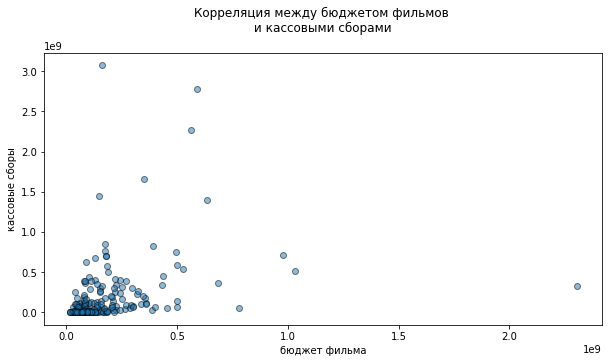

In [173]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(box_by_budget['budget'], box_by_budget['box_office'], alpha=0.5, edgecolors='black')
plt.xlabel('бюджет фильма')
plt.ylabel('кассовые сборы')
plt.title('Корреляция между бюджетом фильмов \n и кассовыми сборами \n')

plt.show()

**Вывод**

1. Для фильмов Российского производства существует прямая корреляция между бюджетом картины и ее кассовыми сборами.
2. Коффициент корееляции - 0,44. Это означает, что взаимосвязь есть, но она не сильно варажена. А для части работ эта коореляция не дествует:
на графике мы видим часть картин с экстремально высоким бюджетом и непропорционально маленькоми сборами. И наоборот: часть картин имеет относительно небольшие бюджеты при этом высокие кассовые сборы.

Выведем такие аномальные фильмы:

**Топ-20 | Фильмы с большим бюджетом и непропорционально низкими кассовыми сборами**

In [174]:
# Выведем фильмы, собравшие в прокате менее 750 млн. руб. 
high_b = box_by_budget.query('budget > 750000000 ')
high_b.loc[:, ['title', 'main_genre',	'main_director', 'budget', 'gov_part',	'box_office']].sort_values('box_office', ascending = False)

,title,main_genre,main_director,budget,gov_part,box_office
233,союз спасения,история,а.кравчук,980000000.00,0.51,717703185.53
128,матильда,фэнтези,а.учитель,1032905957.00,0.29,511775548.00
246,тайна печати дракона,приключения,о.степченко,2305074303.00,0.12,333597059.59
59,грех,драма,а.михалков (псевдоним а.кончаловский),779941965.00,0.08,54243202.71


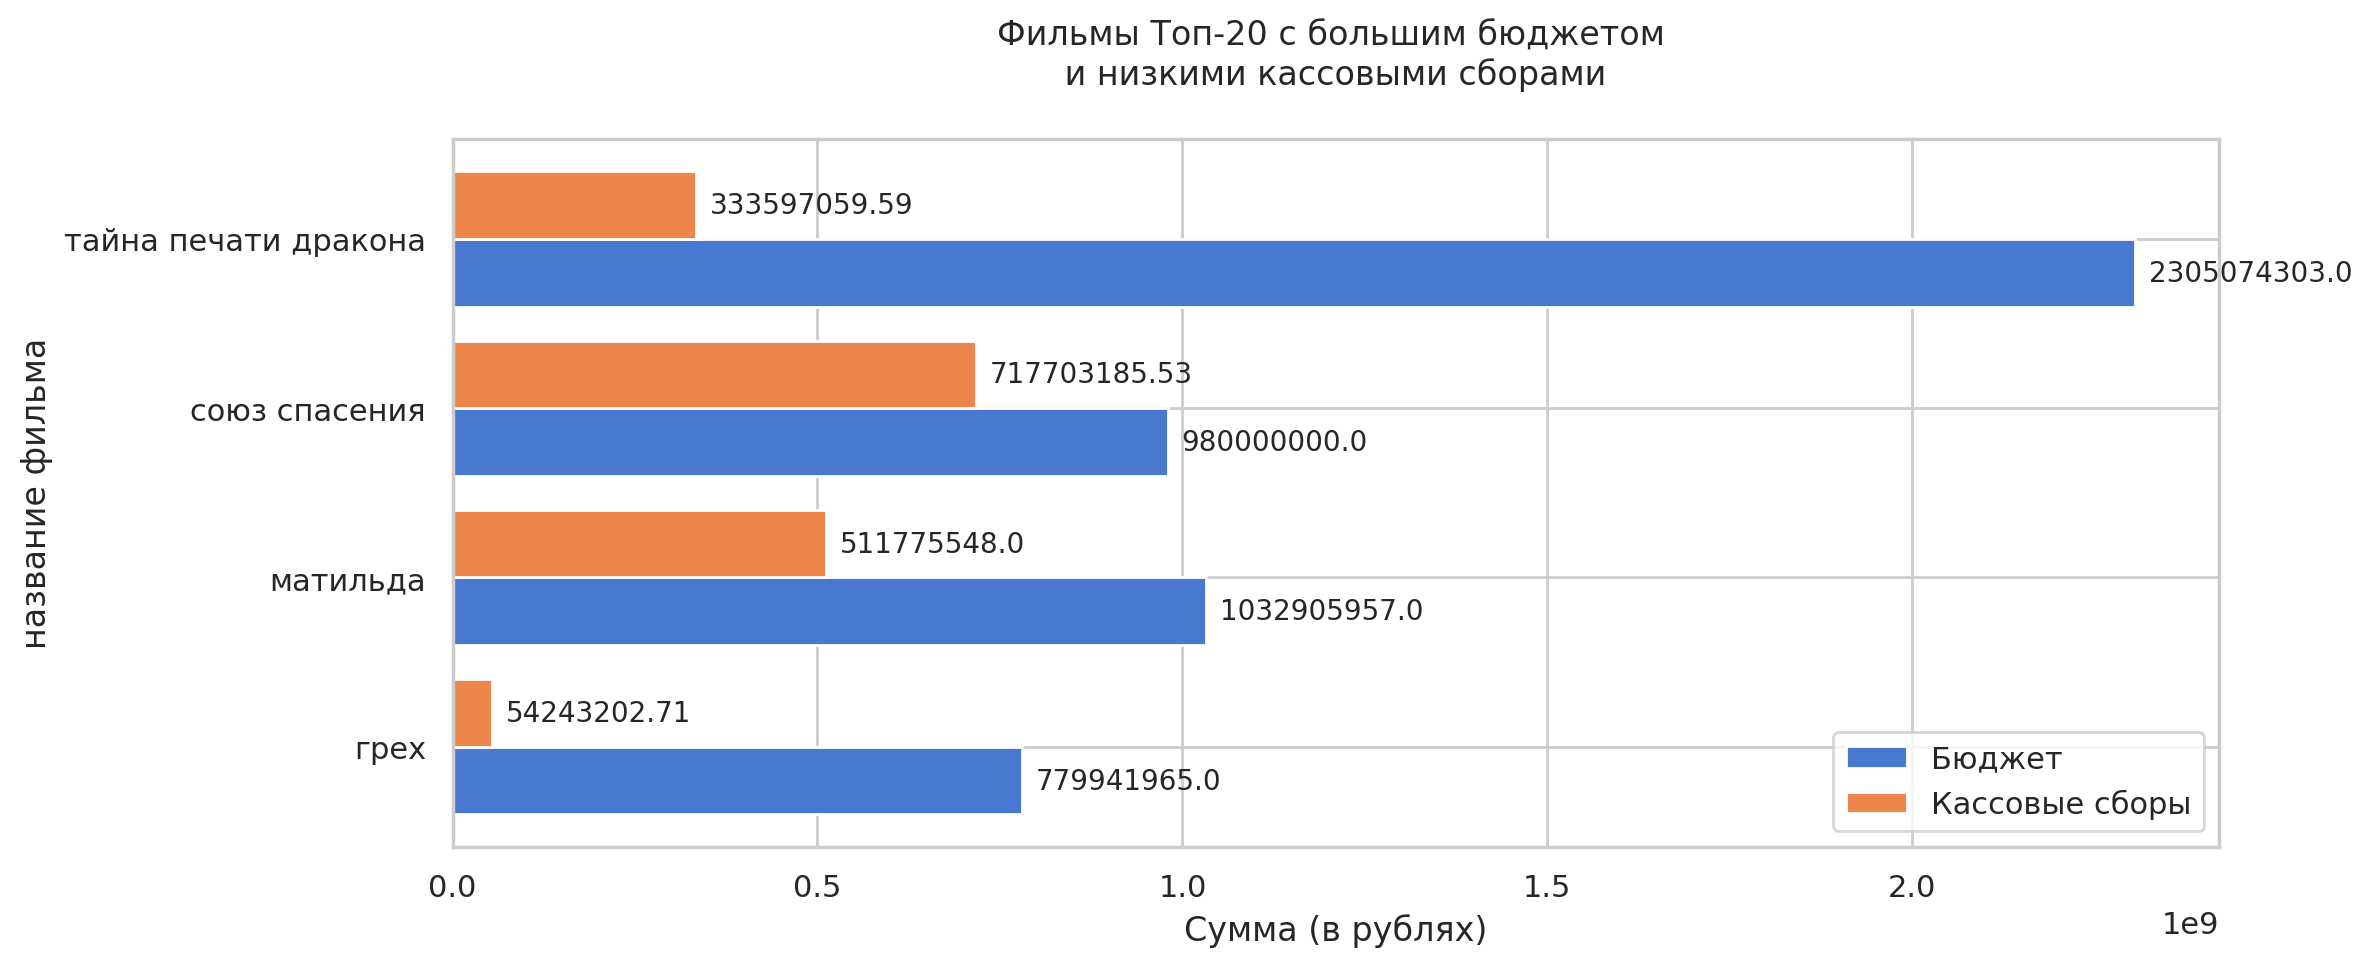

In [175]:
# Установим стиль seaborn для графика
sns.set(style="whitegrid")

# Данные для  графика
titles = high_b['title']
budgets = high_b['budget']
box_offices = high_b['box_office']

# Ширина столбцов
bar_width = 0.4

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(12, 5), dpi=200)

# диаграммы# диаграммы
y_pos = range(len(titles))

budget_color = sns.color_palette("muted")[0]  #  бюджет
box_office_color = sns.color_palette("muted")[1]  # кассовыe сборы

rects1 = ax.barh(y_pos, budgets, bar_width, label='Бюджет', color=budget_color)
rects2 = ax.barh([p + bar_width for p in y_pos], box_offices, bar_width, label='Кассовые сборы', color=box_office_color)

# Установка меток по оси y
ax.set_yticks([p + bar_width / 2 for p in y_pos])
ax.set_yticklabels(titles)

# Добавление подписей и заголовка
ax.set_xlabel('Сумма (в рублях)')
ax.set_ylabel('название фильма')
ax.set_title('Фильмы Топ-20 с большим бюджетом \n и низкими кассовыми сборами \n')

# Добавление легенды
ax.legend()

# Добавление значений к столбцам
def autolabel(rects):
    """Добавление подписей к столбцам."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(5, 0),  # отступ
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

**Топ-20 | Фильмы с небольшим бюджетом и непропорционально высокими кассовыми сборами**

In [176]:
# Выведем фильмы, собравшие в прокате более 1 млрд. руб. и бюджетом менее 750 млн
low_b = box_by_budget.query('budget < 750000000 & box_office > 1000000000')
low_b.loc[:, ['title', 'main_genre',	'main_director', 'budget', 'gov_part',	'box_office']].sort_values('box_office', ascending = False)

,title,main_genre,main_director,budget,gov_part,box_office
275,холоп,комедия,к.шипенко,160000000.00,0.38,3073568690.79
67,движение вверх,спорт,а.мегердичев,590192191.00,0.68,2779686144.00
245,т-34,драма,а.сидоров,563784717.00,0.32,2271754004.52
188,последний богатырь,комедия,д.дьяченко,352477575.00,0.28,1655037688.00
127,лёд,unknown,о.трофим,148585222.00,0.57,1445731797.89
287,экипаж .,драма,н.лебедев,635283867.00,0.70,1402255390.00


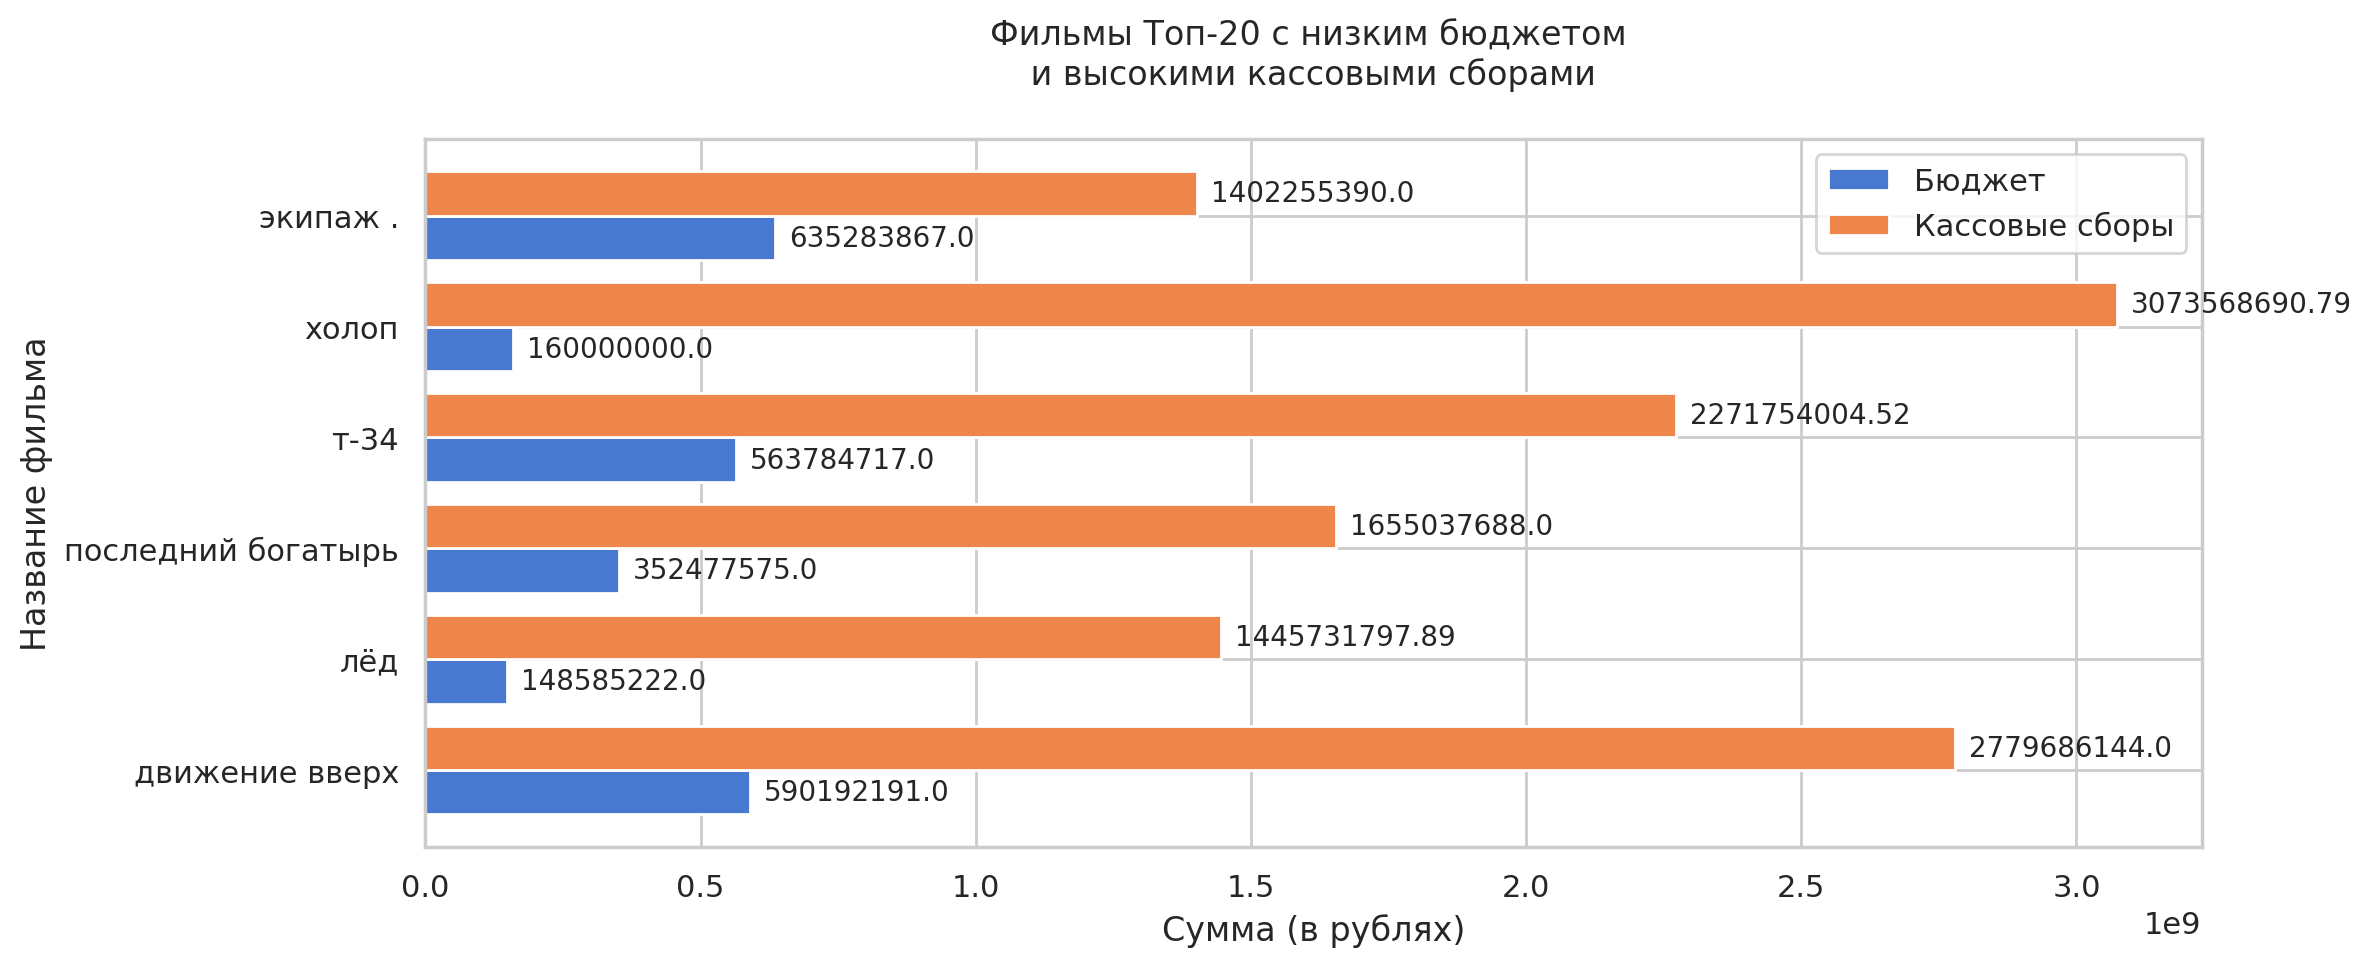

In [177]:
# Установим стиль seaborn для графика
sns.set(style="whitegrid")

# Данные для  графика
titles = low_b['title']
budgets = low_b['budget']
box_offices = low_b['box_office']

# Ширина столбцов
bar_width = 0.4

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(12, 5), dpi=200)

# диаграммы# диаграммы
y_pos = range(len(titles))

budget_color = sns.color_palette("muted")[0]  #  бюджет
box_office_color = sns.color_palette("muted")[1]  # кассовыe сборы

rects1 = ax.barh(y_pos, budgets, bar_width, label='Бюджет', color=budget_color)
rects2 = ax.barh([p + bar_width for p in y_pos], box_offices, bar_width, label='Кассовые сборы', color=box_office_color)

# Установка меток по оси y
ax.set_yticks([p + bar_width / 2 for p in y_pos])
ax.set_yticklabels(titles)

# Добавление подписей и заголовка
ax.set_xlabel('Сумма (в рублях)')
ax.set_ylabel('Название фильма')
ax.set_title('Фильмы Топ-20 с низким бюджетом \n и высокими кассовыми сборами \n')

# Добавление легенды
ax.legend()

# Добавление значений к столбцам
def autolabel(rects):
    """Добавление подписей к столбцам."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(5, 0),  # отступ
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом. Нет подписи оси Y.</font>

</font><font color='Blue'><b>Поправила</b></font><br>

## **Окупаемость топ-20 фильмов с наибольшими кассовыми сборами**

Выведем фильмы, российского производства, собравшие самые большие кассы. Проанализируем долю гос.участия в них.

In [178]:
top = rus.sort_values('box_office', ascending = False).head(20)
top[['title', 'main_genre',	'main_director', 'refundable_support', 'nonrefundable_support', 'budget', 'gov_part',	'box_office']]

,title,main_genre,main_director,refundable_support,nonrefundable_support,budget,gov_part,box_office
275,холоп,комедия,к.шипенко,25000000.00,35000000.00,160000000.00,0.38,3073568690.79
67,движение вверх,спорт,а.мегердичев,0.00,400000000.00,590192191.00,0.68,2779686144.00
245,т-34,драма,а.сидоров,60000000.00,120000000.00,563784717.00,0.32,2271754004.52
2183,полицейский с рублевки. новогодний беспредел,комедия,и.куликов,-999.00,-999.00,-999.00,-999.00,1682680039.03
188,последний богатырь,комедия,д.дьяченко,50000000.00,50000000.00,352477575.00,0.28,1655037688.00
127,лёд,unknown,о.трофим,25000000.00,60000000.00,148585222.00,0.57,1445731797.89
287,экипаж .,драма,н.лебедев,50000000.00,392104482.00,635283867.00,0.70,1402255390.00
2184,полицейский с рублевки. новогодний беспредел 2,комедия,и.куликов,-999.00,-999.00,-999.00,-999.00,1039706431.83
299,ёлки новые,комедия,д.киселев,50000000.00,50000000.00,174381922.00,0.57,855451052.00
258,тренер,драма,д.козловский,0.00,260000000.00,390191139.00,0.67,820528005.21


**Проанализируем окупаемость фильмов из топ-20, для которых достаточно данных**

In [179]:
# проанализируем окупаемость фильмов из топ-20
q = top.query('budget > 0') 
q['payback_%'] = round(top['budget'] / top['box_office'] * 100)
q[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'gov_part',	'box_office','payback_%']]

,title,refundable_support,nonrefundable_support,budget,gov_part,box_office,payback_%
275,холоп,25000000.00,35000000.00,160000000.00,0.38,3073568690.79,5.00
67,движение вверх,0.00,400000000.00,590192191.00,0.68,2779686144.00,21.00
245,т-34,60000000.00,120000000.00,563784717.00,0.32,2271754004.52,25.00
188,последний богатырь,50000000.00,50000000.00,352477575.00,0.28,1655037688.00,21.00
127,лёд,25000000.00,60000000.00,148585222.00,0.57,1445731797.89,10.00
287,экипаж .,50000000.00,392104482.00,635283867.00,0.70,1402255390.00,45.00
299,ёлки новые,50000000.00,50000000.00,174381922.00,0.57,855451052.00,20.00
258,тренер,0.00,260000000.00,390191139.00,0.67,820528005.21,48.00
260,три богатыря и принцесса египта,50000000.00,0.00,174464395.00,0.29,759226773.00,23.00
213,салют-7,0.00,225000000.00,493733957.00,0.46,752679777.00,66.00


In [180]:
# Выведем данные об общем бюджете, доле гос.участия и % окупаемости
print()
print('Средняя доля гос.поддержки в общем бюджете фильма:', round(q['gov_part'].mean(), 2))
print('Средний бюджет фильма:',round(q['budget'].mean()))
print('Средняя доходность в процентах:', round(q['payback_%'].mean()),'(разница между кассовыми сборами и бюджетом фильма)')
print()


Средняя доля гос.поддержки в общем бюджете фильма: 0.49
Средний бюджет фильма: 358571423
Средняя доходность в процентах: 40 (разница между кассовыми сборами и бюджетом фильма)



In [181]:
# Выведем количество фильмов с гос.участием а в топ-20 фильмов по кассовым сборам
print()
print('Кол-во фильмов c гос. поддержкой:', round(q['gov_invest'].count(), 2))
print('Кол-во фильмов с невозратными инвестициями:', round(q.query('nonrefundable_support > 0')['nonrefundable_support'].count(), 2))
print('Кол-во фильмов с возратными инвестициями:', round(q.query('refundable_support > 0')['refundable_support'].count(), 2))
print()


Кол-во фильмов c гос. поддержкой: 18
Кол-во фильмов с невозратными инвестициями: 16
Кол-во фильмов с возратными инвестициями: 13



Чтобы окончательно проверить гипотезу как объем бюджета влияет на кассовые сборы важно проанализировать фильмы, созданные без привлечения гос. ресурсов.
Проверим, достаточно ли данных для такого анализа:

In [182]:
# выведем фильмы без гос.участия и заполненным значением 'budget'
len(rus[(rus['gov_invest']==0) & (rus['budget'] > 0)])

0

Т.к. необходимых данных нет анализ взаимосвязи бюджета фильма и его кассовых сборов на полной выборке невозможен.

**Итог**

Из топ-20 самых кассовых российских фильмов:
- 17 фильмов созданы при государственной поддержке.
- 15 получили поддержку в качестве невозвратных инвестиций
- 12 проектов привлекли возратные госюинвестиции
- Средняя доля государственного участия составляет от 49%
- Средний бюджет наиболее успешных фильмов: 348 млн 
- Наиболее успешные в прокате фильмы в среднем собирают кассу на 37% больше своего бюджета

### **Зависимость кассовых сборов от возрастных огрнаичений фильмов российского производства**

**Сумма кассовых сборов с 2015 по 2019 г. по каждой категории возрастных ограничений** 

In [183]:
# Рассчитаем сколько всего принесла  каждая категория фильмов с 2015 по 2091 г.
rus_ar_sum = rus.query('release_year > 2014 & box_office > 0').groupby('age_restriction')\
    .agg(
        total_sum = ('box_office', 'sum'),
        row_count = ('age_restriction', 'count'),
    ).reset_index().sort_values('total_sum', ascending=False)

rus_ar_sum

,age_restriction,total_sum,row_count
1,12+,21027404884.67,164
4,6+,12887502914.74,90
2,16+,11897283751.66,205
3,18+,1981175724.68,70
0,0+,384670815.76,61


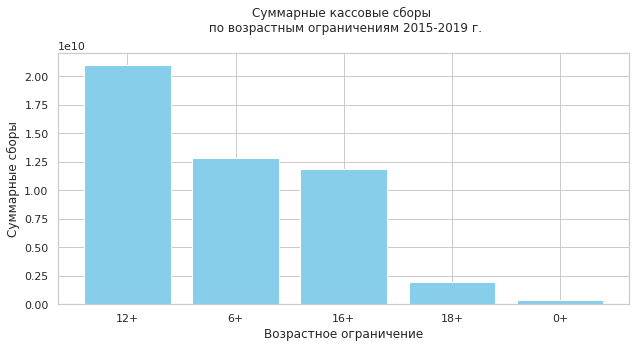

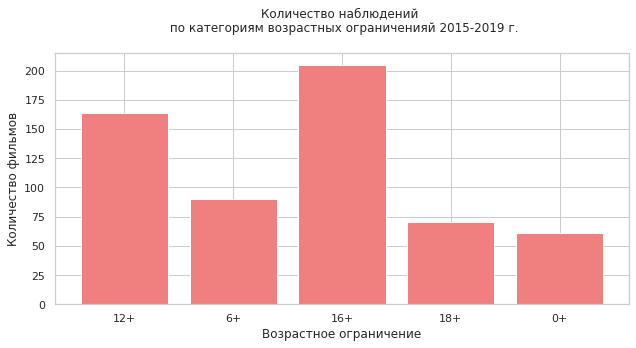

In [184]:
# отобразим данные графически
plt.figure(figsize=(9, 5))
plt.bar(rus_ar_sum['age_restriction'], rus_ar_sum['total_sum'], color='skyblue')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Суммарные сборы')
plt.title('Суммарные кассовые сборы \n по возрастным ограничениям 2015-2019 г.\n')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# отобразим данные графически количество наблюдений для каждой категории
plt.figure(figsize=(9, 5))
plt.bar(rus_ar_sum['age_restriction'], rus_ar_sum['row_count'], color='lightcoral')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Количество фильмов')
plt.title('Количество наблюдений \n по категориям возрастных ограниченияй 2015-2019 г.\n')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C 2015 по 2019 гг. суммарно больше всего денег в прокате собрали:
- категория 12 +. Представлена второй по величене выборкой - 167 фильмов
- примерно одинаковые суммы собрали категория 6+ и 16+ю При этом категория 16+ представлена наибольшим количеством фильмов, а значит один фильм этой категории в среднем собирает гораздо меньше кассы, чем фильм категории 6+
- категории 0+ и 18+ имеют наименьшие кассовые сборы. Что логично, т.к. фильмы имеют самую узкую целевую аудиторию

**Медианные и средние кассовые сборы с 2015 по 2019 г. по каждой категории возрастных ограничений** 

In [185]:
rus_ar_mean = rus.query('release_year > 2014 & box_office > 0')\
    .groupby('age_restriction')\
    .agg(
        box_median = ('box_office', 'median'),
        box_mean = ('box_office', 'mean'),
        row_count = ('age_restriction', 'count')
    ).sort_values('box_median',ascending = False).reset_index()
rus_ar_mean

,age_restriction,box_median,box_mean,row_count
0,6+,6527998.25,143194476.83,90
1,16+,4568857.30,58035530.50,205
2,12+,4166785.50,128215883.44,164
3,0+,3133221.41,6306078.95,61
4,18+,1982892.50,28302510.35,70


**Динамикa средних и медианных кассовых сборов в зависимости от возрастного ограничения фильмов**

Для фильмов российского производства

In [186]:
# сгруппируем датасет по году релиза и возрастному ограничению фильма 
rus_ar = rus.loc[rus['box_office'] > 0].groupby(['release_year', 'age_restriction']).agg(
     box_total = ('box_office', 'sum'),
     median_box = ('box_office', 'median'),
     mean_box = ('box_office', 'mean'),
     row_cownt = ('title', 'count')
).reset_index()

rus_ar = rus_ar.query('release_year > 2014').reset_index(drop=True)

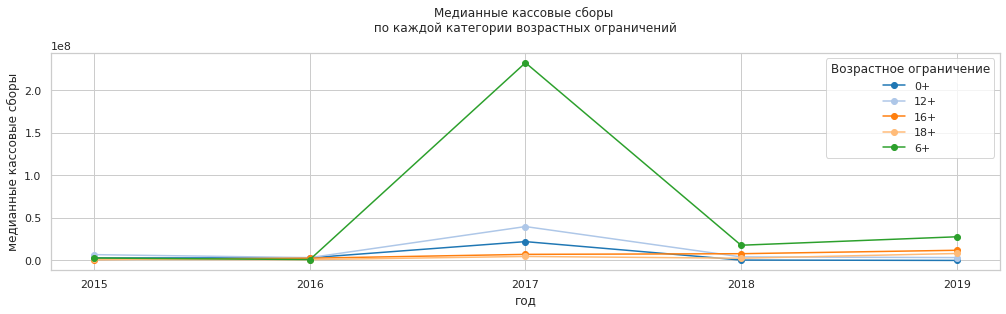

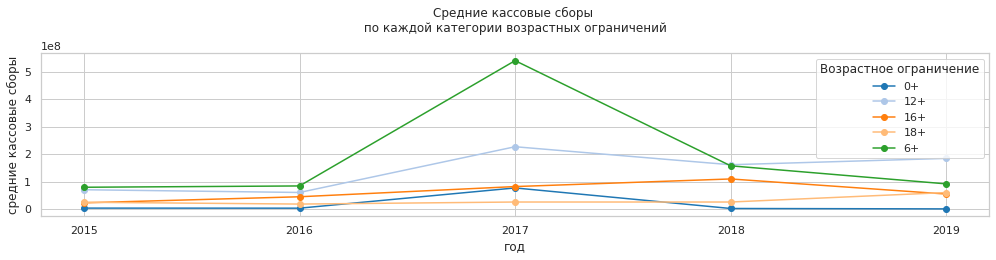

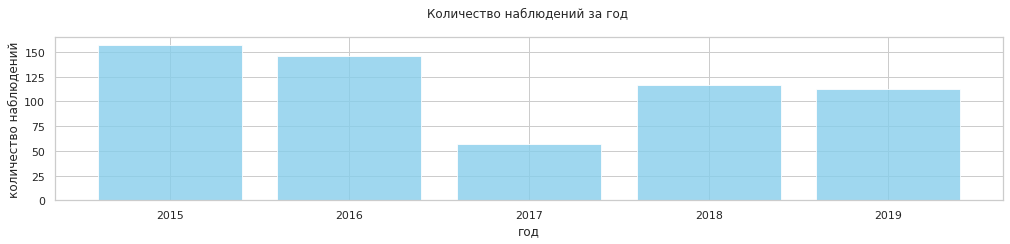

In [187]:
# Построение линейного графика для медианы
fig, ax = plt.subplots(figsize=(17,4))

age_restrictions = rus_ar['age_restriction'].unique()
colors = plt.cm.tab20.colors

for i, age in enumerate(age_restrictions):
    data = rus_ar[rus_ar['age_restriction'] == age]
    ax.plot(data['release_year'], data['median_box'], marker='o', label=age, color=colors[i % len(colors)])

ax.set_xlabel('год')
ax.set_ylabel('медианные кассовые сборы')
ax.set_title('Медианные кассовые сборы \n по каждой категории возрастных ограничений \n')
ax.legend(title='Возрастное ограничение')
plt.xticks(rus_ar['release_year'].unique())
plt.grid(True)
plt.show()


# Построение линейного графика для средних значений
fig, ax = plt.subplots(figsize=(17, 3))

age_restrictions = rus_ar['age_restriction'].unique()
colors = plt.cm.tab20.colors

for i, age in enumerate(age_restrictions):
    data = rus_ar[rus_ar['age_restriction'] == age]
    ax.plot(data['release_year'], data['mean_box'], marker='o', label=age, color=colors[i % len(colors)])

ax.set_xlabel('год')
ax.set_ylabel('средние кассовые сборы')
ax.set_title('Средние кассовые сборы \n по каждой категории возрастных ограничений \n')
ax.legend(title='Возрастное ограничение')
plt.xticks(ar['release_year'].unique())
plt.grid(True)


# График количества наблюдений за год
year = rus.loc[rus['box_office'] > 0].groupby('release_year').agg(
    row_count = ('title', 'count')).reset_index()
year = year.query('release_year > 2014')

fig, ax = plt.subplots(figsize=(17, 3))

ax.bar(year['release_year'], year['row_count'], color='skyblue', alpha=0.8)

ax.set_xlabel('год')
ax.set_ylabel('количество наблюдений')
ax.set_title('Количество наблюдений за год \n')

plt.xticks(year['release_year'])
plt.grid(True)

plt.show()

Т.к. данные о кассовых сборах имеют выбросы и некорректные значенияиспользуем для анализа мединанные значения. Данные о средних используем как дополнительный источник информации.

**Анализ медианных и средних кассовых сборов российских фильмов показал:**

- тренды для российских фильмов соответствуют трендам в целом по рынку
- на протяжении 2015 -2019 г. наибольшее количество кассовых сборов получали фильмы с маркировкой 6+ 
- категория 16+ представлена наибольшим количеством фильмов. Медианная сумма сборов стабильна от года к году. Медианные сборы за 2015-2019  находятся на 2 месте после фильмов 6+. 
- также стабильное высокое медианное значение имеет категория фильмов с маркировкой 12+ 
- меньшие, но также стабильные сборы у фильмов категории 18+
- фильмы 0+ - категория с самой низкой доходностью

Также мы видим, следующую аномалию:
В 2017 вышло наименьшее количество фильмов при этом, категории 0+, 6+, 12+ показывают пик медиан именно в этот год. Скорее всего это говорит о том, что в 2017 вышло больше блокбастеров, чем в другие году.  Также, ожидая большие премьеры,  кинокомпании могли отложить выпуск менее ожидаемых фильмов на периоды менее насыщенными предложениями.

## Проанализируем рейтинг фильмов с гос.поддержкой на Кинопоиск

Заменять пропуски синтетическими данными в параметре 'raitings' нецелесообразно т.к. это приведет к искажению выводов. 
Исключим строки с пропущенным значением 'raitings' из выборки.

In [188]:
rus_rait = rus.loc[rus['ratings'].notna()]
len(rus_rait)

1752

In [189]:
rus_rait.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,release_year,main_director,main_genre,gov_part,gov_invest,film_rent
0,12 месяцев. новая сказка,111014414,2014-10-16 12:00:00,художественный,"ооо ""киностудия ""никола-фильм"", ооо ""инвестмент бизнес консалтинг"", ооо ""пролайн-медиа""",[россия],[д.елеонский],и.каленов,0+,15000000.00,5000000.00,90120000.00,фонд кино,3.80,"[семейный, фэнтези]",32244810.00,2014,д.елеонский,семейный,0.22,1,1
1,28 панфиловцев,111000916,2016-01-27 12:00:00,художественный,индивидуальный предприниматель шальопа а.г.,[россия],"[к.дружинин, а.шальопа]",а.шальопа,12+,0.00,30000000.00,85384000.00,министерство культуры,7.50,"[военный, драма, история]",363622804.90,2016,к.дружинин,военный,0.35,1,1
2,30 свиданий,111020815,2015-12-10 12:00:00,художественный,"ооо ""инспирейшн филмс""",[россия],[т.игуменцева],"д.литвинов, д.осмеркин, а.гавриш, а.агеев",16+,5000000.00,20000000.00,48661150.00,фонд кино,5.30,"[комедия, мелодрама]",85405423.61,2015,т.игуменцева,комедия,0.51,1,1


**Зависимость рейтинга от бюджета фильма**

In [190]:
# Сохраним в отдельную переменную строки, с заполненным значением budget
raing_by_budg = rus_rait.loc[rus_rait['budget'] > 0]

# определим количество строк, на основании которых  проводится анализ
len(raing_by_budg)

299

In [191]:
# рассчитаем коффициент корреляции между параметрами
round(raing_by_budg['ratings'].corr(raing_by_budg['budget']))

0

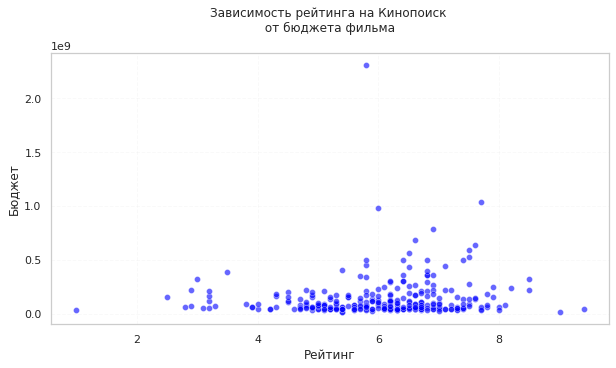

In [192]:
# построим диаграмму зависимости признаков
plt.figure(figsize=(10, 5))
plt.scatter(raing_by_budg['ratings'], raing_by_budg['budget'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Зависимость рейтинга на Кинопоиск \n от бюджета фильма \n')
plt.xlabel('Рейтинг')
plt.ylabel('Бюджет')
plt.grid(True, linestyle='--', alpha=0.1)
plt.show()

- Анализ проводилася на маленькой выборке - 297 строк, в виду отсутствия необходимых данных в других данных.
- Маленький объем выборки не позволяет делать однозначных выводов, которые можно экстраполировать на весь российский кинобизнес.

**Анализ показал:**

1. Коффициент корреляции 0 говорит о том, что взаимосвязь между бюджетом фильма и его рейтингом на кинопоиске отсутствует. 
Это подверждается харрактером распределения данных на графике.
Т.к. между размером бюджета фильма и его кассовыми сборами корреляции не выявлено, делаем вывод, что источник форма гос. финансирования также не оказывает значимого влияния на рейтинг фильма. 

**Зависимость рейтинга от формы финансирования**
Проверим вывод о том, что рейтинг фильма не зависит от типа гос.инвестиций.

In [193]:
# Выведем средний рейтинг фильмов с возратными гос.инвестициями
print()
print('Средний рейтинг фильмов с возратными гос.инвестициями:', round(rus[rus['refundable_support'] > 0]['ratings'].mean()))
print(len(rus[rus['refundable_support'] > 0]),'- количество наблюдений, по которым посчитан показатель')
print()


Средний рейтинг фильмов с возратными гос.инвестициями: 6
100 - количество наблюдений, по которым посчитан показатель



In [194]:
# Выведем средний рейтинг фильмов с невозратными гос.инвестициями
print()
print('Средний рейтинг фильмов с невозратными гос.инвестициями:', round(rus[rus['nonrefundable_support'] > 0]['ratings'].mean()))
print(len(rus[rus['nonrefundable_support'] > 0]),'- количество наблюдений, по которым посчитан показатель')
print()


Средний рейтинг фильмов с невозратными гос.инвестициями: 6
306 - количество наблюдений, по которым посчитан показатель



In [195]:
# Выведем средний рейтинг фильмов, для которых привлекались оба вида гос.поддержки
print()
print('Средний рейтинг фильмов с обоими видами гос.инвестиций:', round(full_gov['ratings'].mean()))
print(len(full_gov),'- количество наблюдений, по которым посчитан показатель')
print()


Средний рейтинг фильмов с обоими видами гос.инвестиций: 6
92 - количество наблюдений, по которым посчитан показатель



**Зависимость рейтинга от года релиза**

In [196]:
# Сгруппируем фильмы по году релиза и расчитаем среднюю  оценку
rus_rait.groupby('release_year').agg(
    rait_mean = ('ratings', 'mean'),
    row_count = ('ratings', 'count')
)

,rait_mean,row_count
release_year,,
2010,6.16,164
2011,5.96,103
2012,6.08,71
2013,6.61,144
2014,6.66,280
2015,6.23,204
2016,6.23,172
2017,6.25,121
2018,6.40,279


Динамики в изменении среднего рейтинга фильмов российского производства  от года к году не наблюдается. Т.е. популярность фильмов оставалась на одном уровне с 2010 по 2019 г.

**Зависимость рейтинга от типа и основного жанра фильма**

Проанализируем какие фильмы пользуются наибольшим спросом у зрителя

In [197]:
# Сгруппируем фильмы по жанру и расчитаем среднюю  оценку
rait_type = rus_rait.groupby('type').agg(
    rait_mean = ('ratings', 'mean'),
    row_count = ('ratings', 'count')
).sort_values('rait_mean', ascending = False)\
.iloc[1:] # Удалим строку 'прочие' как малочисленную и неинформативную
rait_type

,rait_mean,row_count
type,,
научно-популярный,6.97,28
документальный,6.85,108
художественный,6.35,1491
анимационный,5.85,115


- Все типы фильмов имеют рейтинг в диапазоне от 6 до 7 баллов на Кинопоиске.
- Самая высокая средняя оценка у научно-популярных фильмов. Однако, это на говорит нам о том, что эта категория фильмов наиболее популярна, т.к.:
1. Количество фильмов по этой категории крайне мало - в 50 раз меньше, чем в категории "художественный фильм"
2. Необходимо учитывать особенности целевой аудитории. Зрители, выбирающие научно-популярные фильмы  - малочисленная категория, с нетипичными предпочтениями.

Таким образом, анализируюя рейтинг по типам фильмов, мы не можем сделать однозначных выводов о том, что  какая-то категория фильмов заметно популярнее других. 
Проанализируем рейтинг фильма в зависимости от основного жанра.

In [198]:
# Сгруппируем фильмы по жанру и расчитаем среднюю  оценку
# Удалим категории в которых представлены менее 20 фильмов как малочисленные и неинформативные
rait_genre = rus_rait.groupby('main_genre').agg(
    rait_mean = ('ratings', 'mean'),
    row_count = ('ratings', 'count')
).sort_values('rait_mean', ascending = False).query('row_count > 20')
rait_genre

,rait_mean,row_count
main_genre,,
документальный,7.10,43
мюзикл,7.08,23
драма,6.73,568
военный,6.68,33
детектив,6.43,25
триллер,6.40,100
фантастика,6.39,57
боевик,6.37,93
мелодрама,6.35,133


В фильмы с наивысшими оценками попали такие жанры как "документальный", "мюзикл", "военный", "детектив". Эти категории представленные небольшим количеством фильмов.
Проанализируем, какие фильмы наиболее популярны среди "массовых категорий"

In [199]:
rait_genre.query('row_count > 90')

,rait_mean,row_count
main_genre,,
драма,6.73,568
триллер,6.40,100
боевик,6.37,93
мелодрама,6.35,133
мультфильм,5.91,112
комедия,5.77,290


- Таким образом, наибольшее количество пользователей Кинопоиск ставят высокие оценки фильмам в жанре "драма", "триллер", "боевик"
- Стоит учитывать, что в анализе использованы данные, полученные после просмотра фильма пользователем. При этом, для выявления пользовтельских предпочтений было бы полезно провести анализ спроса - например, анализ поиковых запросов на Кинопоиске. 

**Зависимость рейтинга от  студия-производителя**

In [200]:
# Сгруппируем фильмы по жанру и расчитаем среднюю  оценку
rait_studio = rus_rait.groupby('film_studio').agg(
    rait_mean = ('ratings', 'mean'),
    row_count = ('ratings', 'count'),
    genre = ('main_genre','first')
).sort_values('rait_mean', ascending = False)

In [201]:
#Выведем студии, снявшие фильмы с максимальным рейтингом:
rait_studio.query('rait_mean > 9').reset_index()

,film_studio,rait_mean,row_count,genre
0,"нп ""студия игрового кино ""лик""",9.90,1,триллер
1,"ооо ""компания питон""",9.90,1,аниме
2,"ооо ""бестмедиа""",9.80,1,фэнтези
3,ип вайсман анатолий александрович,9.80,1,фантастика
4,"ооо студия ""анимаккорд"", анимаккорд лтд.",9.70,1,мультфильм
5,"ооо ""юнайтед мультимедиа проджектс""",9.70,1,приключения
6,"зао ""киностудия ""м""-фильм""",9.10,1,драма
7,"ооо кинокомпания ""вектор""",9.10,1,драма


Студии снявшие фильмы с наивысшими оценками представлены только одним фильмом.
Найдем студии стабильно снимающие успешные фильмы. Такие студии можно использовать в будущем в качестве подрядчика или как объект инвестиций.

In [202]:
best_studio = rait_studio.query('row_count > 3').sort_values('row_count', ascending = False).iloc[:30]

In [203]:
#отберем студии с количеством фильмов больше 3 и  наибольшим рейтингом
best_studio.sort_values('rait_mean', ascending = False).iloc[:15].reset_index()

,film_studio,rait_mean,row_count,genre
0,"ооо ""триикс медиа""",7.42,4,драма
1,"ооо ""продюсерский центр ералаш""",7.20,10,детский
2,"киностудия ""мосфильм""",7.13,333,драма
3,свердловская киностудия,6.86,10,драма
4,"фгуп ""тпо ""киностудия ""союзмультфильм""",6.83,6,мультфильм
5,"ооо ""ералаш""",6.82,5,детский
6,"ооо ""мармот-фильм""",6.72,9,драма
7,"оао ""тпо ""санкт-петербургская студия документальных фильмов""",6.68,5,приключения
8,"ооо ""хайпфилм""",6.60,5,криминал
9,"ооо ""студия анимационного кино ""мельница""",6.59,13,мультфильм


**Зависимость рейтинга от главного режжисера фильма**

In [204]:
# т.к. в выборке присутствуют много фильмов советского производства, выведем страну производства.
rait_director = rus_rait.groupby('main_director').agg(
    rait_mean = ('ratings', 'mean'),
    row_count = ('ratings', 'count'),
    genre = ('main_genre','first'),
    country = ('production_country', 'first'),
    last_film = ('release_year', 'max')
).sort_values('rait_mean', ascending = False)
rait_director

,rait_mean,row_count,genre,country,last_film
main_director,,,,,
т.мирошник,9.90,1,криминал,[россия],2019
е.шиляева,9.90,1,триллер,[россия],2013
а.сазонов,9.80,1,фантастика,[россия],2019
и.ромащенко,9.70,1,приключения,[россия],2010
д.шабаев,9.40,1,драма,[россия],2018
...,...,...,...,...,...
е.соломина,1.40,1,фэнтези,[россия],2011
а.адилханян,1.30,1,мультфильм,[россия],2011
фарид гумбатов,1.10,1,комедия,"[азербайджан, россия]",2013


Режисеры, снявшие фильмы с наиболее высоким рейтингом, представлены одним фильмом.  Выведем их в отдельную таблицу. 
Их можно рассматривать как молодых профессионалов с высоким потенциалом.

**Топ-10 режжисеров, чьи фильмы получили наибольшую оценку на Кинопоиск**

In [205]:
rait_director.query('rait_mean > 8.9').sort_values('rait_mean', ascending = False).head(10)

,rait_mean,row_count,genre,country,last_film
main_director,,,,,
т.мирошник,9.90,1,криминал,[россия],2019
е.шиляева,9.90,1,триллер,[россия],2013
а.сазонов,9.80,1,фантастика,[россия],2019
и.ромащенко,9.70,1,приключения,[россия],2010
д.шабаев,9.40,1,драма,[россия],2018
м.косырев-нестеров,9.10,1,драма,[россия],2015
н.иванова,9.10,1,драма,[россия],2018
р.глурджидзе,9.10,1,драма,"[россия, грузия, хорватия, испания]",2016
н.степанова при участии с.иванова,9.00,1,драма,[россия],2015


**Режиссеры, снявшие 2 и более фильма со средней оценкой выше 7.5.**

In [206]:
# Исключим советских режисеров из выборки
rait_modern_dir = rait_director[rait_director['country'].apply(lambda x: 'россия' in x)]
# Отфильтруем режжисеров, снявших 2 и более фильма со средней оценкой выше 7.5
rait_modern_dir.query('rait_mean > 7.5 & row_count > 1')


,rait_mean,row_count,genre,country,last_film
main_director,,,,,
м.мошкова,9.00,2,мультфильм,[россия],2018
д.червяцов,8.50,3,мультфильм,"[россия, республика кипр]",2016
а.попова,8.00,2,семейный,[россия],2019
а.учитель,8.00,3,фэнтези,[россия],2017
а.гутман,7.95,2,мюзикл,[россия],2010
н.лебедев,7.80,2,драма,[россия],2016
с.лобан,7.67,3,комедия,[россия],2011
п.мирзоев,7.60,2,комедия,[россия],2019
и.блохина,7.60,2,боевик,[россия],2018


**Советские фильмы с высокими баллами на Кинопоиск**

- Выведем советские фильмы, получившие высокие оценки. 
- Сравним среднюю оценку советских фильмов со средней оценкой современных фильмов.
Эта информация будет полезна при принятии решения о "реновации" советских фильмов

In [207]:
rait_sovet_dir = rait_director[rait_director['country'].apply(lambda x: 'ссср' in x)].sort_values('rait_mean', ascending = False)
rait_sovet_dir.head(10)

,rait_mean,row_count,genre,country,last_film
main_director,,,,,
э.савельева,8.20,1,мелодрама,[ссср],2014
е.карелов,8.20,2,драма,[ссср],2017
и.фрэз,8.20,1,драма,[ссср],2019
а.тарковский,8.20,1,драма,[ссср],2014
в.шукшин,8.10,1,драма,[ссср],2013
семен туманов,8.10,1,драма,[ссср],2013
с.ростоцкий,8.10,1,мелодрама,[ссср],2019
н.орлов,8.00,1,приключения,[ссср],2016
т.вульфович,8.00,1,боевик,[ссср],2015


In [208]:
print()
print('Советские фильмы:')
print('средний рейтинг:', round(rus[rus['production_country'].apply(lambda x: 'ссср' in x)]['ratings'].mean()))
print('количество фильмов в выборке:', len(rus[rus['production_country'].apply(lambda x: 'ссср' in x)]))
print()
print('Российские фильмы:')
print('средний рейтинг:', round(rus[rus['production_country'].apply(lambda x: 'россия' in x)]['ratings'].mean()))
print('количество фильмов в выборке:', len(rus[rus['production_country'].apply(lambda x: 'россия' in x)]))


Советские фильмы:
средний рейтинг: 7
количество фильмов в выборке: 405

Российские фильмы:
средний рейтинг: 6
количество фильмов в выборке: 1934


Таким образом:
- Советские фильмы имеют более высокий средний балл на Кинопоиск, чем фильмы российского производства.
- При этом выборка советских фильмов пости в 5 раз меньше. Скорее всего на кинопоиске добавлены не все советские фильмы, а только наиболее популярные, "проверенные временем".
Т.е. "обновление" советской классики кинематографа востребовано среди пользователей.

**Итоги:**

**Какую задачу решали:**
- проанализировать, насколько востребованы фильмы и коммерчески успешны, получившие гос.поддержку

**С какими трудностями столкнулись:**
- главной проблемой в процессе анализа стало большое количество пропусков в колонках ratings, budget, box_office. В результате анализ проводился на крайне ограниченной выборке. Результаты такого анализа не могут быть признаны однозначно достоверными для всей выборки.

**Выводы**

1. В среднем фильмы с гос.поддержкой собирают в прокате примерно 6 раз больше, чем фильмы без гос.поддержки. 

2. Наибольшие медианные кассовые сборы имеет категория фильмов, получивших невозвратные и возвратные инвестиции. Наименьшие - у фильмов с невозвратными инвестициями. 

3. Из топ-20 самых кассовых российских фильмов:
- 17 фильмов созданы при государственной поддержке.
- 15 получили поддержку в качестве невозвратных инвестиций
- 12 проектов привлекли возратные госюинвестиции
- Средняя доля государственного участия составляет от 49%
- Средний бюджет наиболее успешных фильмов: 348 млн 
- Наиболее успешные в прокате фильмы в среднем собирают кассу на 37% больше своего бюджета

4. Для фильмов Российского производства существует прямая корреляция между бюджетом картины и ее кассовыми сборами. Коффициент корееляции - 0,44. Это означает, что взаимосвязь есть, но она не сильно варажена.

5. Часть картин с гос.поддержкой имеет экстремально высокие бюджеты и непропорционально низкие кассовые сборами. И наоборот: часть картин имеет относительно небольшие бюджеты при этом высокие кассовые сборы.

6. Корреляция между бюджетом фильма и его рейтингом на Кинопоиск отсутствует. Источник форма гос. финансирования также не оказывает значимого влияния на рейтинг фильма.

7. Наибольшее количество пользователей Кинопоиск ставят высокие оценки фильмам в жанре "драма", "триллер", "боевик"

8. Советские фильмы имеют более высокий средний балл на Кинопоиск, чем фильмы российского производства. Т.е. "обновление" советской классики кинематографа может быть одним из направлений развития киноиндустрии.



## Выводы:

**Какие задачи решали:**
1. Изучить рынок российского кинопроката и выявить текущие тренды
2. 
Проанализировать, насколько востребованы фильмы, получившие гос.поддержку

**1. Предобработка данных**
- Данные были получены из двух датасетов: mkrf_movies и mkrf_shows, которые были объединены в 1 по номеру прокатного удостовения.
- Обработаны пропуски в данных. 
- Количественные параметры оставлены с пропусками или заполнены заглушками. Заполнение пропусков синтетическими данными не применялось, т.к. это привело бы к существенному искажению результатов исследования.
- Одним из наиболее важных параметров в разрезе цели осследования является парметр кассовых сборов (box_office). При этом, данные имеются только для половины датасета. В части строк, где данные заполнены наблюдаются некооректные значения, связанные с ошибками ввода.
- Таким образом, все выводы, касающиеся кассовых сборов фильмов нельзя считать абсолютно достоверными и экстраполировать их на весь кинорынок.
- В датасете выявлены и удалены неяные дубликаты. Их наличие связано с тем, что один фильм может иметь несколько прокатных удостоверений. Итоговая длинна датасета на на котором проводился анализ составила 6772 строки.

**2. Результаты анализа**

**Общее количество фильмов:**

**Общее количество фильмов в целом по рынку с 2010 по 2019 гг.**

- Наблюдается тренд на возрастание количества выпускаемых фильмов, несмотря на значительные колебания от года к году.
- 
Аномально низкое количество фильмов было выпущено в 2017 году. Подобные колебания могут быть обусловлены экономической ситуацией, занятостью компаний крупными проектами".

**Доля фильмов, трансирующихся в кинотеатрах в целом по рынку с 2010 по 2019 гг.**

Доля фильмов, транслирующихся в кинотеатрах:
- росла начиная с 2010г. по 2016 г.: с 12% до 74% к общему количеству фильмов
- в 2017 г. наблюдается замедление темпов роста - 79%
- в 2018-2019 г. наблюдается снижение доли филимов транслирующихся в кинотеатрах до 54-58%
  
 Вероятно, такая динамика связана с развитием онлайн-кинотеатров и возможности смотреть фильмы "по подписке".

**Общее количество российских фильмов с 2010 по 2019 гг.**

- В российском сегменте тренд на рост общего количества присутствует, хотя и менее выраженный чем по рынку в целом.
- В российской киноиндустрии 2017 г такженаблюдаетсят нетипично низкое количество выпущенных фильмов, а в следующем -2018 г. наблюдаем рекордное количество выпущенных фильмов. Вероятно часть  релизов, запланированных на 2017 состоялась в 2018 г.

**Доля российских фильмов вышедших в прокат с 2010 по 2019 гг.:**

- Среди российских фильмов, доля выпущенных в кинотеатрах устойчиво росла с 2010 по 2016 г. (с 20% до 64%).
- С 2017 г мы видим видим существенное снижение доли фильмов, прокатывающихся в кинотеатрах. Причиной является общемировой тренд на развитие онлайн- кинотеатров и стриминнговых сервисов.

**Таким образом:**
- Наблюдается общий тренд на увеличение числа выпускаемых фильмов.
- При этом количество фильмов, транслируемых в кинотеатрах постепенно снижается, за счет развития онлайн сервисов

--------------------

**Кассовые сборы**

**Кассовые сборы в 2015 по 2019 гг.:**

- Значимый объем данных о кассовых сборах мы имеем только с 2015 года. 2010 -2014  исключены из анализа. 
- Общая сумма кассовых сборов мало меняется от года к году и находится в раоне 50 млрд. рублей. Т.е., с учетом инфляции, сумма кассовых сборов в реальном выражении снижается ежегодно. 
- Доля российских фильмов в общей сумме кассовых сборов стабильна (от 15 до 27%) и имеет медленнeнную тенденцию к росту.

**Какссовые сборы в зависимости от возрастных ограничений фильмов по всему рынку**

- на протяжении 2015 -2019 г. наибольшее количество кассовых сборов получали фильмы с маркировкой 6+.
- стабильные медианные кассовые сборы фильмы с маркировкой 12+ и 16+.
- меньшие, но также стабильные сборы в категории 18+
- фильмы 0+ - категория с самыми низкими медианными сборами

**Сборы российских фильмов в  зависимости от возрастных ограничений за 2015-2019 гг.**

C 2015 по 2019 гг. суммарно больше всего денег в прокате собрали:
- категория 12 +. Представлена второй по величене выборкой - 167 фильмов
- примерно одинаковые суммы собрали категория 6+ и 16+. При этом категория 16+ представлена наибольшим количеством фильмов, а значит один фильм этой категории в среднем собирает гораздо меньше кассы, чем фильм категории 6+
- категории 0+ и 18+ имеют наименьшие кассовые сборы. Что логично, т.к. фильмы имеют самую узкую целевую аудиторию

--------------------

**Фильмы, получившие государственную поддержку.**

- Средняя сумма возвратных инвестиций: 35486486
- 
Средняя сумма невозвратных инвестиций: 5034578
- Средняя доля гос.средств в общем бюджете фильма: 49 %


- Для фильмов Российского производства существует прямая корреляция между бюджетом картины и ее кассовыми сборами.
- 
Коффициент корееляции - 0,44, т.е. взаимосвязь есть, но она не сильно варажена. Кроме того, в выборке представлена часть работ с экстремально высоким бюджетом и непропорционально маленькоми сборами. И наоборот: часть картин имеет относительно небольшие бюджеты при этом высокие кассовые сборы.

**Доля фильмов с гос.инвестициями в топ-20 самых кассовых фильмов за 2015-2019 гг.**

Из топ-20 самых кассовых российских фильмов:
- 17 фильмов созданы при государственной поддержке.
- 15 получили поддержку в качестве невозвратных инвестиций
- 12 проектов привлекли возратные госюинвестиции
- Средняя доля государственного участия составляет от 49%
- Средний бюджет наиболее успешных фильмов: 348 млн 
- Наиболее успешные в прокате фильмы в среднем собирают кассу на 37% больше своего бюджета

--------------------

**Рейтинг фильмов российского производства**

- Коффициент корреляции 0 говорит о том, что взаимосвязь между бюджетом фильма и его рейтингом на кинопоиске отсутствует. Источник форма гос. финансирования также не оказывает значимого влияния на рейтинг фильма.
- Средний рейтинг фильмов не зависит от года релиза.
- Наибольшее количество пользователей Кинопоиск ставят высокие оценки фильмам в жанре "драма"". Далее идут идут "триллер" и "боевик"
- Советские фильмы имеют более высокий средний балл на Кинопоиск, чем фильмы российского производства.
При этом выборка советских фильмов пости в 5 раз меньше..

**3. Рекомендации заказчику**

1. Необходимо  оганизовать корректный сбор и внесение данных о кассовых сборах фильмов. Т.к. без этих данных невозможен полноценный анализ финансовых показателей проектов.
Важно стандартизировать данные о кассовых сборах -  необходимо вносить либо в рублях/ в тычсячах рублей / миллионах рублей. В противном случае корректная автоматическая обработка данных не возможна.

2. Аналогичным образом следует вносить данные о бюджете фильма, чтобы оценить коммерческую успешность той или иной категории фильмов.

3. В исследовании представлены:
- топ-10 российских режиссеров с самыми высокими оценками на Кинопоиск
- топ-10 российских режиссеров с стабильно высокими оценками на Кинопоиск (больше 2 работ с средней оценкой > 7.5)
- топ-10 российских кинокомпаний с самыми высокими оценками на Кинопоиск
- топ-10 российских кинокомпаний с стабильно высокими оценками на Кинопоиск (больше 2 работ с средней оценкой > 7.5)
Также имеются данные о фильмах, студиях и режиссерах, имеющих большие бюджет и непропорционально низкие сборы.

Эти данные могут использованы для принятия решения о будущих рецепиентах гос.финансирования.

4. Одним из направлений в развитии киноиндустрии может быть обновление и релиз популярных советских фильмов, т.к. их средний рейтинг выше, чем рейтинг фильмов российского производства.